<a href="https://colab.research.google.com/github/kabbya/Constituency-Parsing-Bangla-NLP/blob/main/NoteBook_1_%7C_BNLP_%7C_Constituency_parse_tree_%7C_svgling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Introduction <h1>

We will going to make constituency parse tree using svgling.

**svgling resources** <br>
1) github link: https://github.com/rawlins/svgling <br>
2) https://pypi.org/project/svgling/ <br>
3) https://nbviewer.org/github/rawlins/svgling/blob/master/Overview.ipynb <br>
4) https://nbviewer.org/github/rawlins/svgling/blob/master/svgling%20Gallery.ipynb <br>
5) https://nbviewer.org/github/rawlins/svgling/blob/master/svgling%20Manual.ipynb



Here's a simple example of what svgling looks alike.

In [ ]:
!pip install svgling

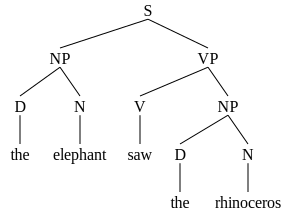

In [ ]:
import svgling
display ( svgling.draw_tree(("S", ("NP", ("D", "the"), ("N", "elephant")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "rhinoceros"))))))

<h1> Converting the dataset into our desired input format</h1>

We will be working on the dataset of Bangla and Hindi Language. The dataset can be found here. https://github.com/kabbya/Constituency-Parsing-Bangla-NLP/tree/main/HIN-BEN_Chunk_Sample/HIN-BEN_Chunk_Sample

In [ ]:
Bangla_entertainment_chunk_file = open(r"/content/drive/MyDrive/Bangla NLP/Dataset/HIN-BEN_Chunk_Sample/HIN-BEN_Chunk_Sample/Bangla_entertainment_chunk.txt", encoding="utf8")
Bangla_entertainment_chunk_list_of_lines = Bangla_entertainment_chunk_file.readlines()


In [ ]:
Bangla_entertainment_chunk_list_of_lines[0:5]

['HED13811\t[[রাহুল\\N_NNP বোস\\N_NNP]]_NP [[একজন\\QT_QTC উচুঁ\\JJ দরের\\N_NN অভিনেতা\\N_NN]]_NP [[।\\RD_PUNC]]_BLK\n',
 'HED15090\t[[কাছেই\\RB]]_RBP [[একটা\\QT_QTC বুড়ো\\JJ বটগাছ\\N_NNP]]_NP [[ছিল\\V_VAUX]]_VGF [[৷\\RD_PUNC]]_BLK\n',
 'HED15090\t[[কাছেই\\RB]]_RBP [[একটা\\QT_QTC বুড়ো\\JJ বটগাছ\\N_NNP]]_NP [[ছিল\\V_VAUX]]_VGF [[৷\\RD_PUNC]]_BLK\n',
 'HED10060\t[[ঝরনা\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[বরফ\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[ফুল\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[লতা\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[ভ্রমরের\\N_NN গুঞ্জন\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[ভোরের\\N_NN আলো\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[ঠান্ডা\\JJ হাওয়া\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[নক্ষত্রের\\N_NN ওড়না\\N_NN উড়িয়ে\\V_VM_VNF আকাশ\\N_NN থেকে\\PSP নেমে\\V_VM_VNF আসা\\V_VM_VNG সন্ধ্যাকে\\N_NN]]_NP [[তিনি\\PR_PRL]]_NP [[খুব\\RP_INTF সাবলীলভাবে\\RB]]_RBP [[কাব্যে\\N_NN]]_NP [[ফুটিয়ে\\V_VM_VNF তুলেছেন\\V_VM_VF]]_VGF [[।\\RD_PUNC]]_BLK\n',
 'HED15336\t[[সুর\\N_NN]]_NP [[,\\RD_PUNC]]_CCP [[তাল\\N_NN]]_NP [[এবং\\CC_CCD]]_C

Now let's convert our text file into our desired format to pass through svgling.draw_tree(). Instead of converting the whole text file, convert only a single line at first.



In [ ]:
import re

In [ ]:
Bangla_entertainment_chunk_first_line = Bangla_entertainment_chunk_list_of_lines[0]

#Replace "[[" with "[[ "
Bangla_entertainment_chunk_first_line = Bangla_entertainment_chunk_first_line.replace("[[","[[ ")

#Replace "]]" with " ]]"
Bangla_entertainment_chunk_first_line = Bangla_entertainment_chunk_first_line.replace("]]"," ]]")

print(Bangla_entertainment_chunk_first_line)

HED13811	[[ রাহুল\N_NNP বোস\N_NNP ]]_NP [[ একজন\QT_QTC উচুঁ\JJ দরের\N_NN অভিনেতা\N_NN ]]_NP [[ ।\RD_PUNC ]]_BLK



In [ ]:
# .split() will split the sentence whenever it finds a space
# it will retun a list of words

list_of_words = Bangla_entertainment_chunk_first_line.split()
Root = list_of_words.pop(0)
tree_branch_list = []
tree_string = "";

for i in list_of_words:

    child_parent_word_sequence_list = re.split(r'\\',i)
    child_parent_word_sequence_list.reverse()

    parent_child_string = ','.join(child_parent_word_sequence_list)
 
    if(parent_child_string=="[["):
      continue;

    if(re.search(r']]_',parent_child_string)):
      parent_of_parent_child_string = parent_child_string.replace(']]_','')
      parent_of_parent_child_string = '"' + parent_of_parent_child_string + '"'
      tree_branch_list.insert(0,parent_of_parent_child_string)
      tree_branch_string = ",".join(tree_branch_list)
      tree_branch_string =  '(' + tree_branch_string + ')'
      if( len(tree_string)==0 ):
        tree_string = tree_branch_string;
      else:
        tree_string = tree_string + "," + tree_branch_string;
      tree_branch_list.clear()
    else:
      parent_child_string = parent_child_string.replace(',','","')
      parent_child_string = '("' + parent_child_string + '")'
      tree_branch_list.append(parent_child_string)
  
rooted_tree_string = '("'+Root+'",'+tree_string+')'
print(rooted_tree_string)

("HED13811",("NP",("N_NNP","রাহুল"),("N_NNP","বোস")),("NP",("QT_QTC","একজন"),("JJ","উচুঁ"),("N_NN","দরের"),("N_NN","অভিনেতা")),("BLK",("RD_PUNC","।")))


Now, we have succuessfully converted the sentences into our desired format. Let's try and check.

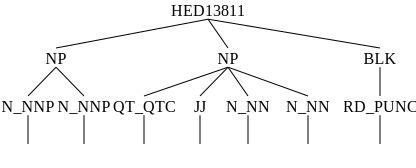

In [ ]:
import svgling
svgling.draw_tree(("HED13811",("NP",("N_NNP","রাহুল"),("N_NNP","বোস")),("NP",("QT_QTC","একজন"),("JJ","উচুঁ"),("N_NN","দরের"),("N_NN","অভিনেতা")),("BLK",("RD_PUNC","।"))))

However, there is a problem with the format in our case. The Rooted Tree which we have built, it's typpe is String.
According to the documention of svgling <br>

`The tree drawing code accepts two main tree formats: lisp-style trees made from lists of lists (or tuples of tuples), with node labels as strings, or trees from the nltk package, i.e. objects instantiating the nltk.tree.Tree API.`

While using svgling.draw_tree()

`pass a tree-describing object to svgling.draw_tree (e.g. a tuple consisting of a label and a sequence of daughter nodes, which may themselves be trees).`

As we have our output sentences as string, now, we will try another way, using nltk.Tree.fromstring(), which take String as the parameter.



Before getting started, we have to setup fer things. I was getting the errpr of `TclError: no display name and no $DISPLAY environment variable` trying to use the nltk draw funtion. 
Here's the solution of this problem. https://stackoverflow.com/questions/37604289/tkinter-tclerror-no-display-name-and-no-display-environment-variable

I am using google colab, hence these are the setup requirements. 

In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.15).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


Now we are set to go. Here's a simple example of what nltk.Tree.fromstring looks alike. 
Yes, the output is same as the preivous sbvling.draw_tree(), only the input format is different, and here it takes parameter as string, which is suitable in our case.

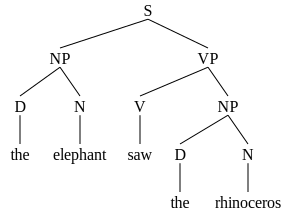

In [ ]:
import svgling
import nltk
sentence_string = "(S (NP (D the) (N elephant)) (VP (V saw) (NP (D the) (N rhinoceros))))"
nltk.Tree.fromstring(sentence_string)


# For multiple tree draw at a time use
# => display(svgling.draw_tree(nltk.Tree.fromstring(sentence_string)))
#or use
# => svgling.disable_nltk_png()
# => display(nltk.Tree.fromstring(sentence_string))



Now, let's convert our previously made rooted_tree_string into this format.

In [ ]:
rooted_tree_string = rooted_tree_string.replace(","," ")
rooted_tree_string = rooted_tree_string.replace("\"","")

print(rooted_tree_string)

(HED13811 (NP (N_NNP রাহুল) (N_NNP বোস)) (NP (QT_QTC একজন) (JJ উচুঁ) (N_NN দরের) (N_NN অভিনেতা)) (BLK (RD_PUNC ।)))


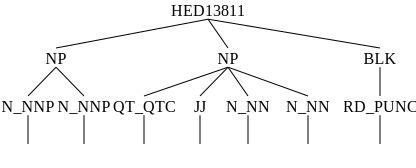

In [ ]:
svgling.disable_nltk_png()
display(nltk.Tree.fromstring(rooted_tree_string))

<h1> Make a new text file for our converted lines <h1>

Now let's do it for a file. At first, we will convert the all lines and save them into a new file.

In [ ]:
def ConvertToNltkTreeFromstringFormat(rooted_tree_string):
  rooted_tree_string = rooted_tree_string.replace(","," ")
  rooted_tree_string = rooted_tree_string.replace("\"","")
  return rooted_tree_string


def ConvertToSvglingDrawTreeFormat(Bangla_entertainment_chunk_line):

  #Replace "[[" with "[[ "
  Bangla_entertainment_chunk_line = Bangla_entertainment_chunk_line.replace("[[","[[ ")

  #Replace "]]" with " ]]"
  Bangla_entertainment_chunk_line = Bangla_entertainment_chunk_line.replace("]]"," ]]")

  # .split() will split the sentence whenever it finds a space
  # it will retun a list of words

  list_of_words = Bangla_entertainment_chunk_line.split()
  Root = list_of_words.pop(0)
  tree_branch_list = []
  tree_string = "";

  for i in list_of_words:

      child_parent_word_sequence_list = re.split(r'\\',i)
      child_parent_word_sequence_list.reverse()

      parent_child_string = ','.join(child_parent_word_sequence_list)
  
      if(parent_child_string=="[["):
        continue;

      if(re.search(r']]_',parent_child_string)):
        parent_of_parent_child_string = parent_child_string.replace(']]_','')
        parent_of_parent_child_string = '"' + parent_of_parent_child_string + '"'
        tree_branch_list.insert(0,parent_of_parent_child_string)
        tree_branch_string = ",".join(tree_branch_list)
        tree_branch_string =  '(' + tree_branch_string + ')'
        if( len(tree_string)==0 ):
          tree_string = tree_branch_string;
        else:
          tree_string = tree_string + "," + tree_branch_string;
        tree_branch_list.clear()
      else:
        parent_child_string = parent_child_string.replace(',','","')
        parent_child_string = '("' + parent_child_string + '")'
        tree_branch_list.append(parent_child_string)
    
  rooted_tree_string = '("'+Root+'",'+tree_string+')'
  return rooted_tree_string



Bangla_entertainment_chunk_file = open(r"/content/drive/MyDrive/Bangla NLP/Dataset/HIN-BEN_Chunk_Sample/HIN-BEN_Chunk_Sample/Bangla_entertainment_chunk.txt", encoding="utf8")
Bangla_entertainment_chunk_list_of_lines = Bangla_entertainment_chunk_file.readlines()


for Bangla_entertainment_chunk_line in Bangla_entertainment_chunk_list_of_lines:
  
 
  rooted_tree_string = ConvertToSvglingDrawTreeFormat(Bangla_entertainment_chunk_line)
  rooted_tree_string = ConvertToNltkTreeFromstringFormat(rooted_tree_string)
  with open("/content/drive/MyDrive/Bangla NLP/Dataset/HIN-BEN_Chunk_Sample/HIN-BEN_Chunk_Sample_Converted/Bangla entertainment chunk file converted.txt", "a") as external_file:
    print(rooted_tree_string, file=external_file)
        
  

Now, we will read from file and draw the constituency parse tree


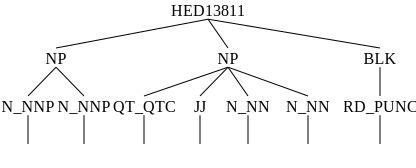

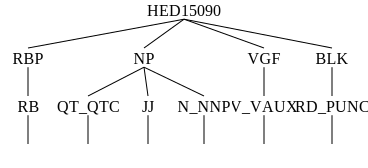

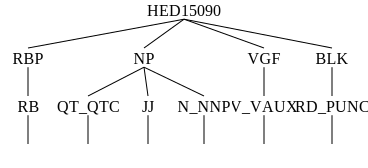

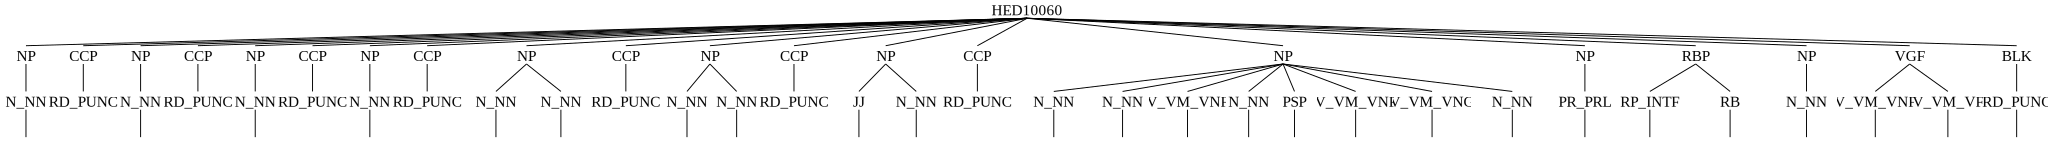

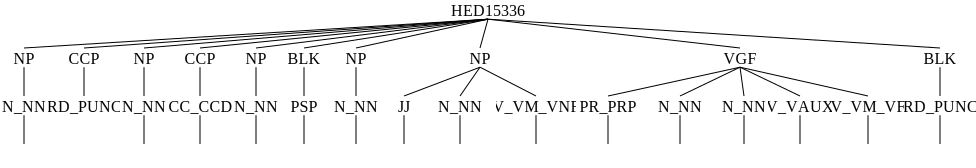

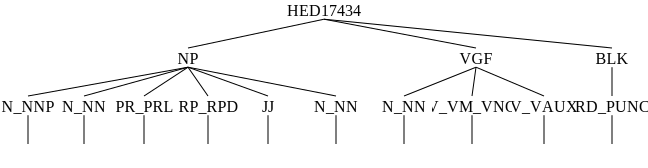

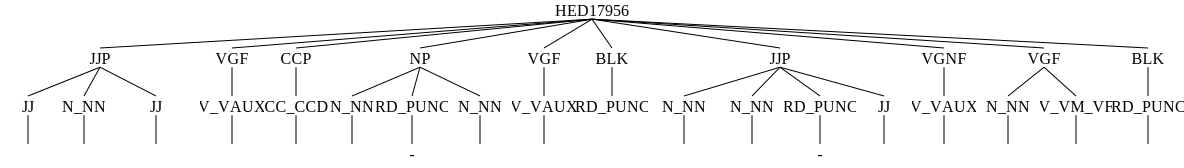

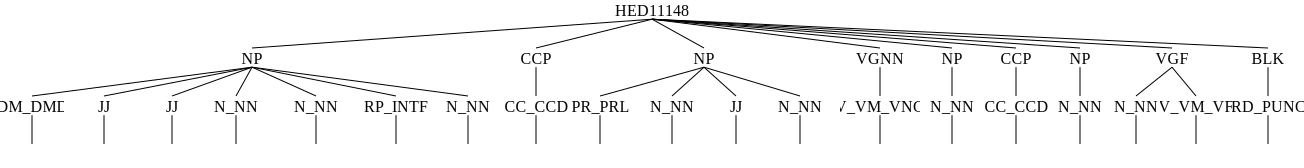

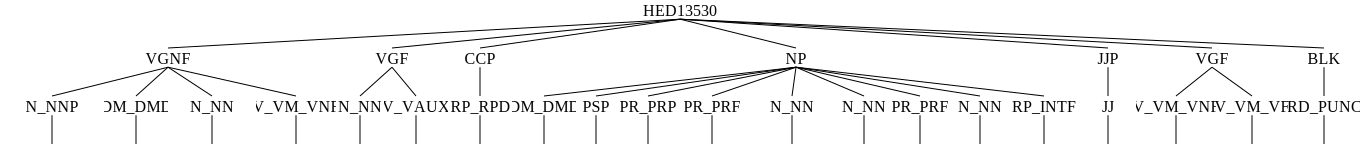

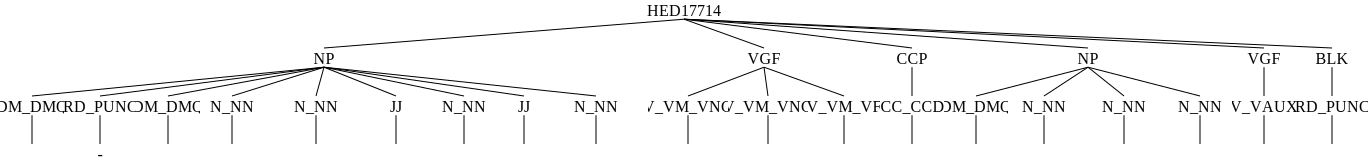

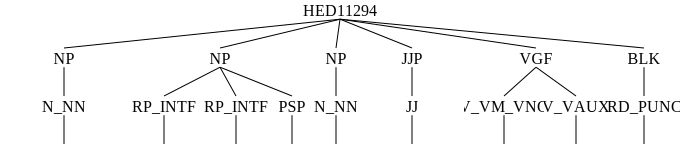

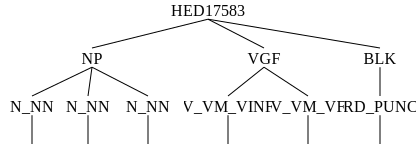

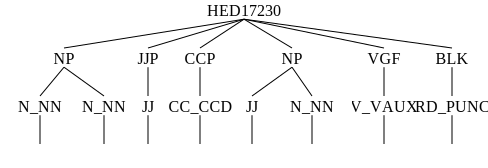

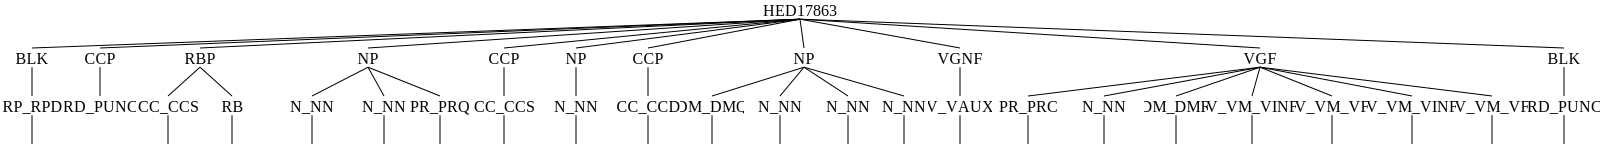

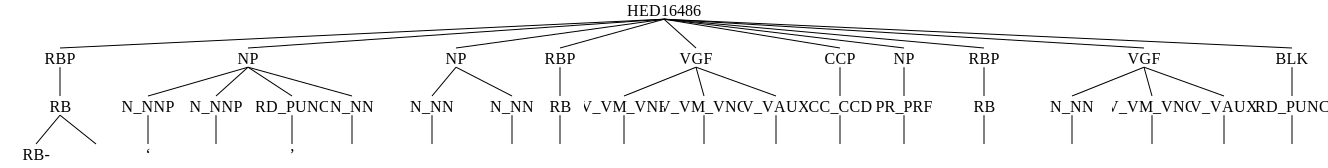

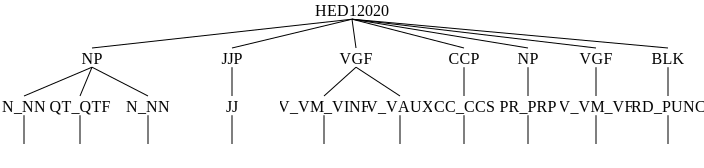

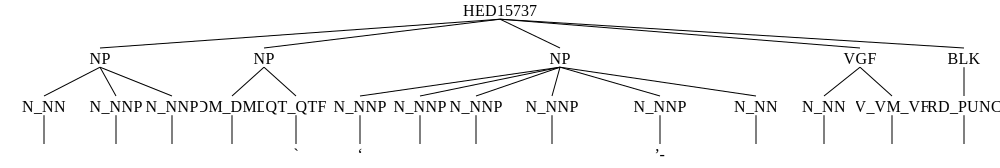

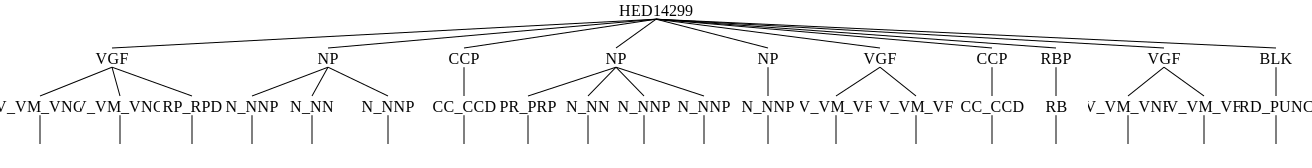

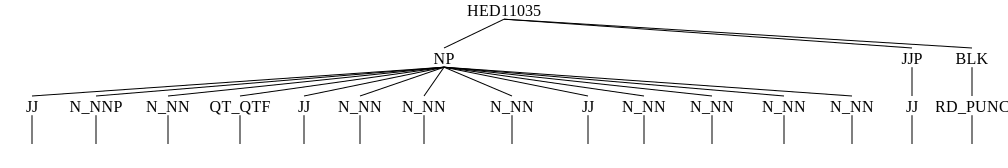

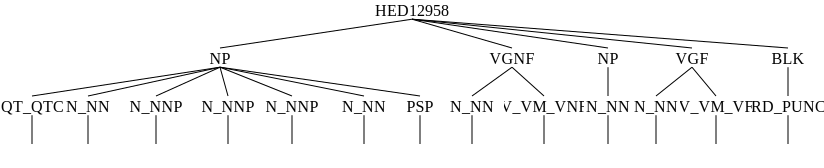

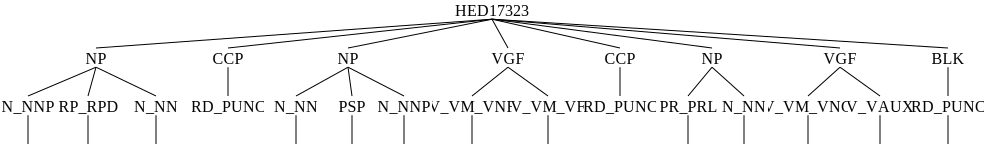

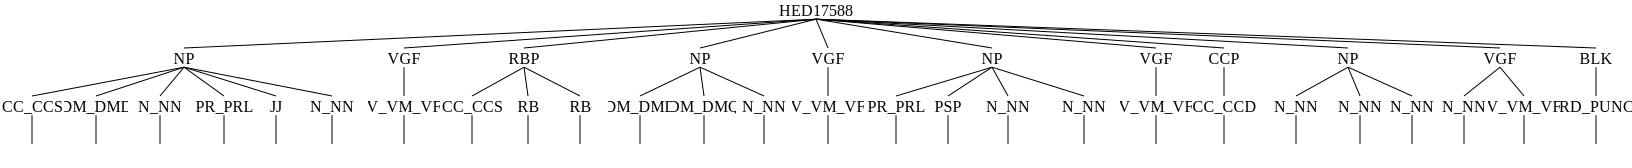

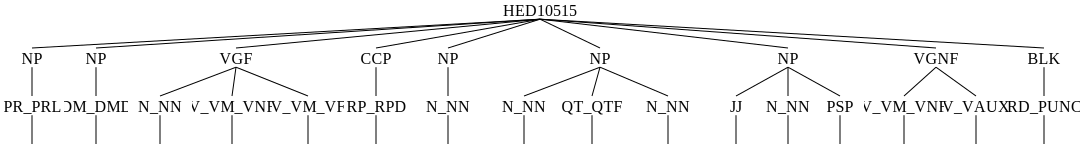

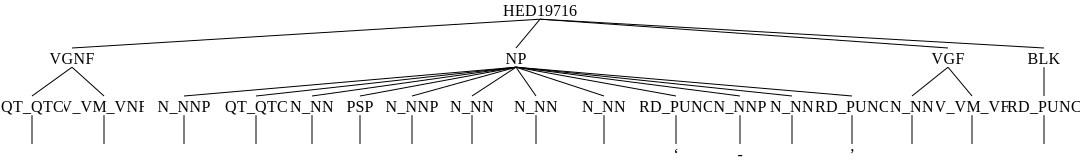

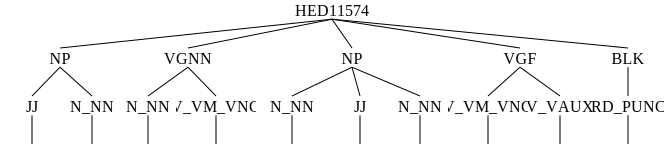

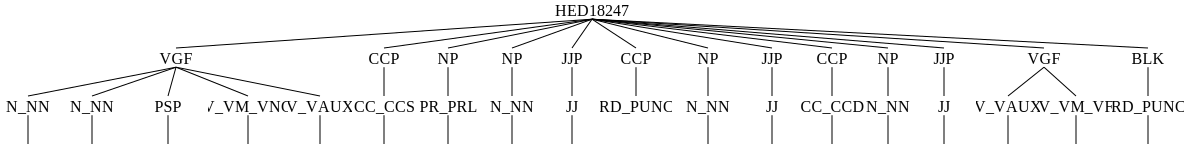

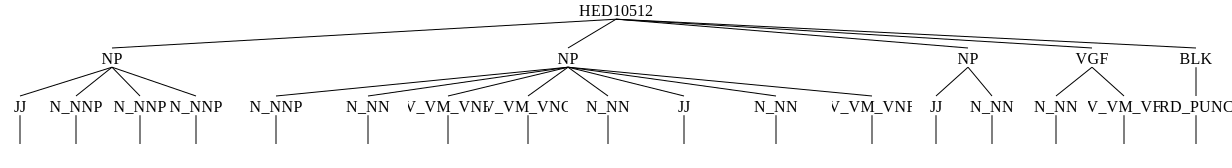

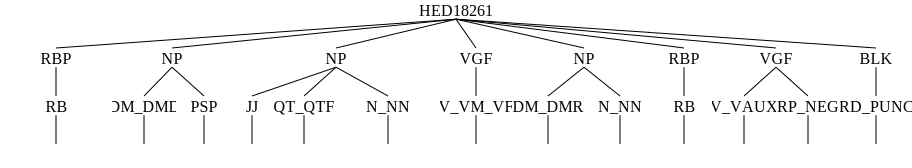

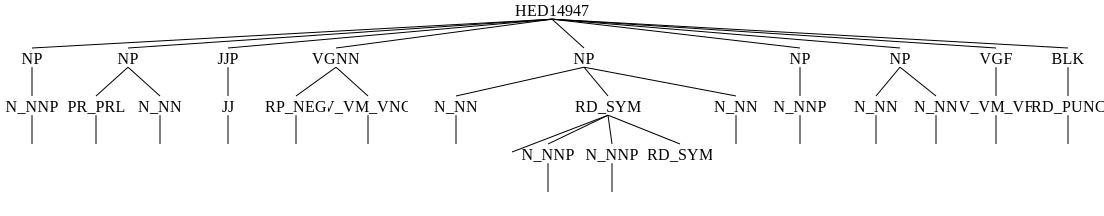

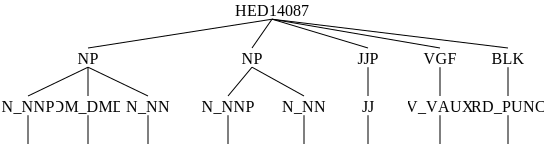

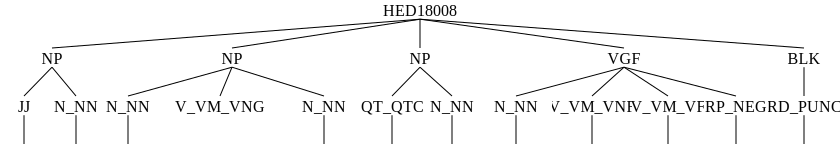

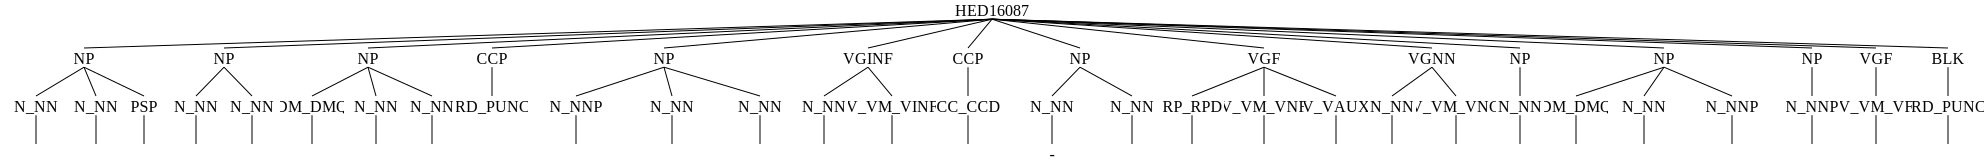

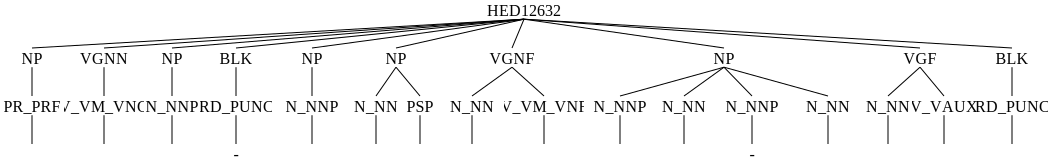

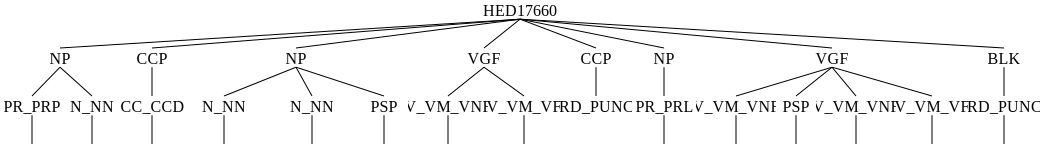

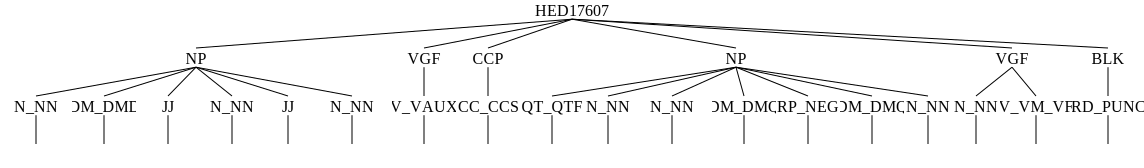

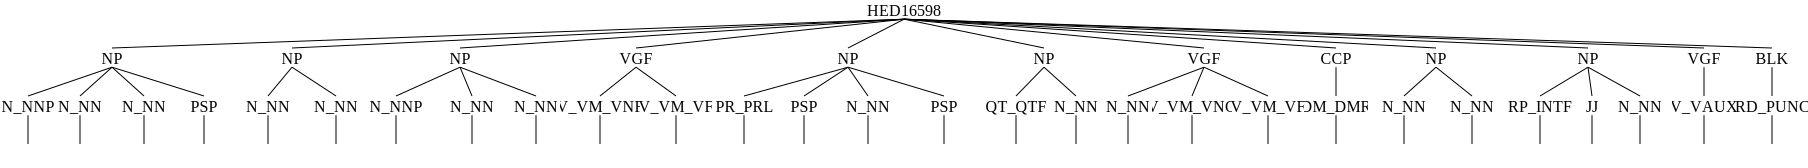

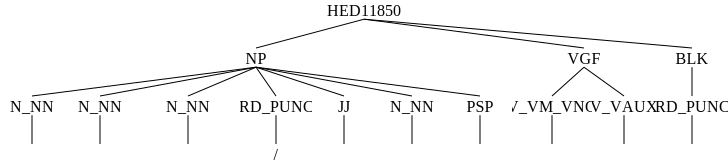

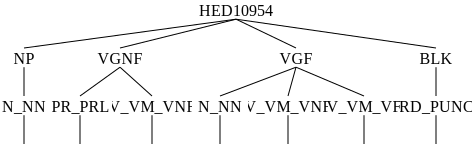

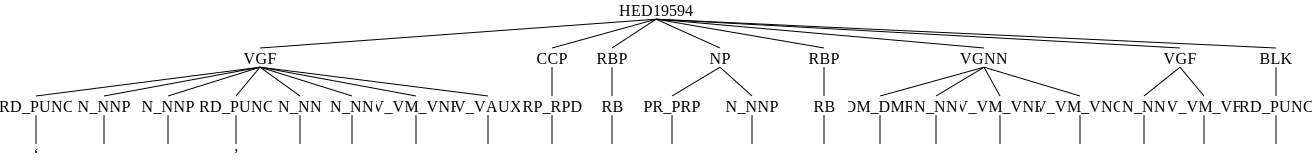

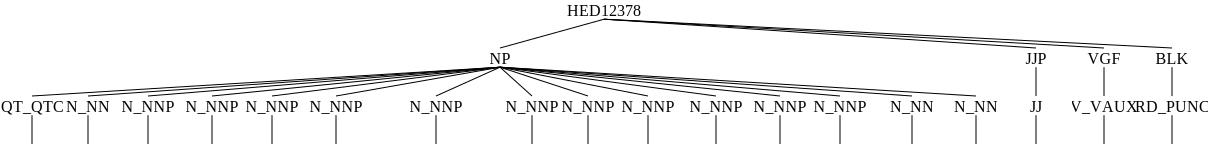

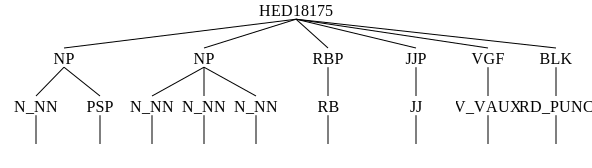

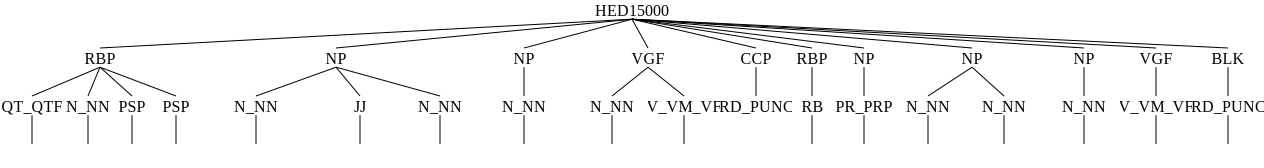

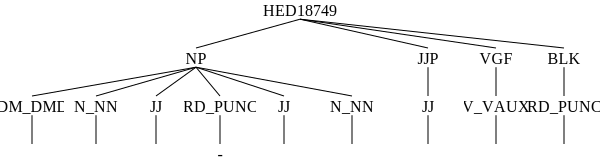

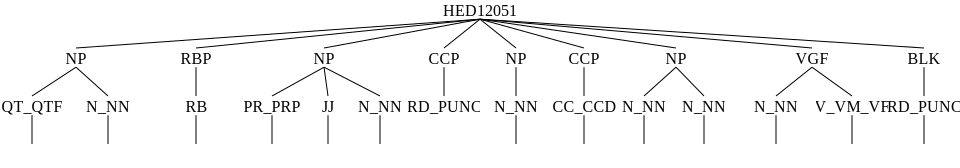

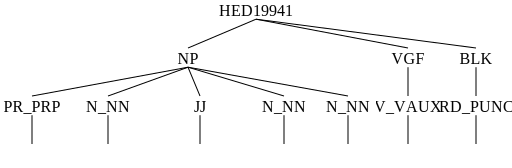

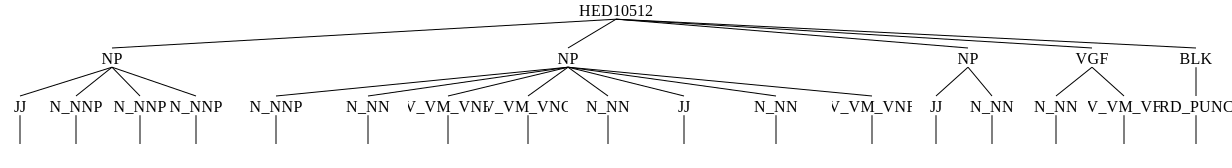

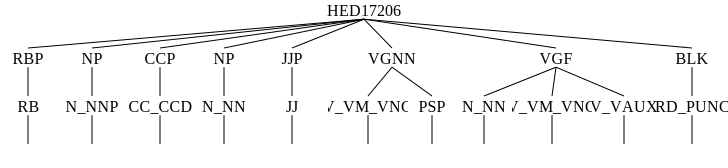

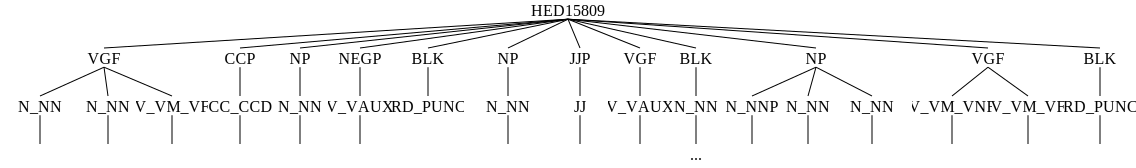

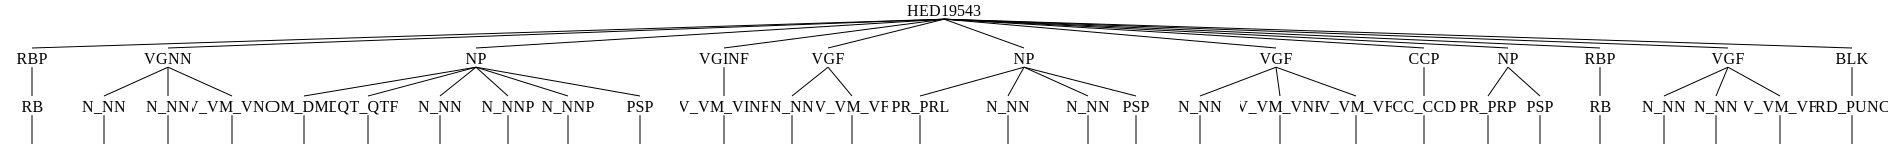

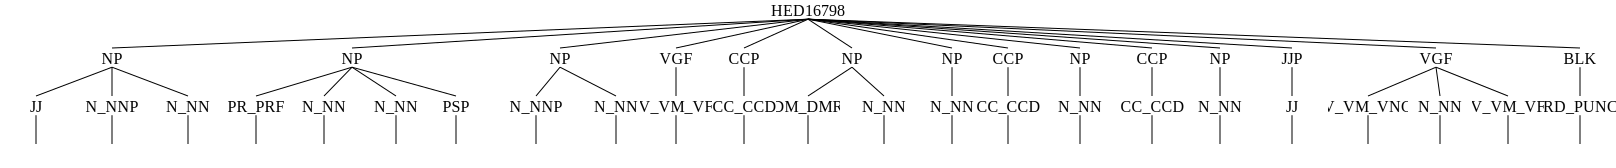

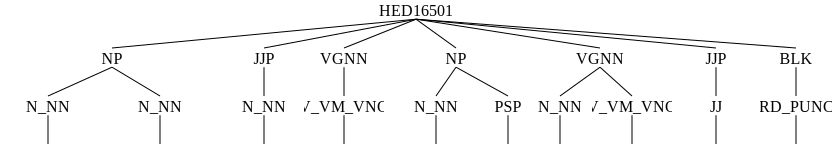

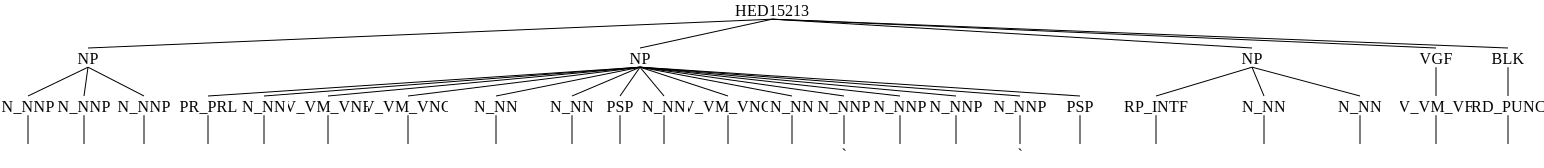

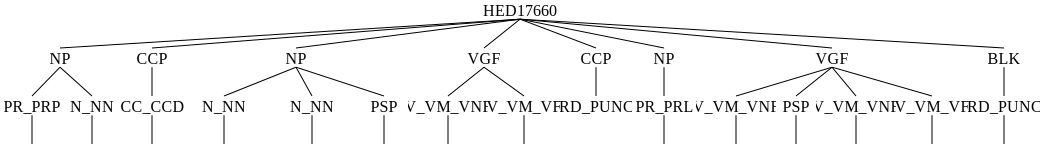

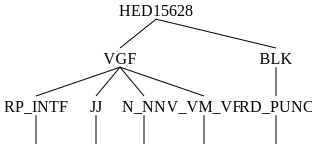

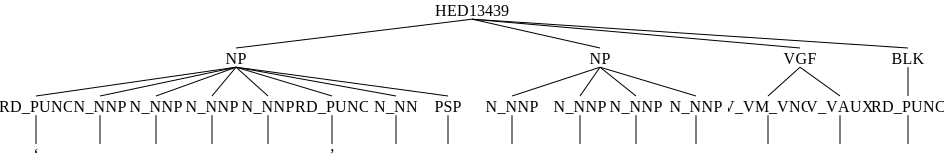

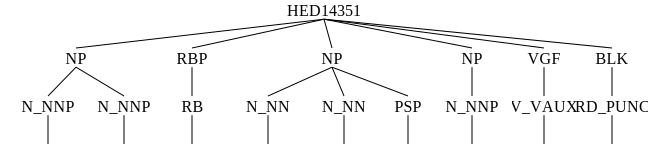

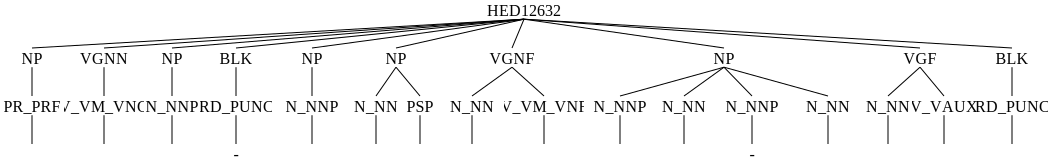

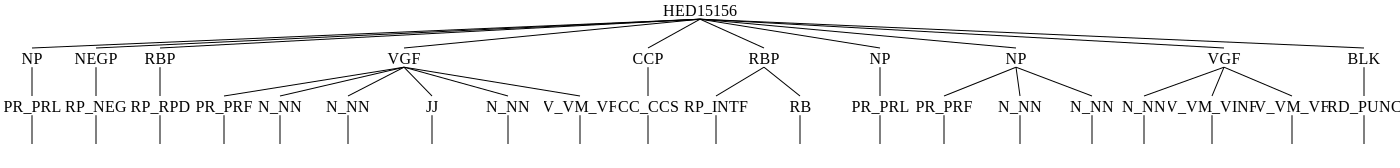

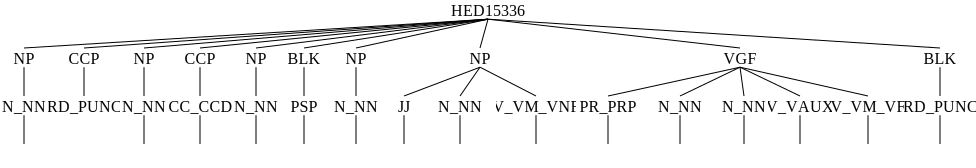

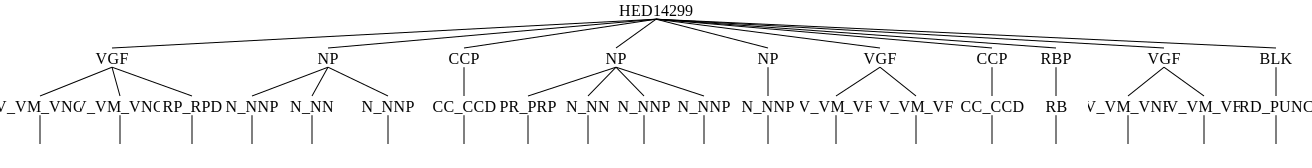

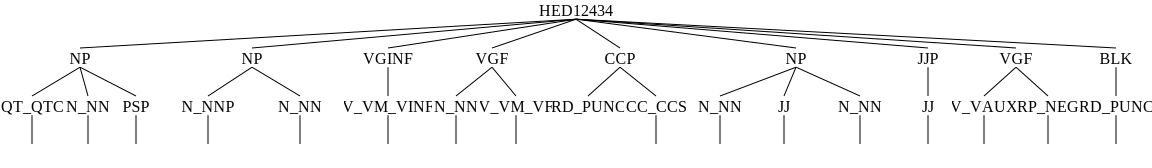

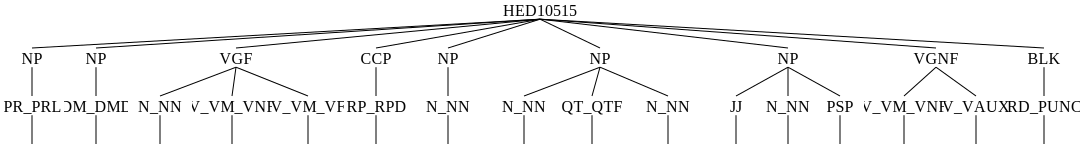

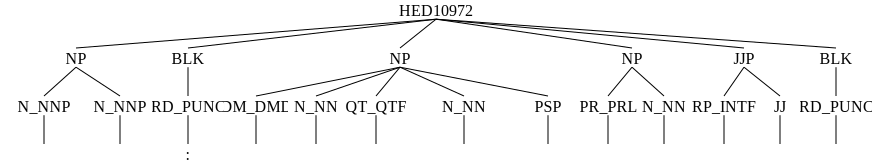

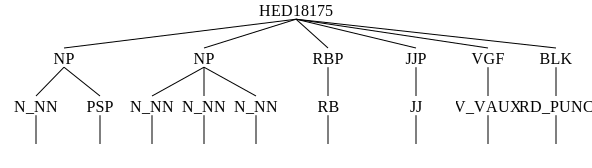

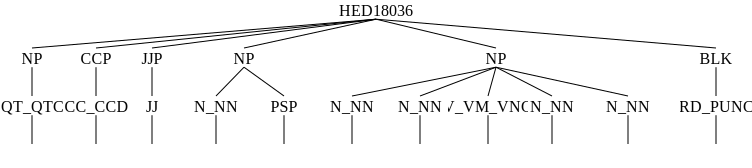

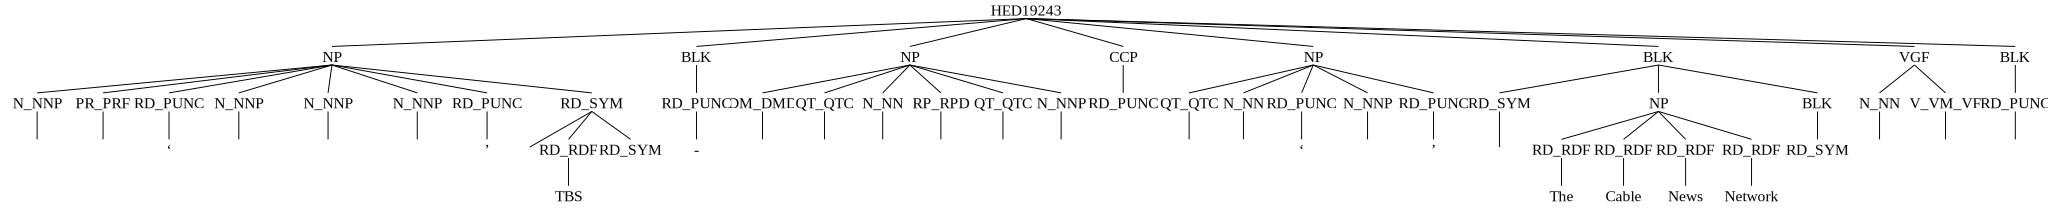

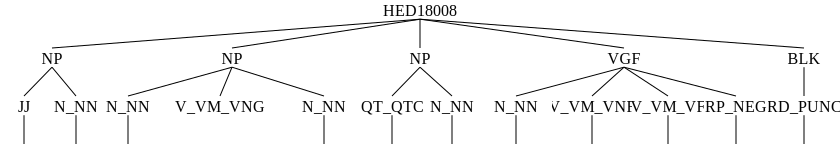

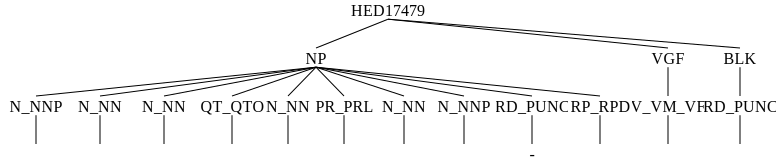

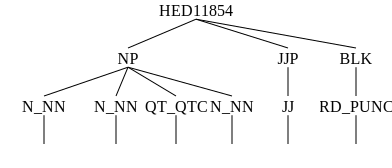

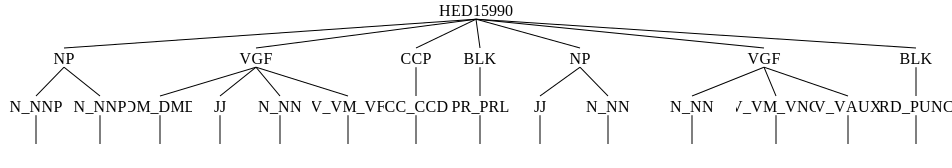

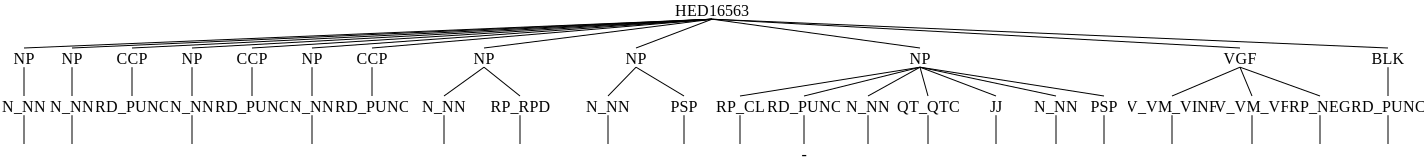

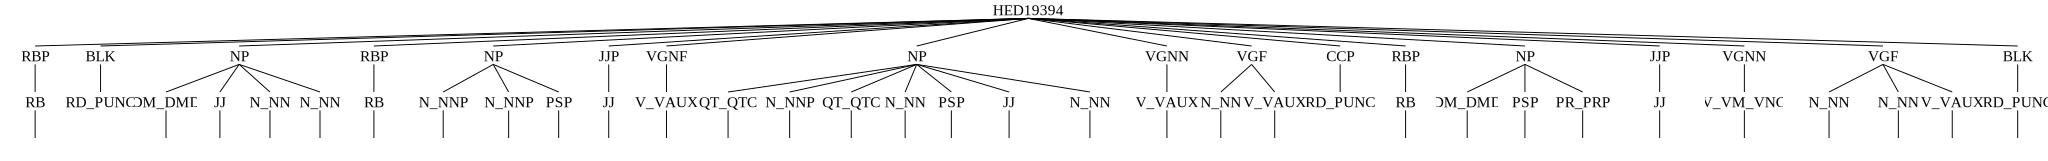

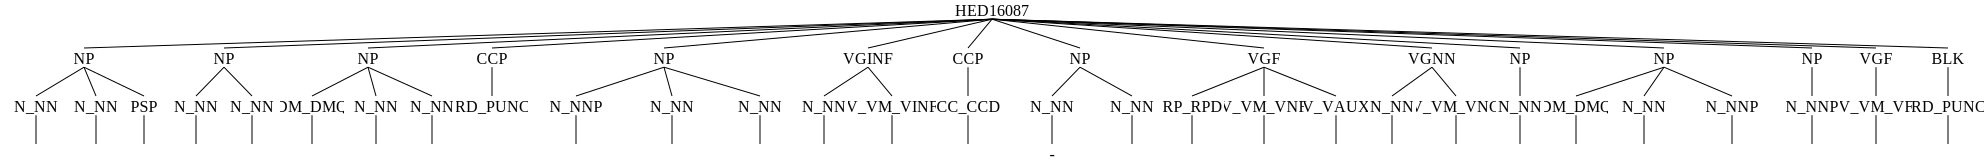

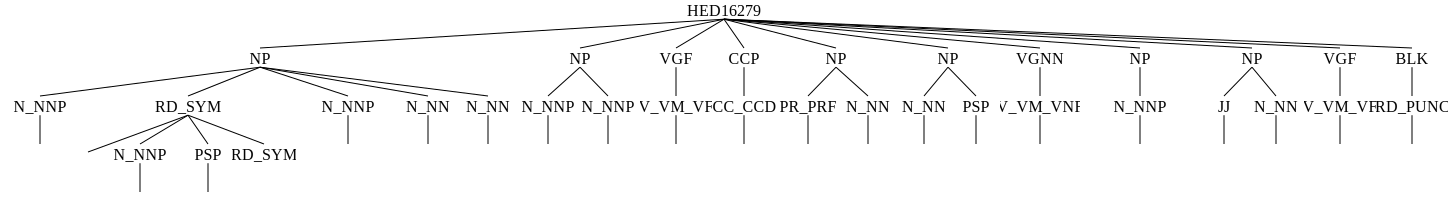

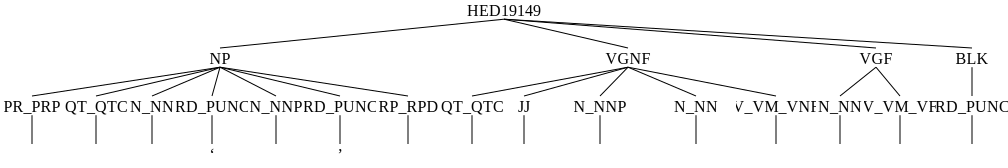

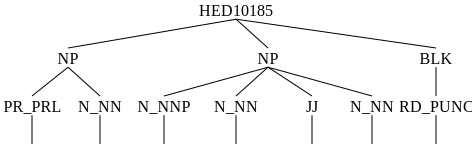

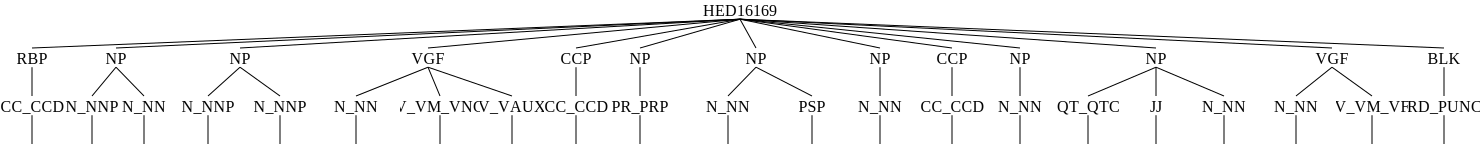

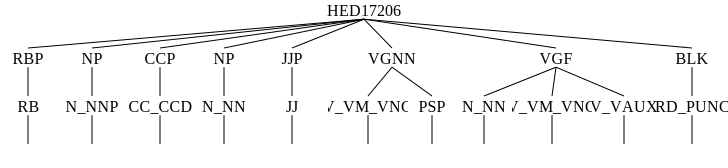

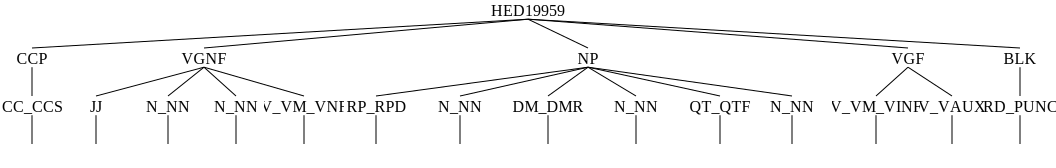

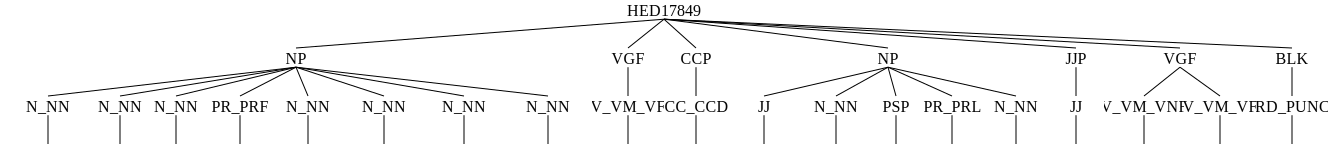

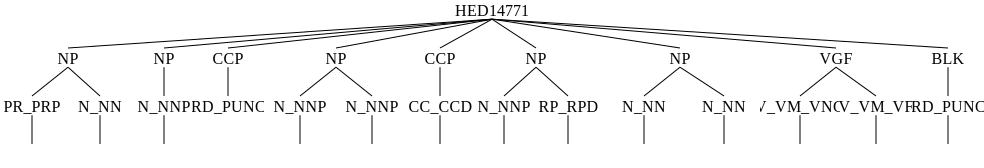

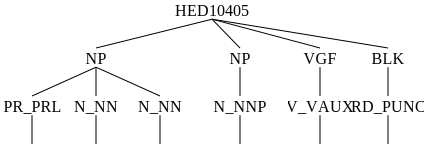

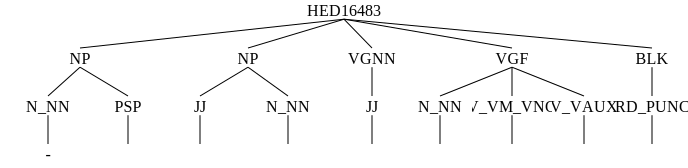

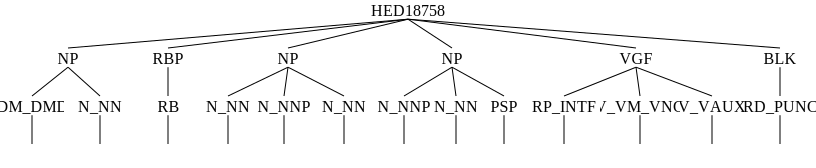

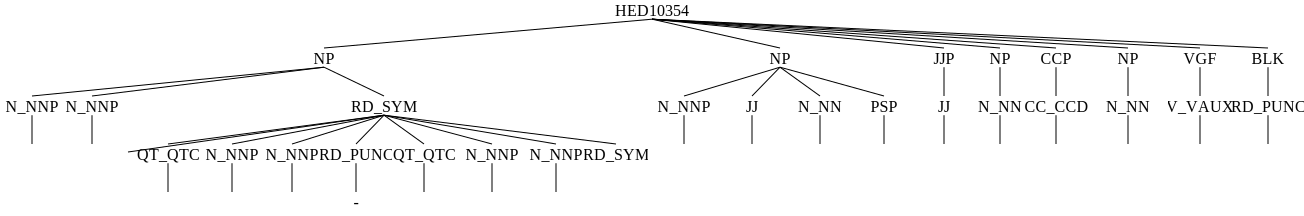

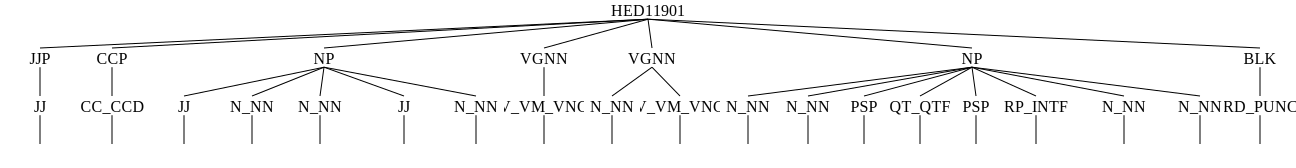

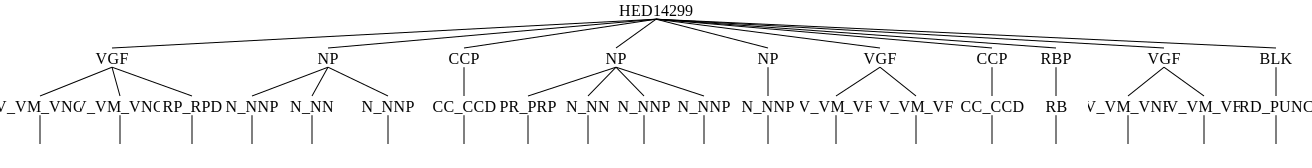

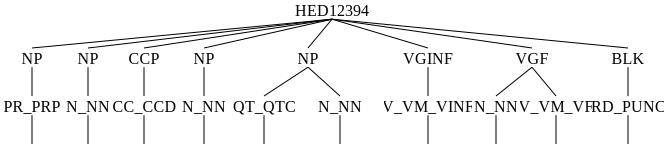

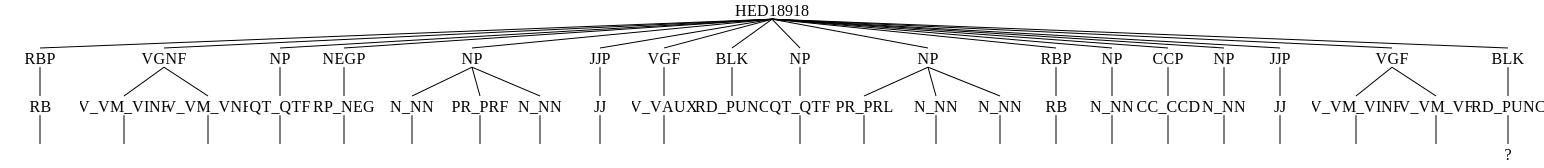

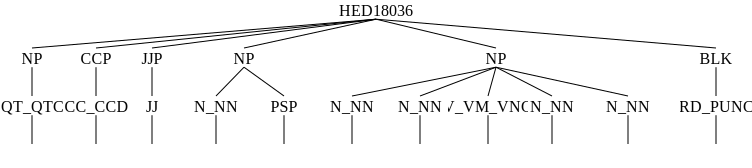

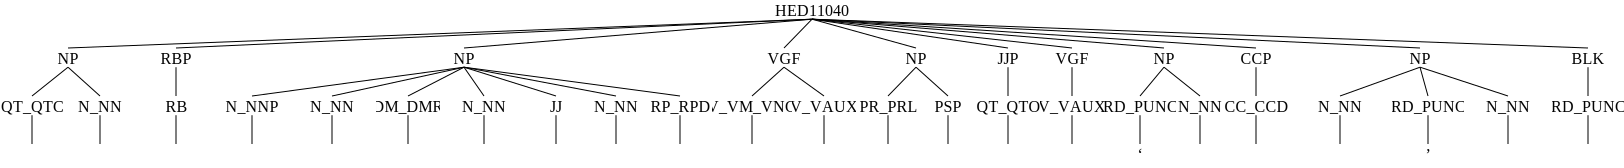

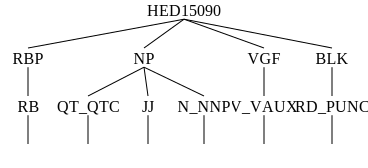

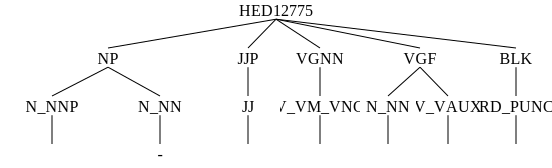

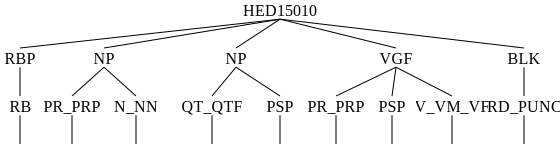

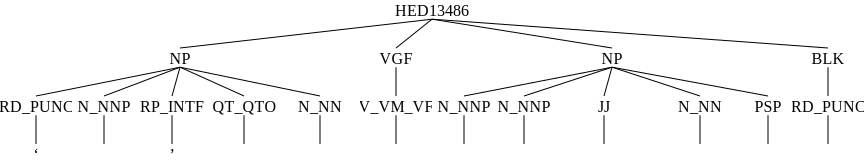

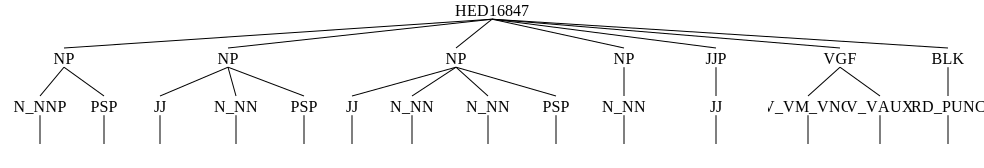

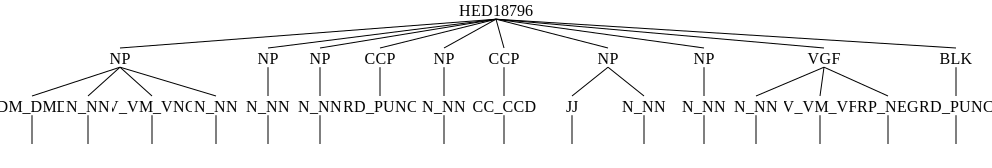

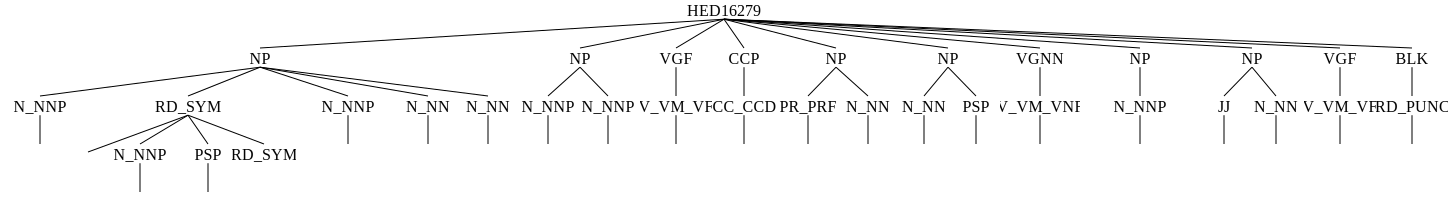

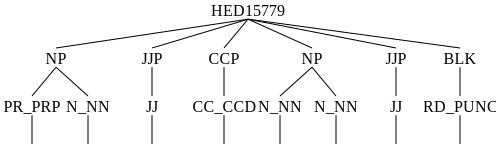

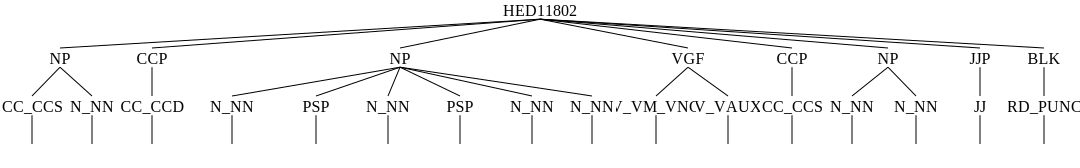

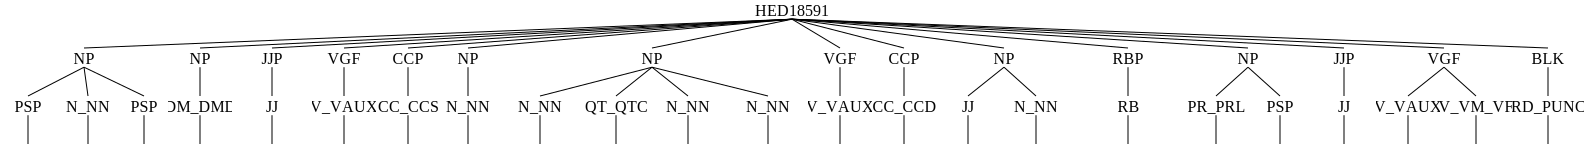

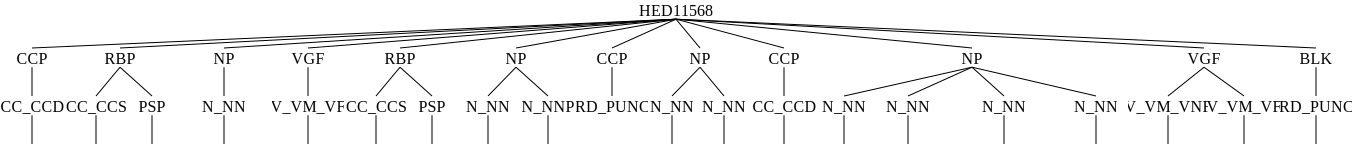

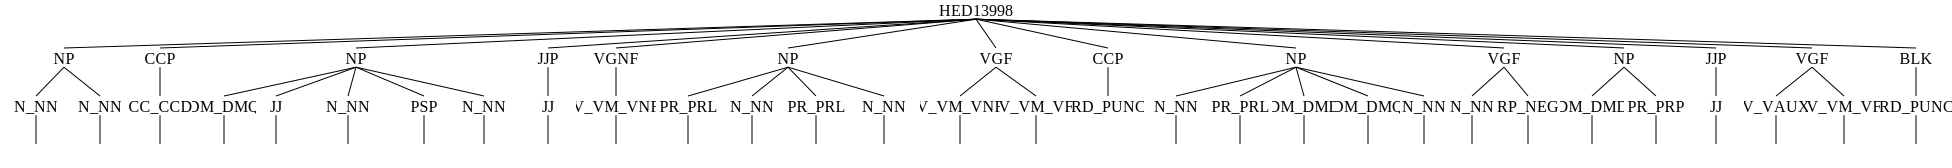

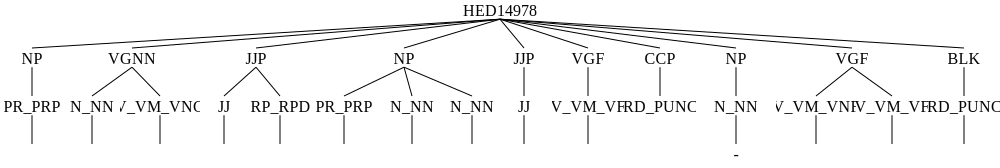

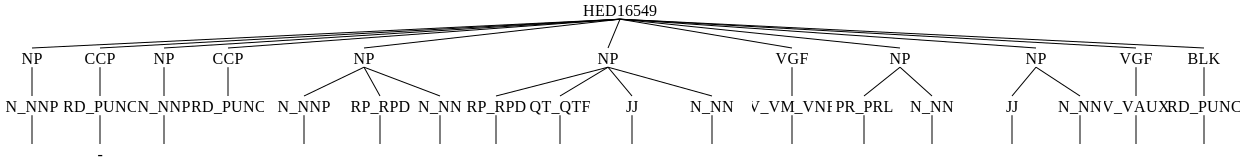

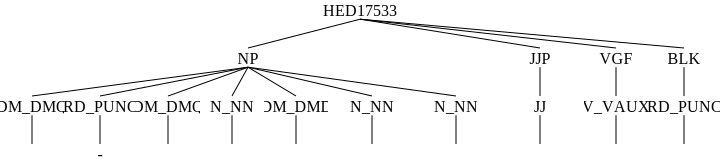

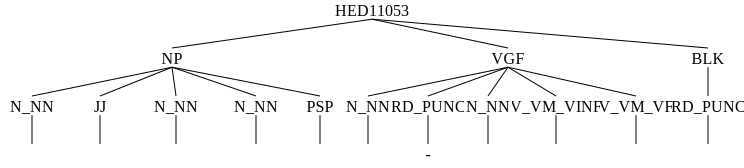

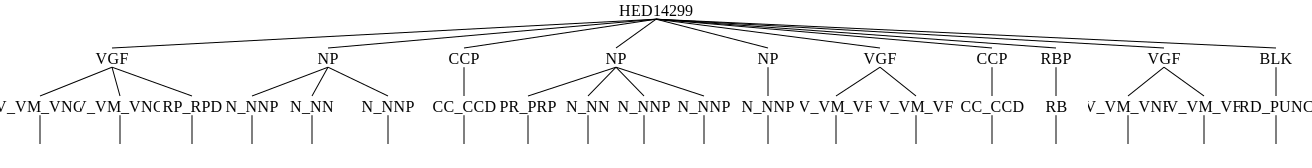

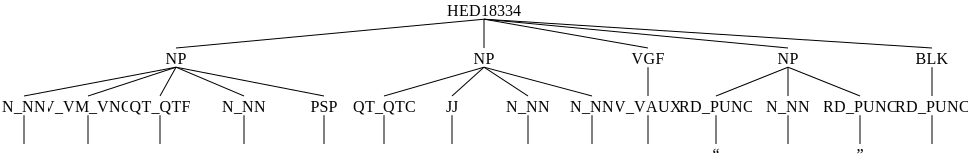

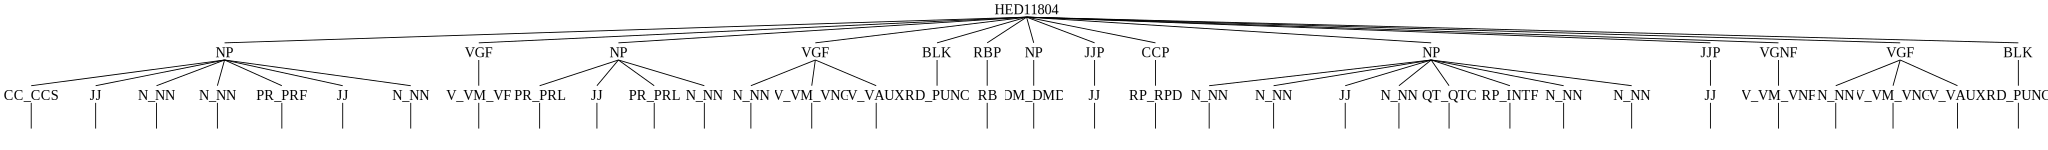

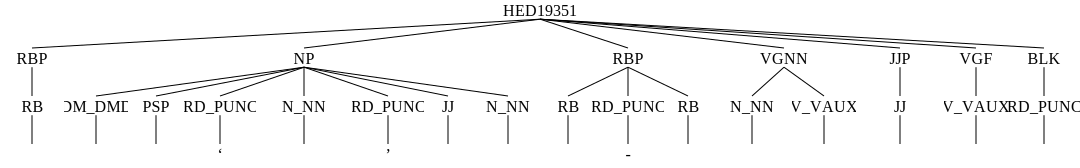

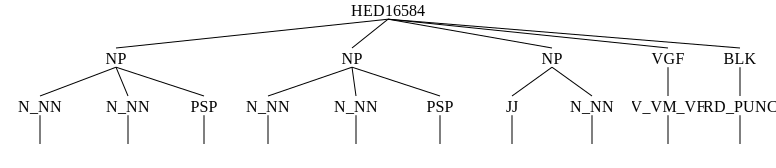

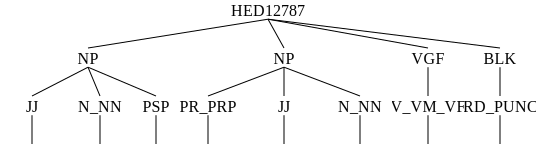

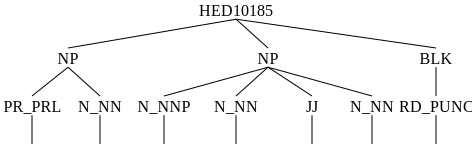

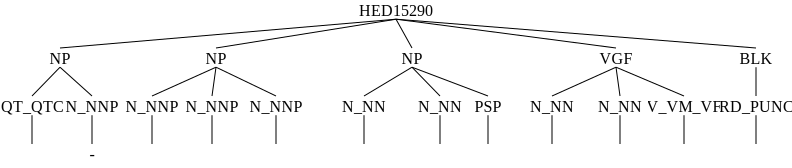

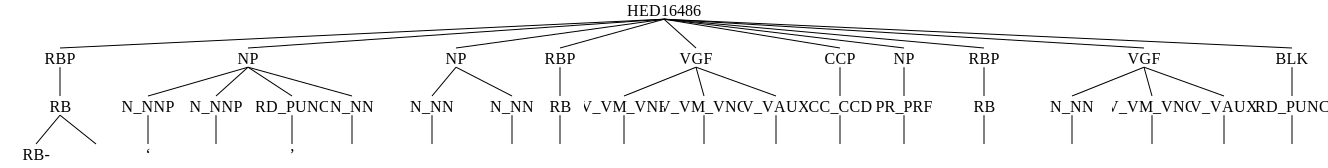

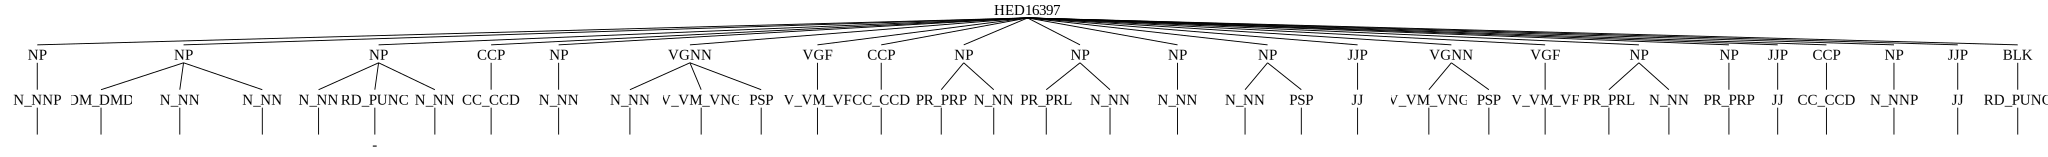

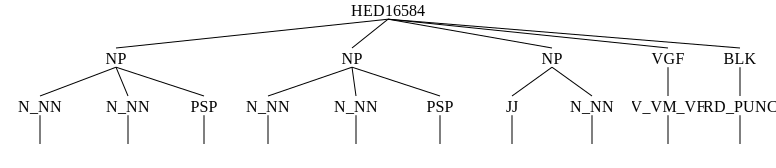

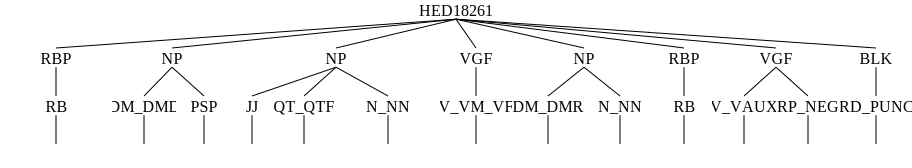

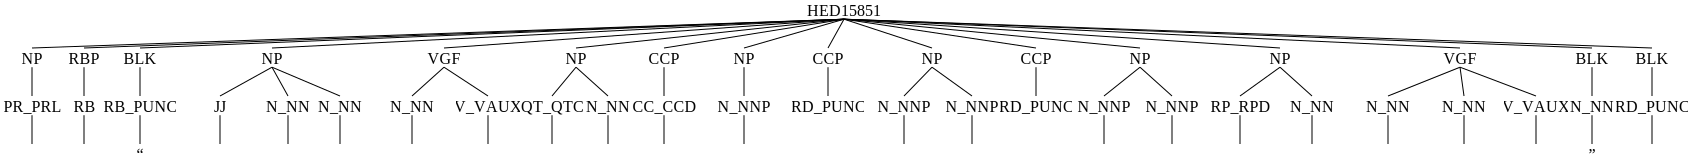

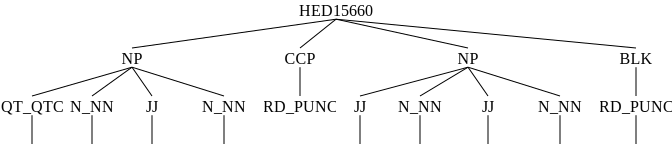

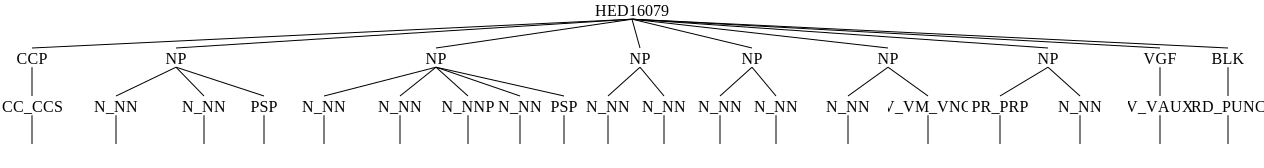

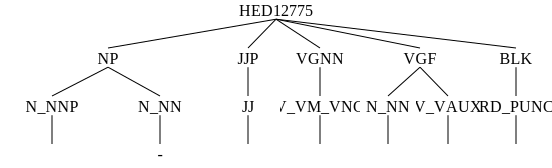

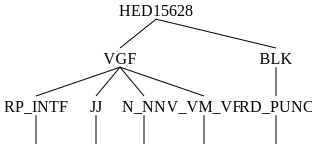

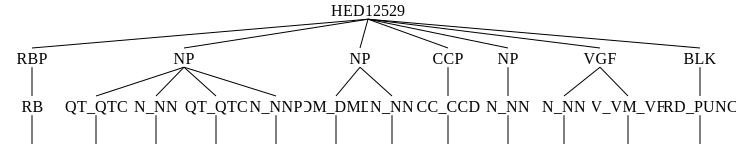

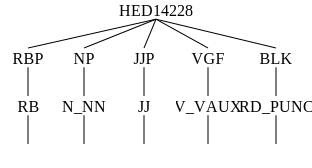

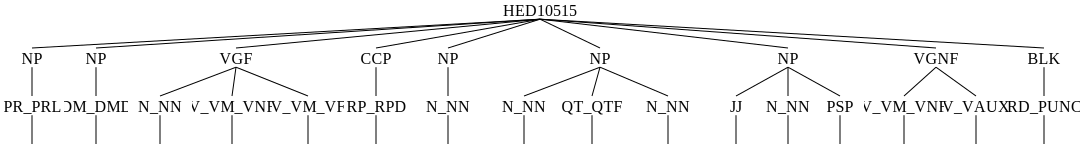

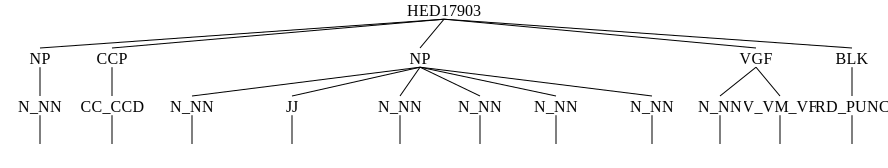

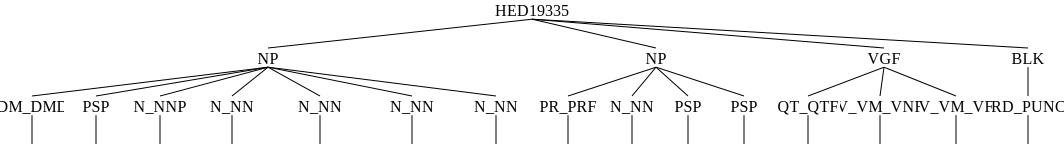

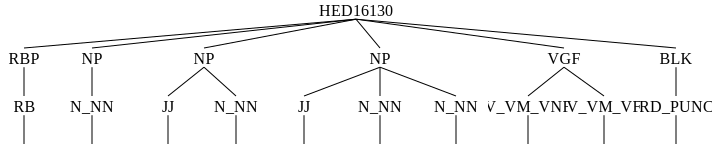

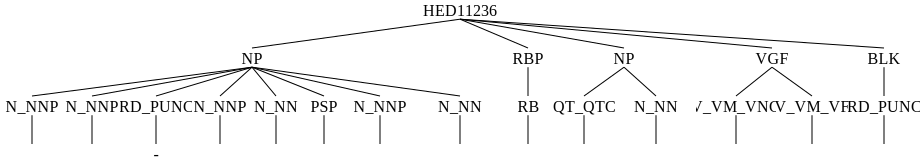

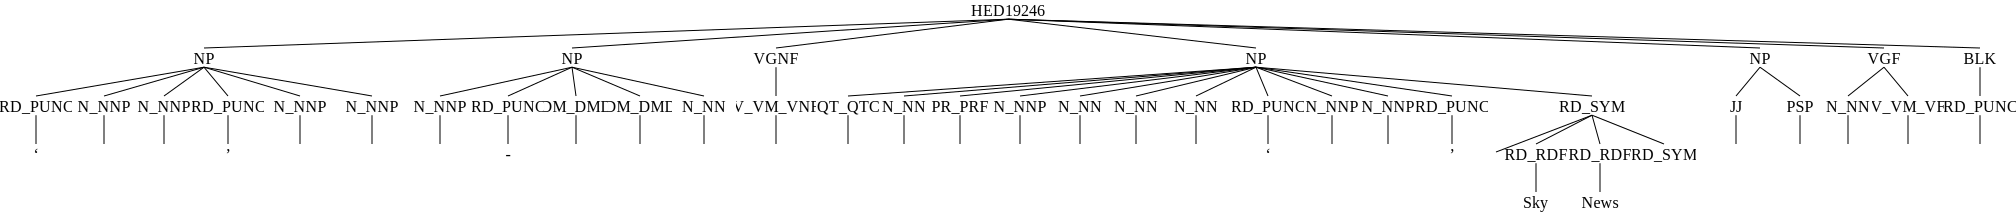

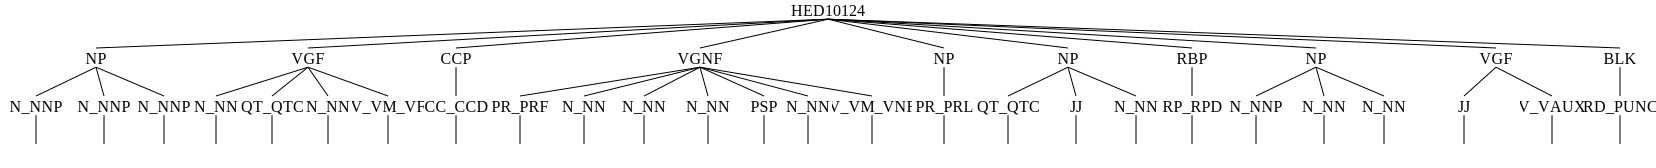

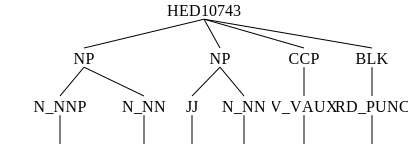

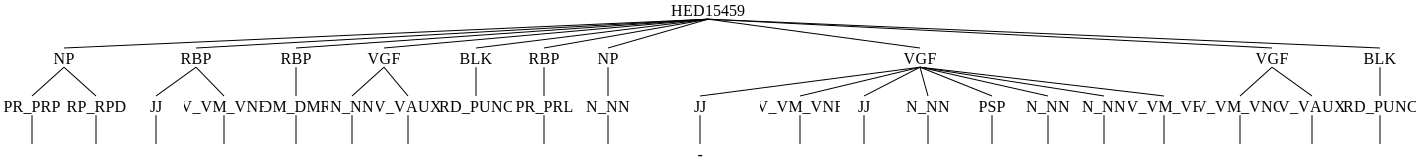

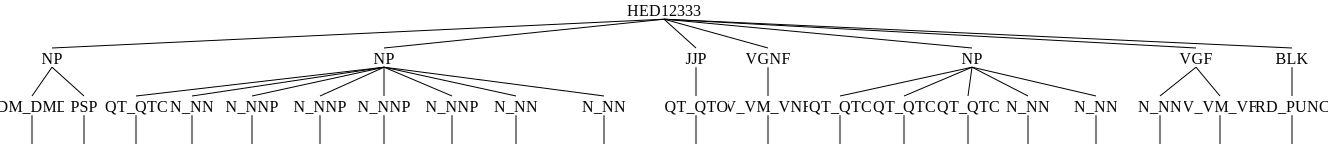

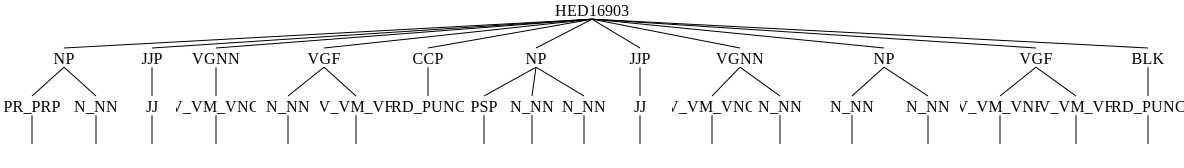

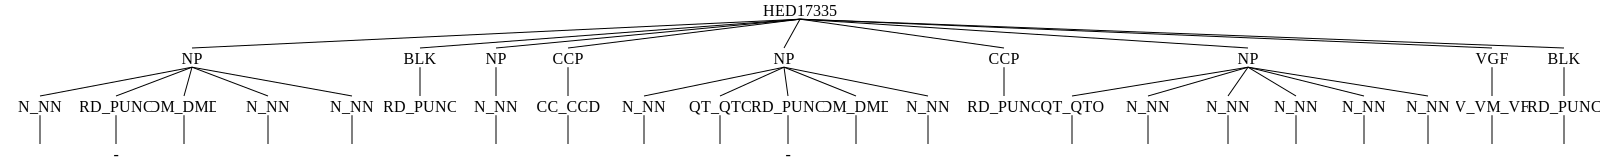

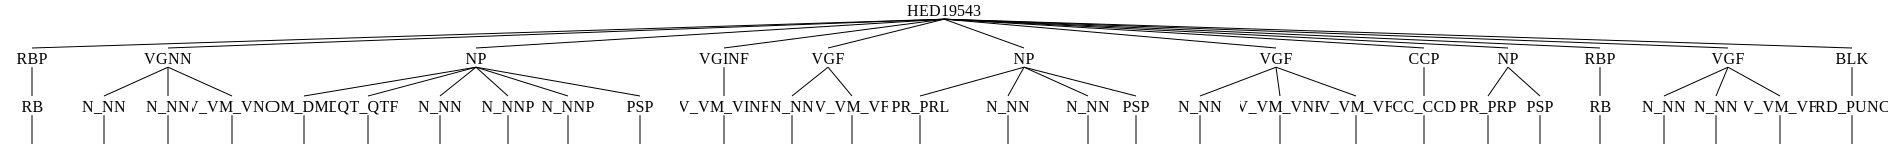

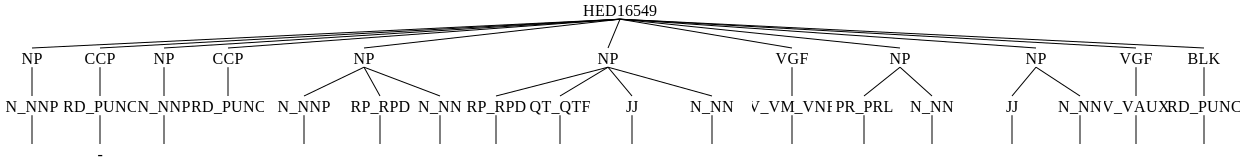

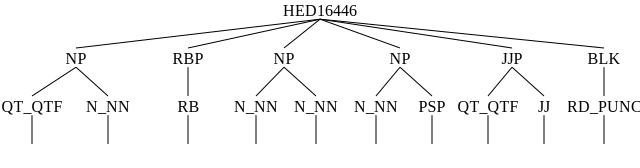

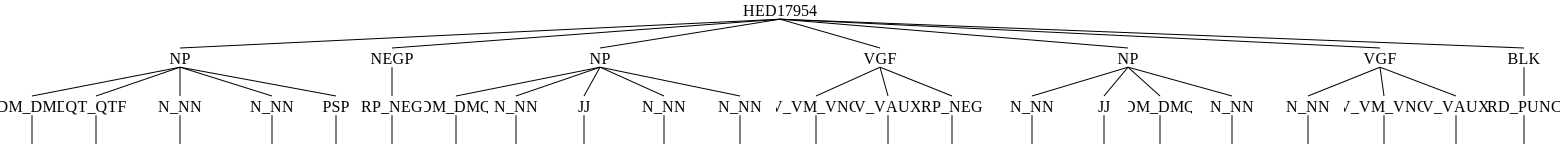

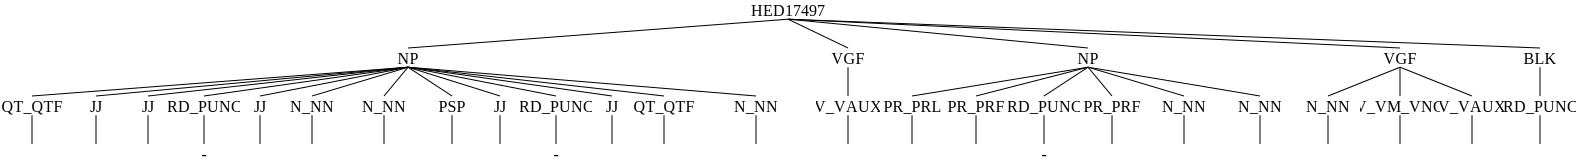

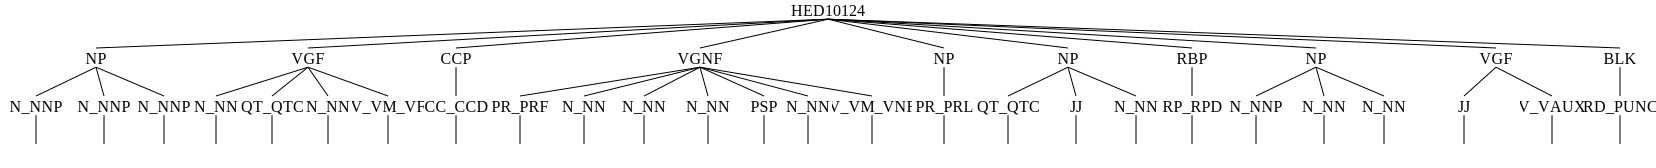

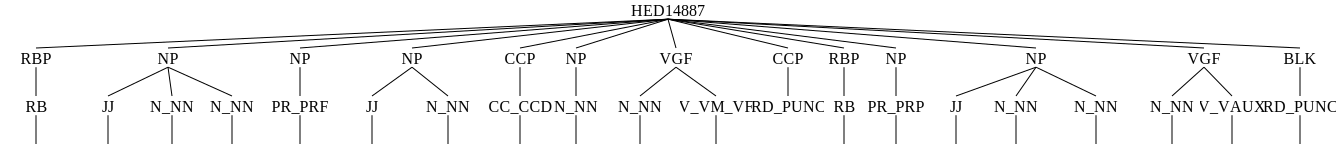

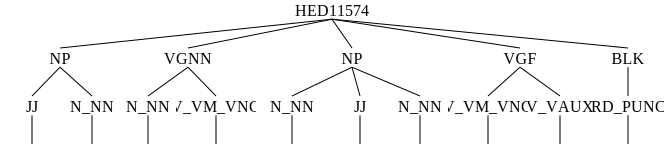

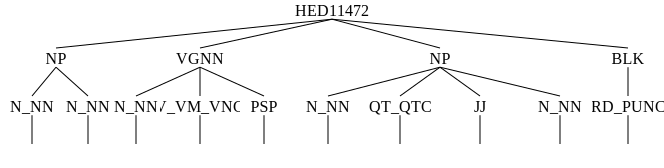

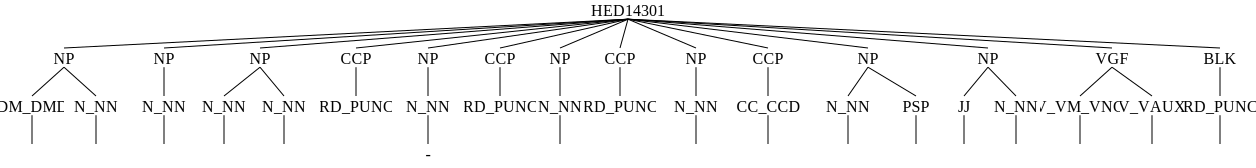

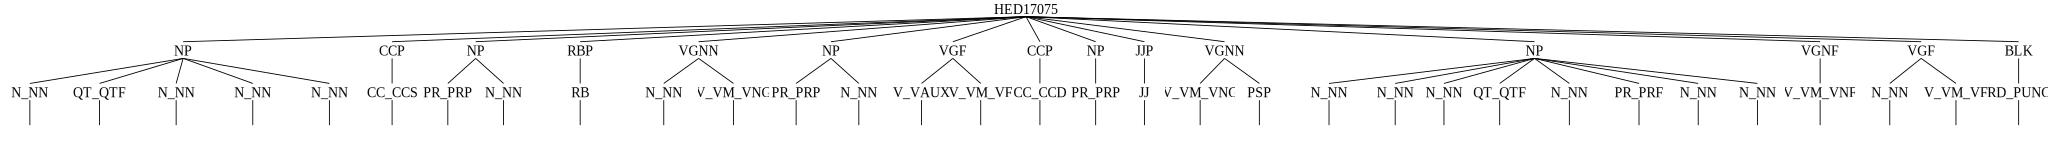

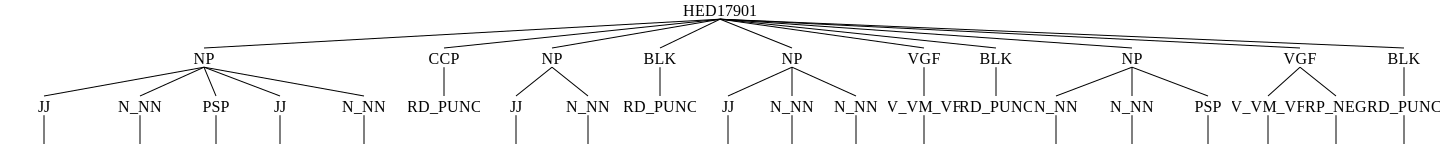

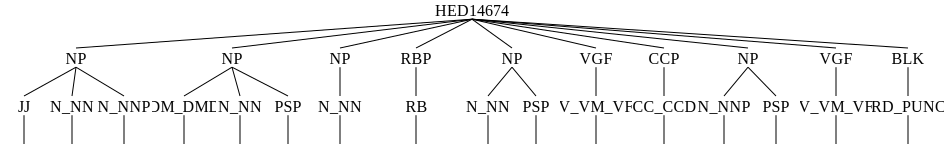

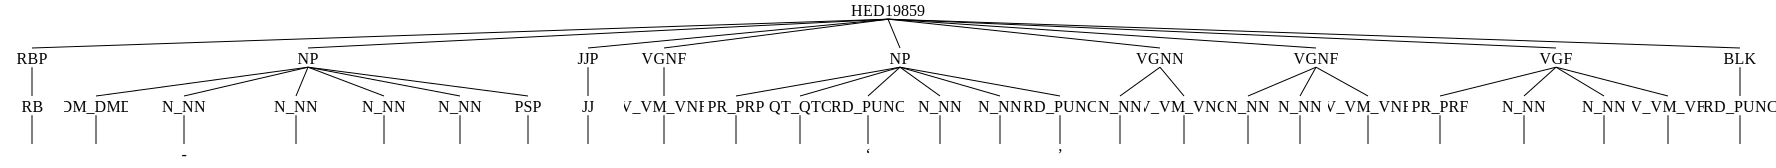

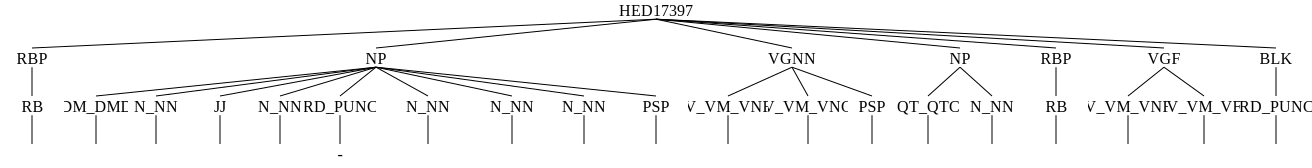

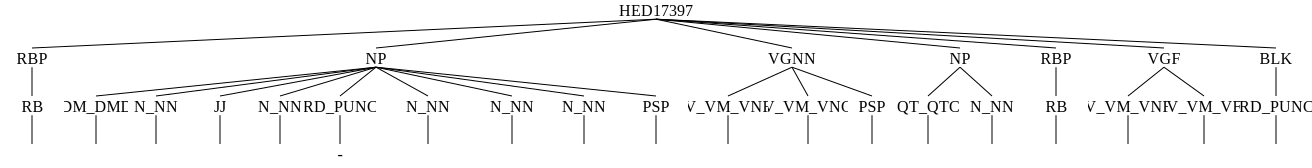

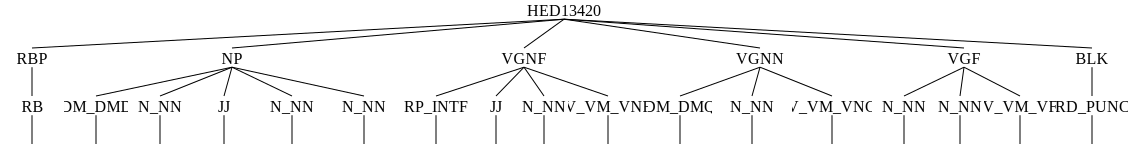

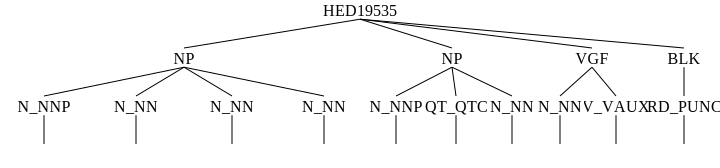

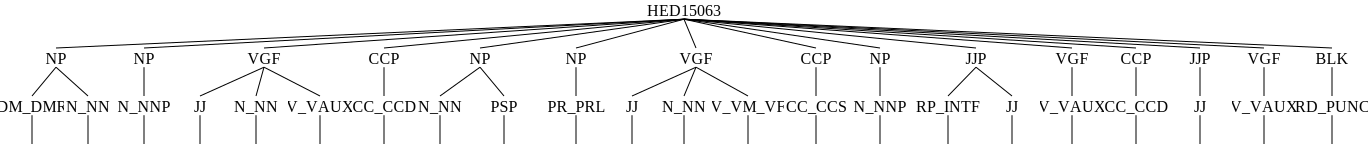

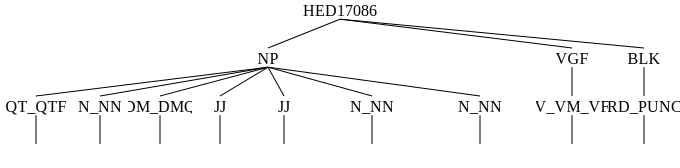

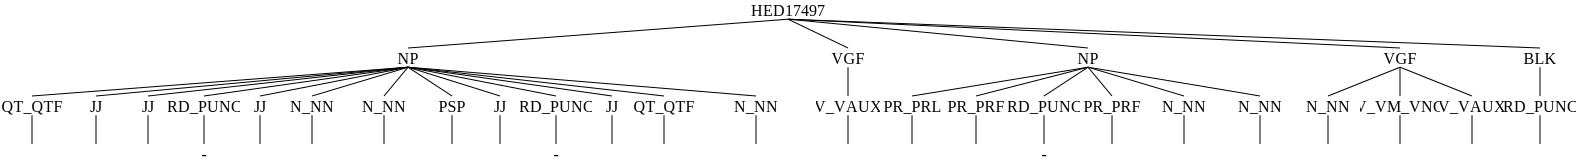

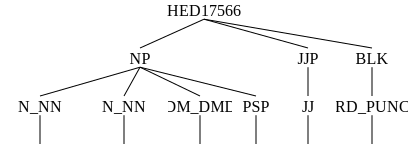

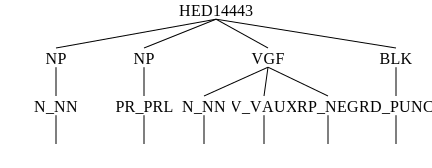

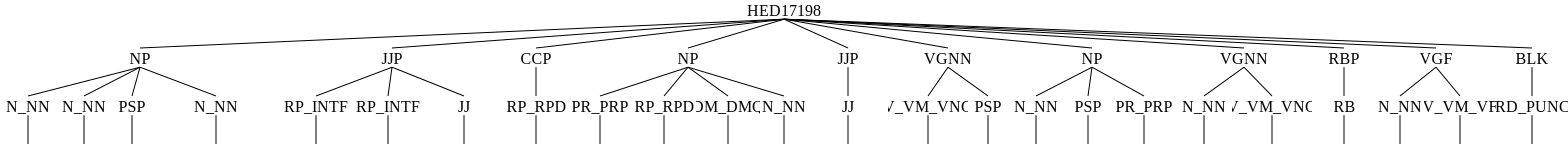

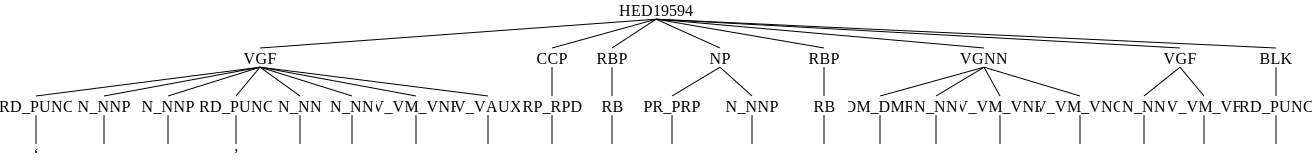

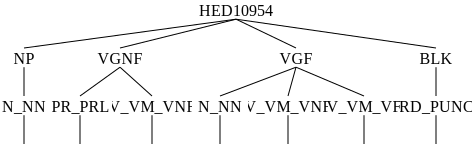

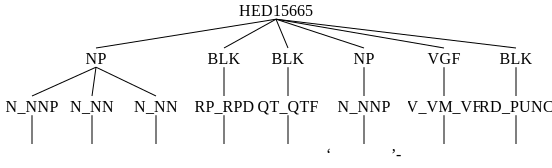

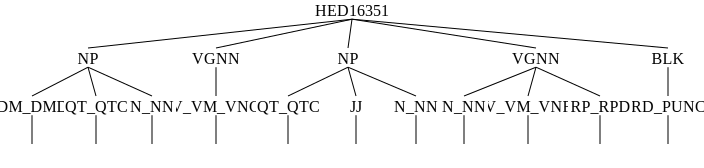

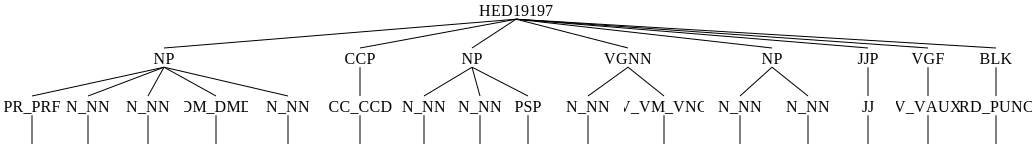

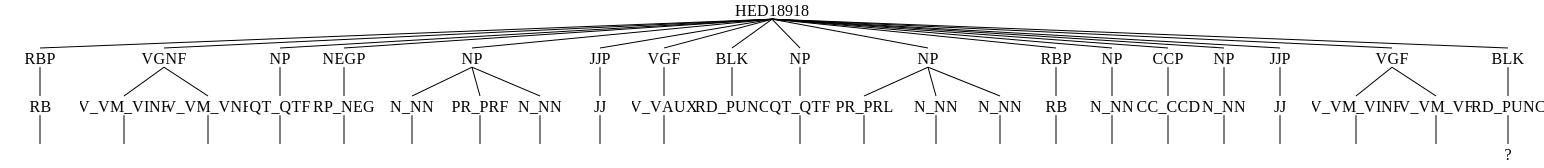

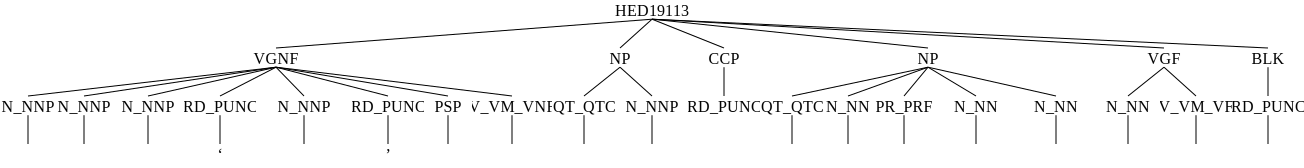

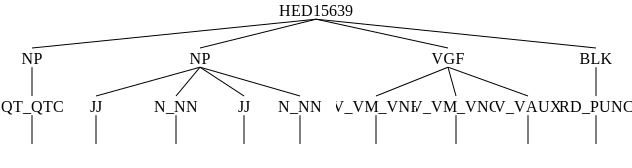

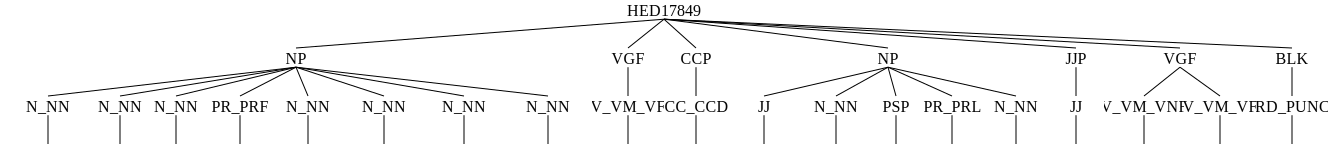

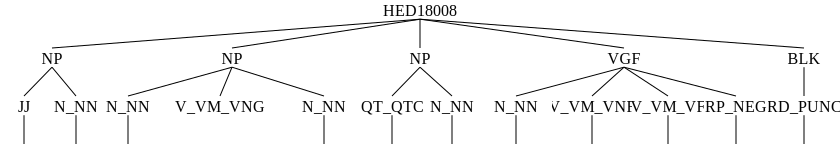

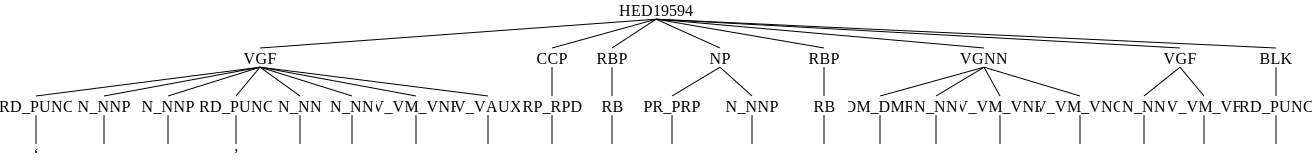

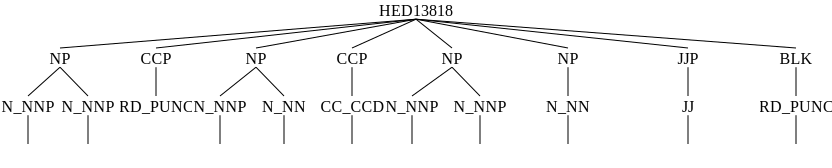

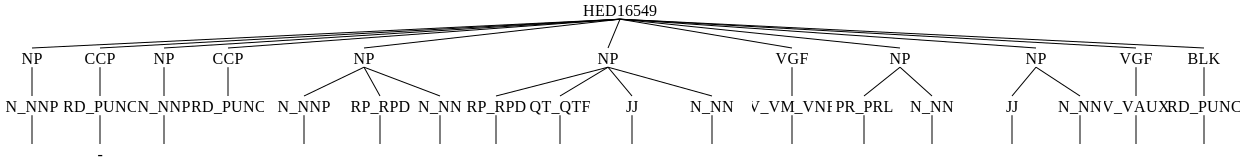

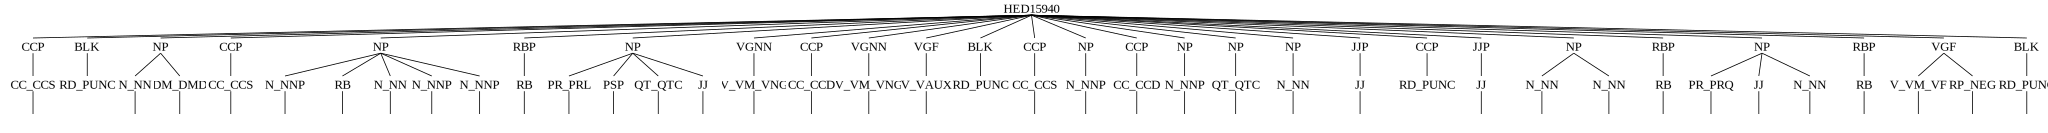

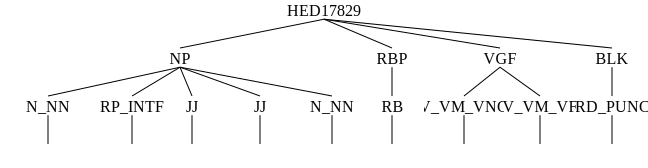

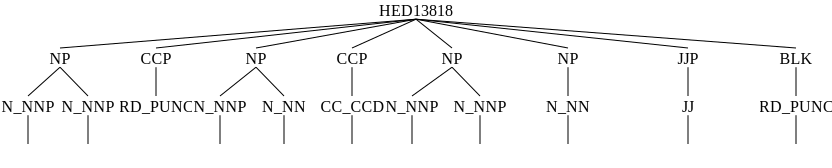

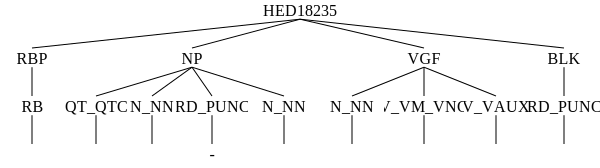

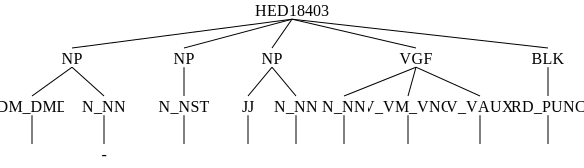

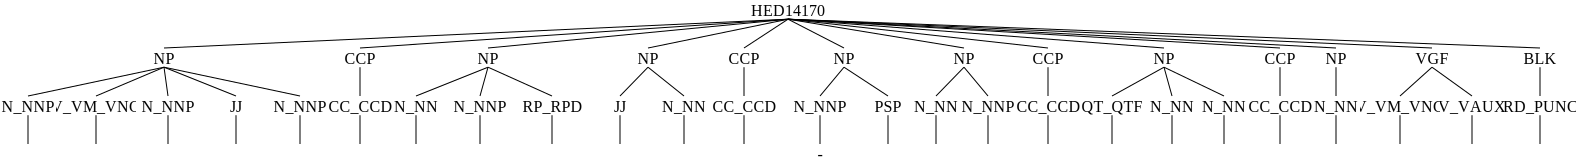

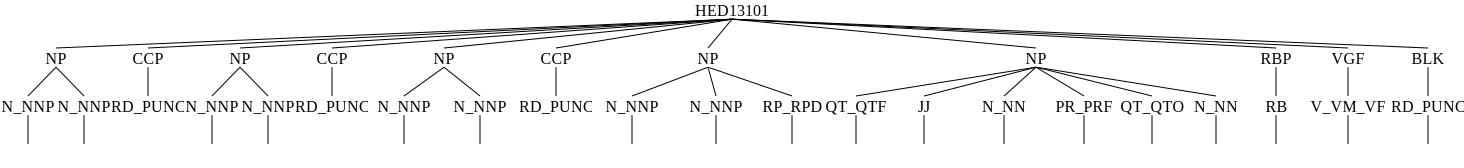

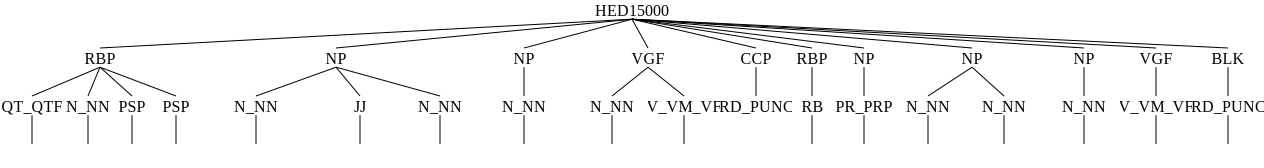

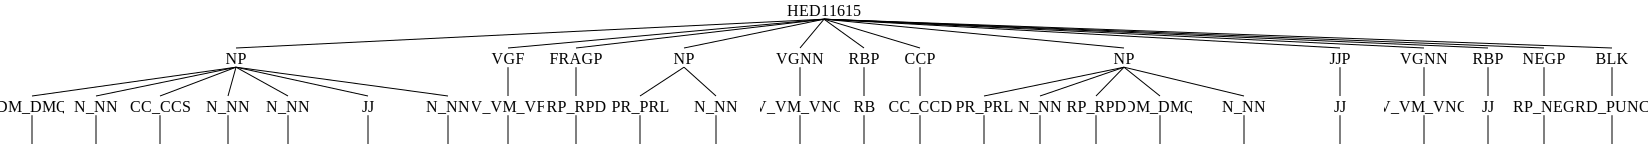

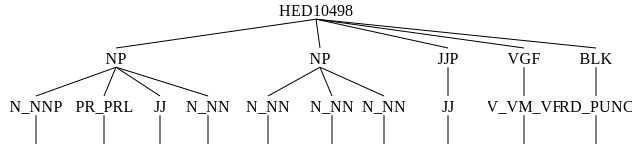

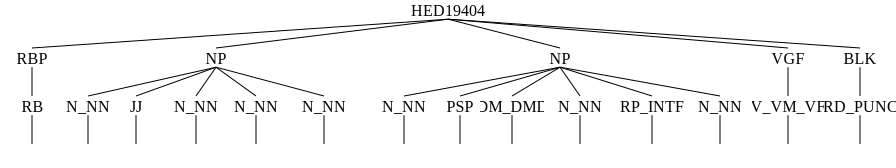

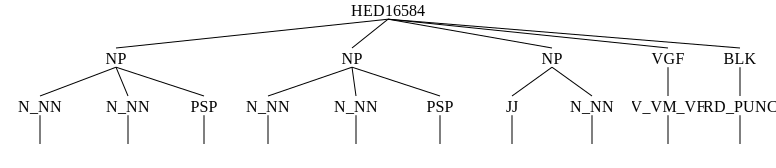

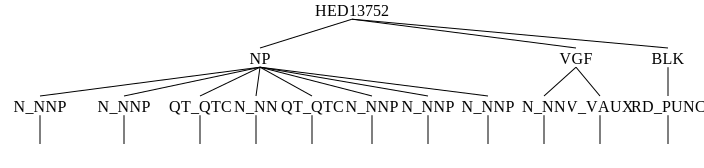

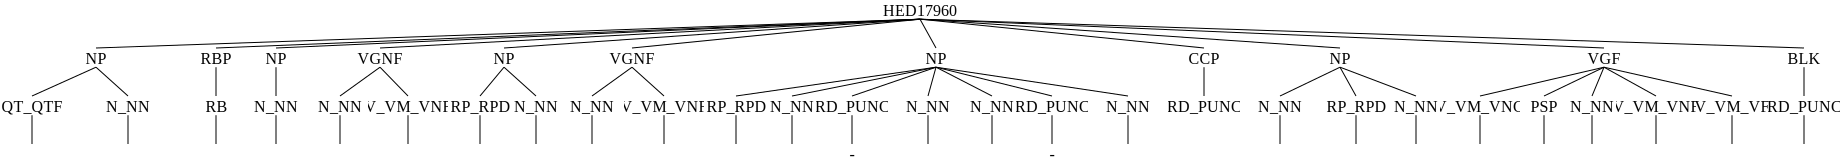

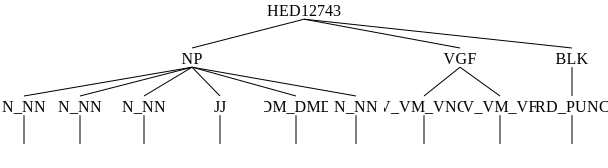

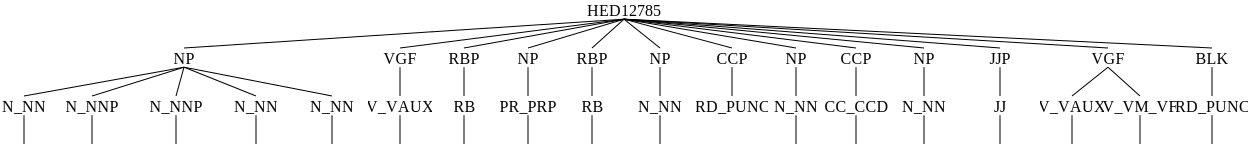

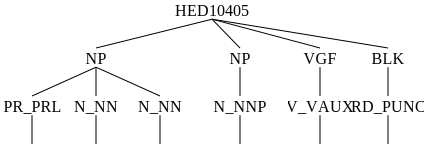

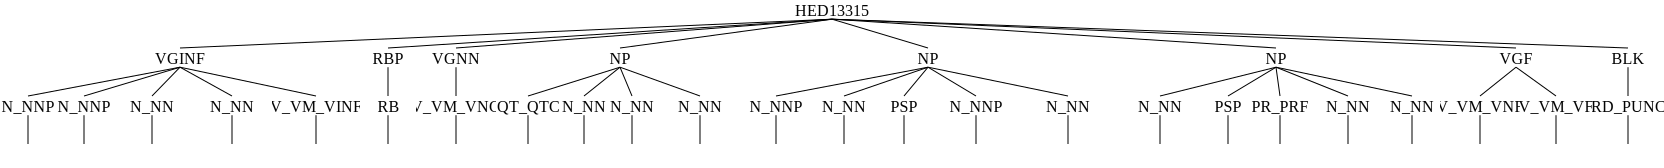

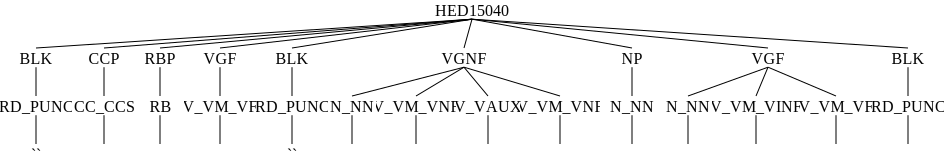

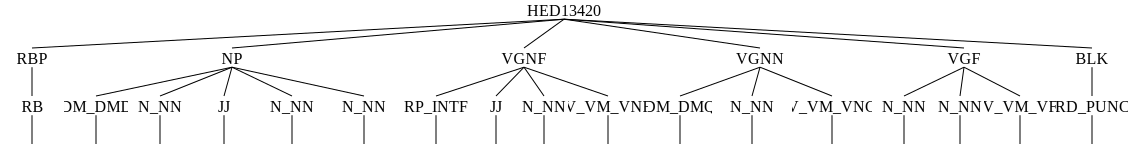

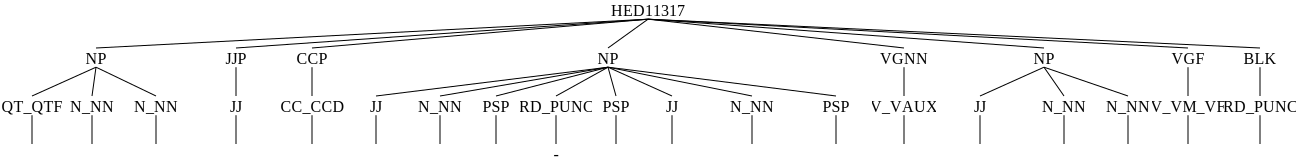

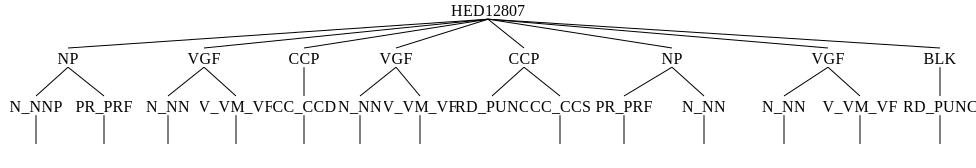

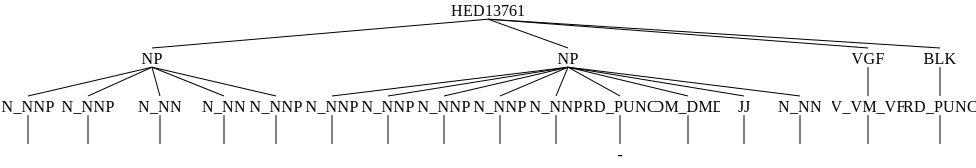

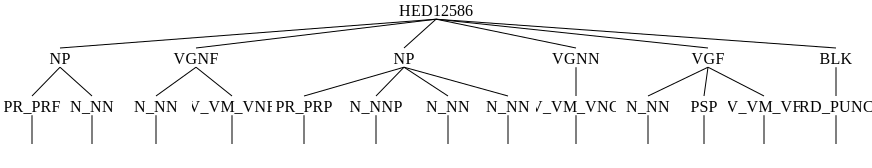

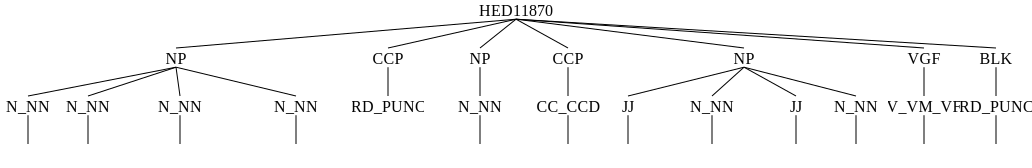

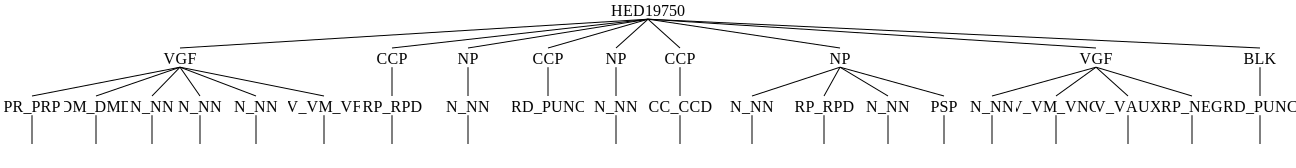

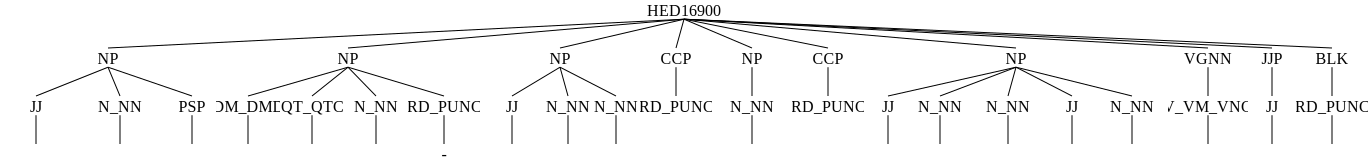

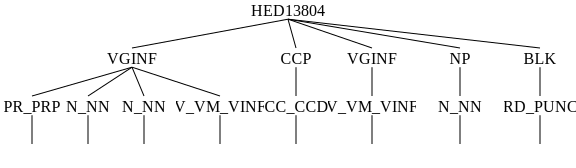

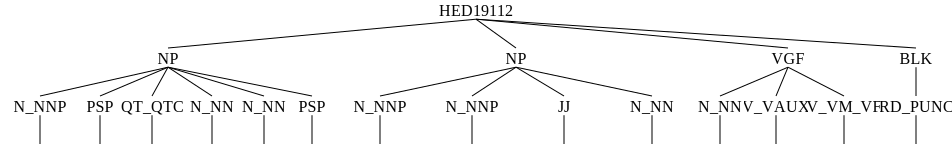

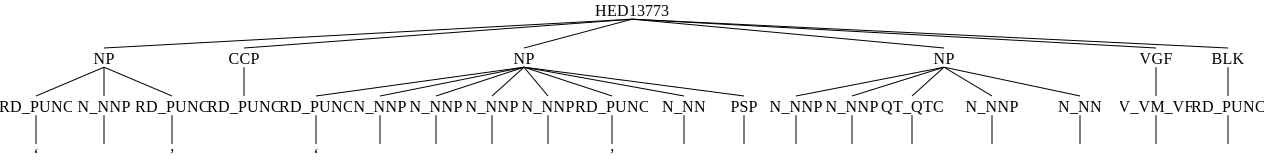

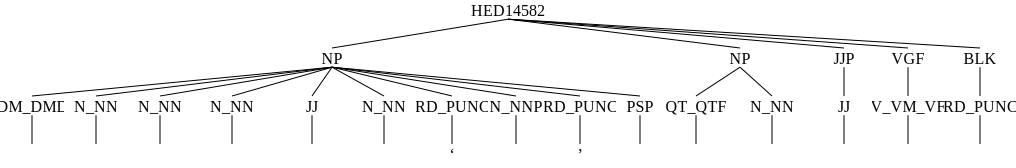

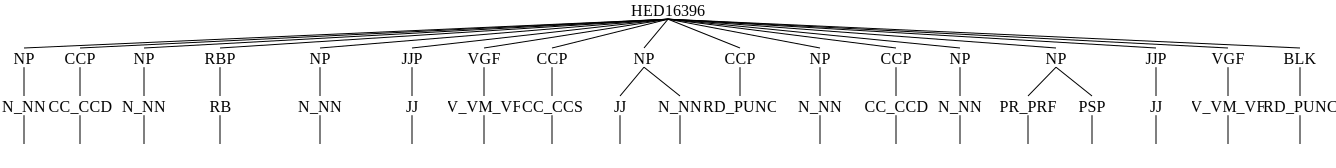

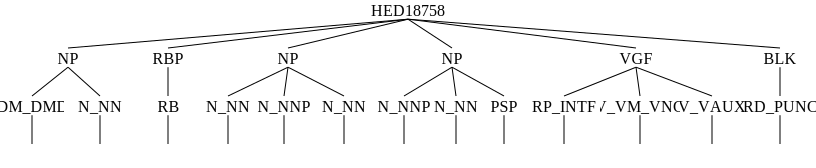

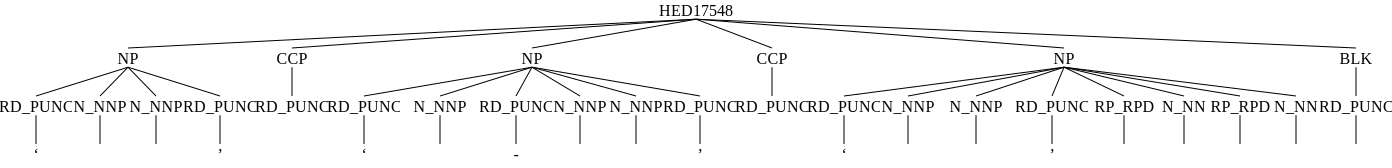

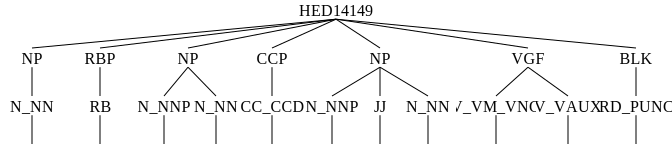

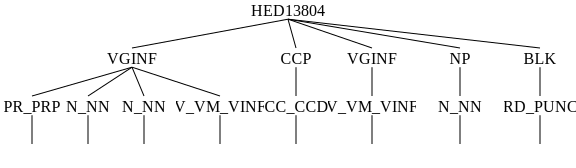

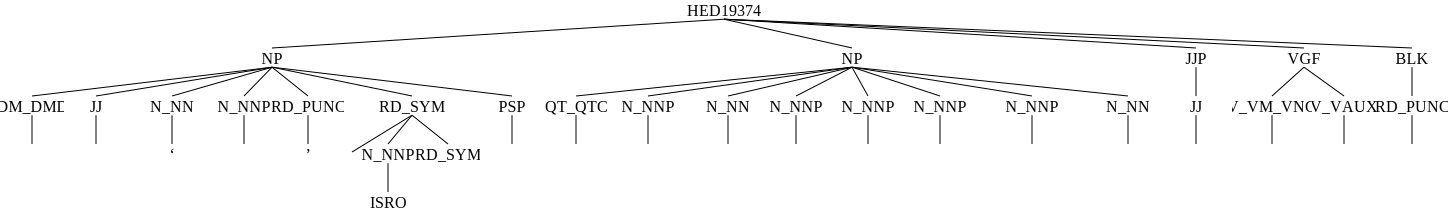

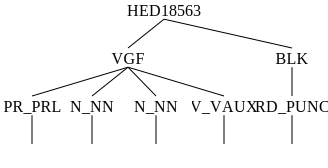

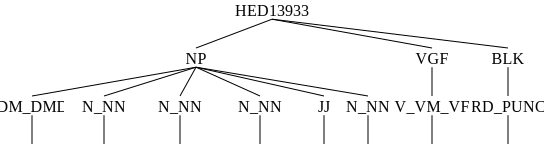

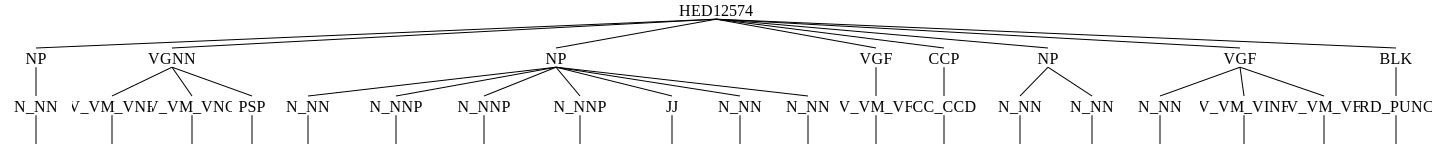

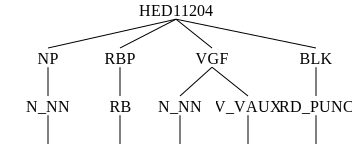

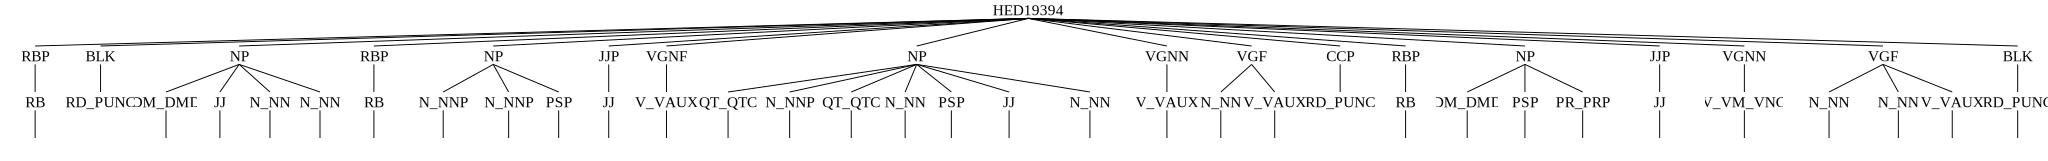

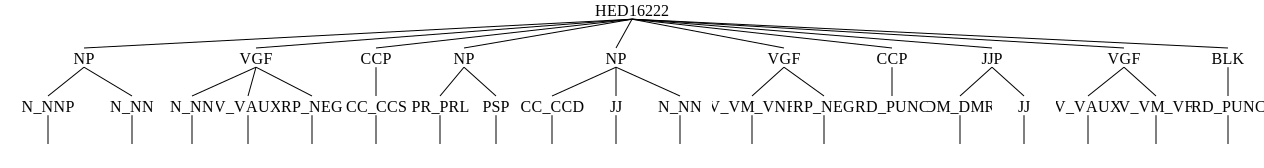

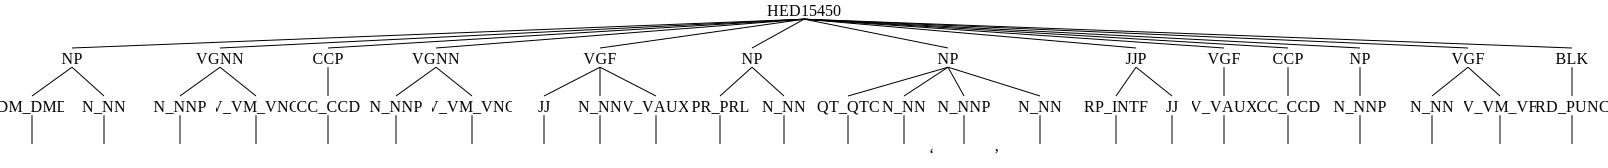

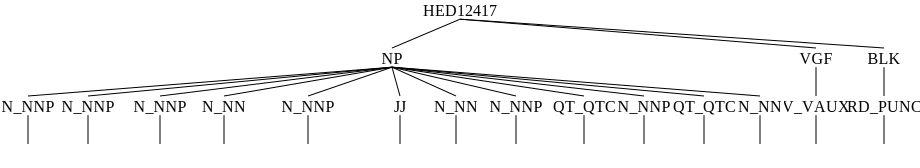

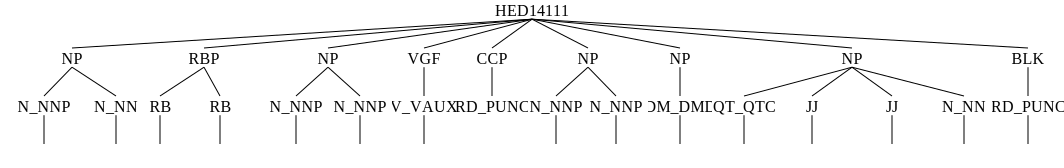

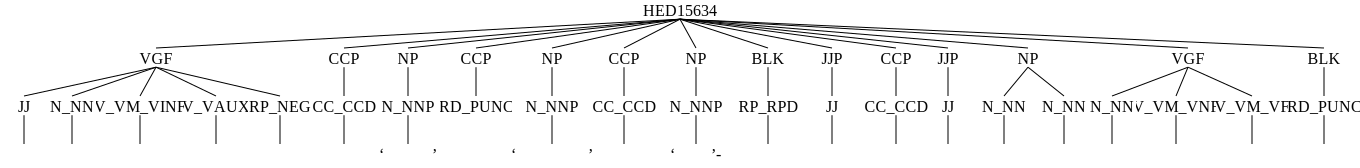

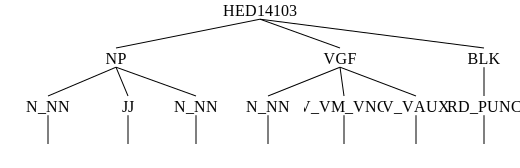

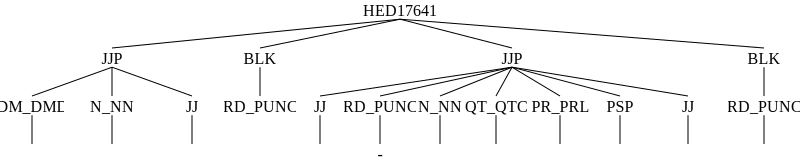

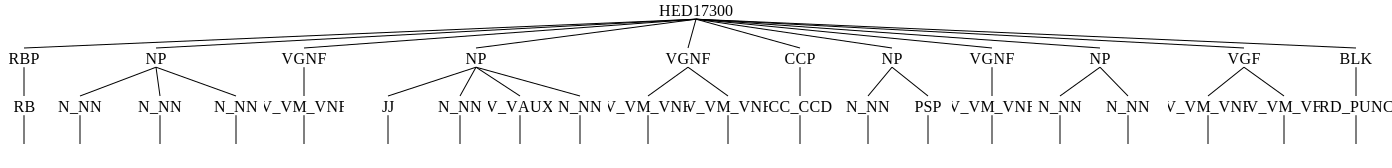

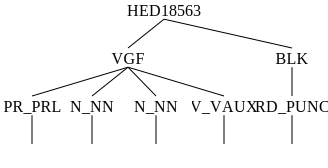

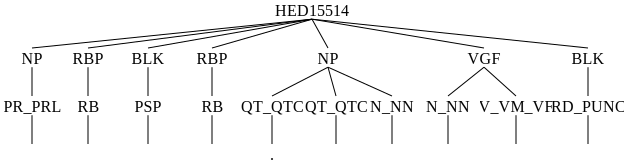

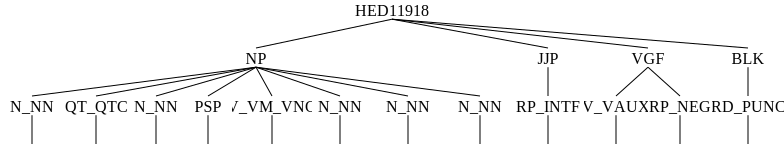

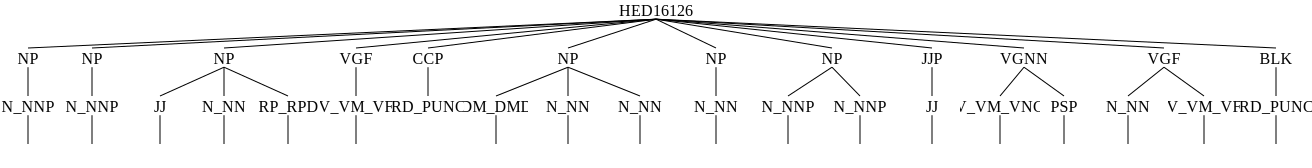

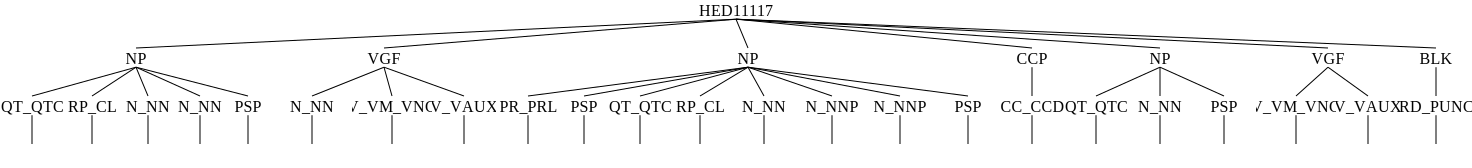

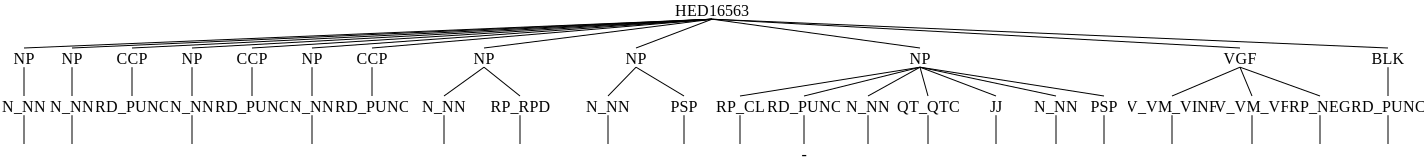

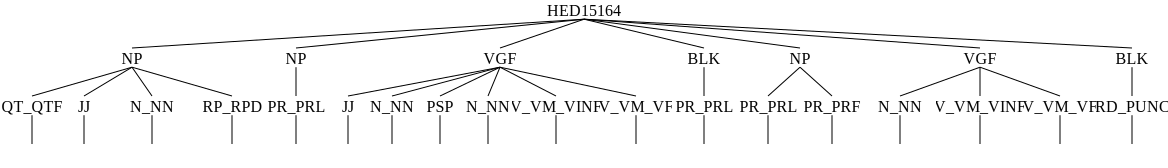

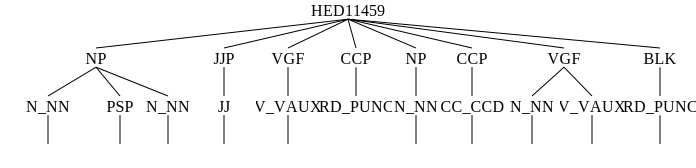

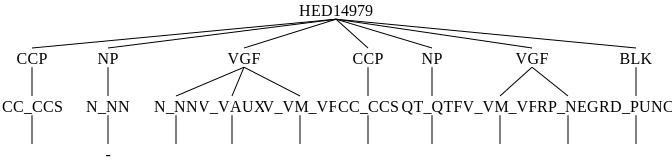

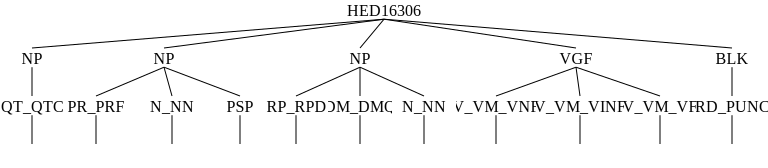

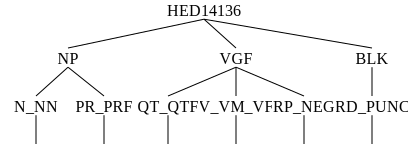

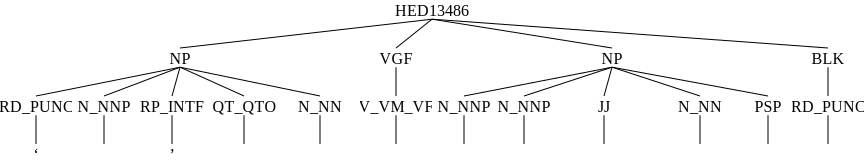

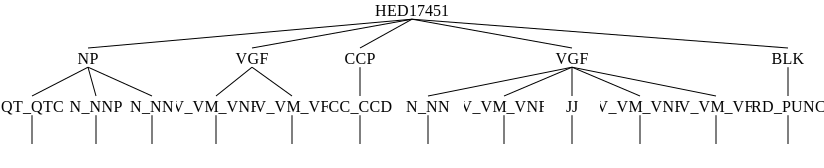

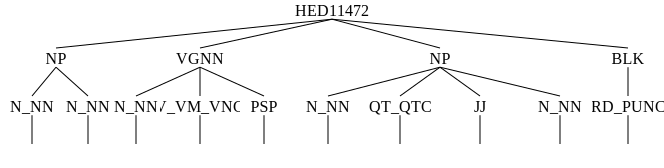

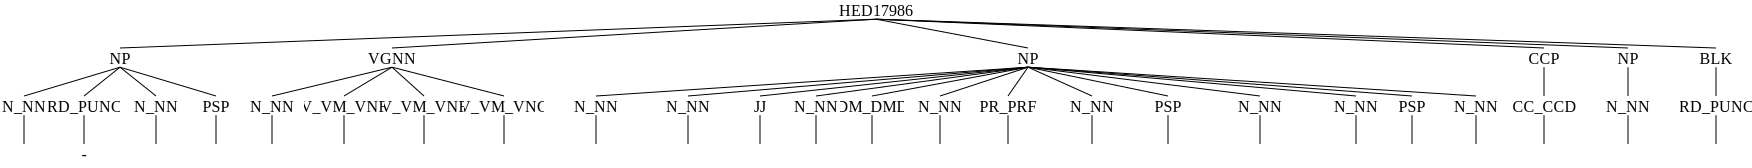

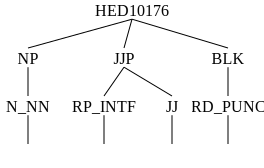

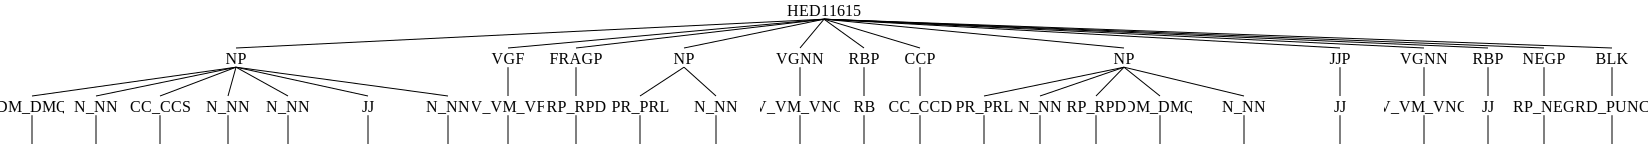

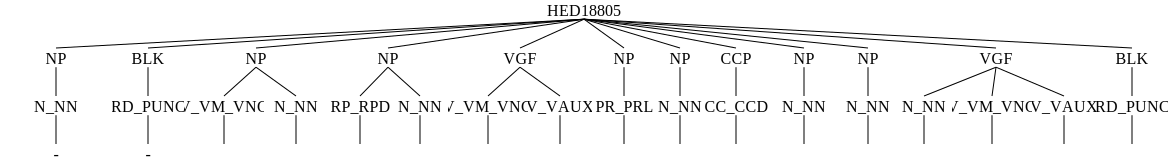

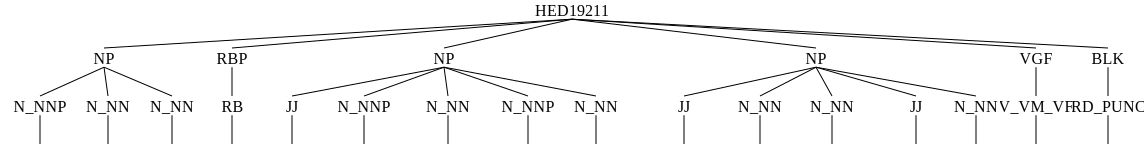

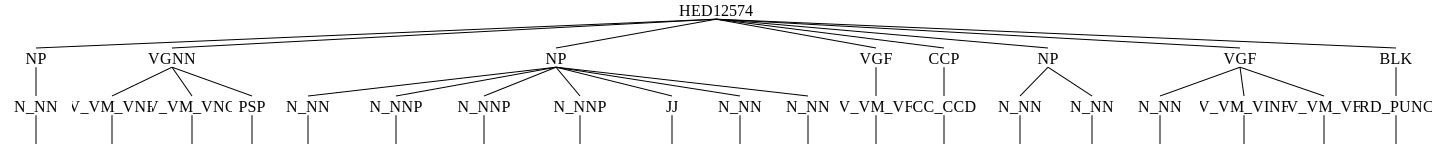

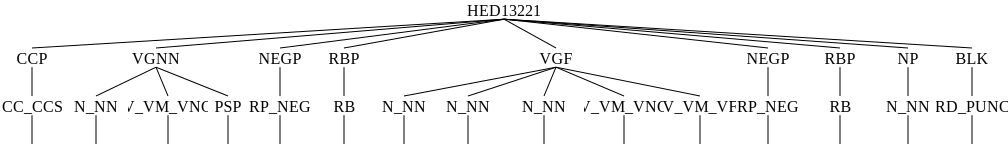

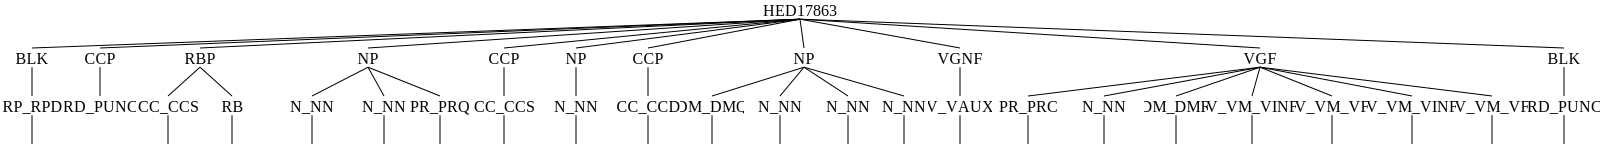

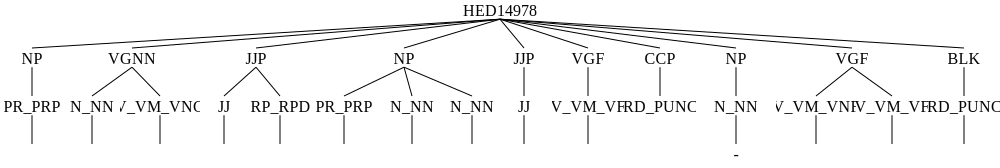

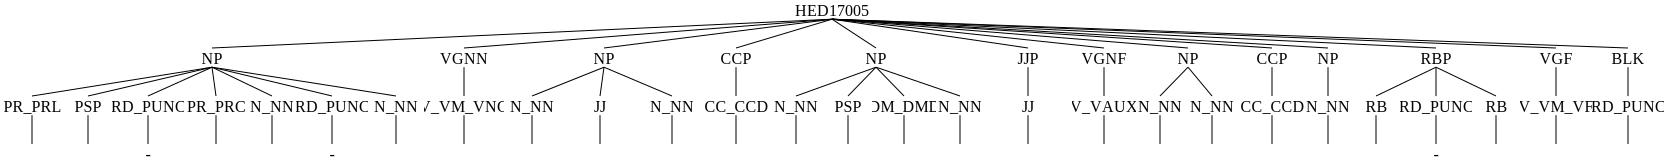

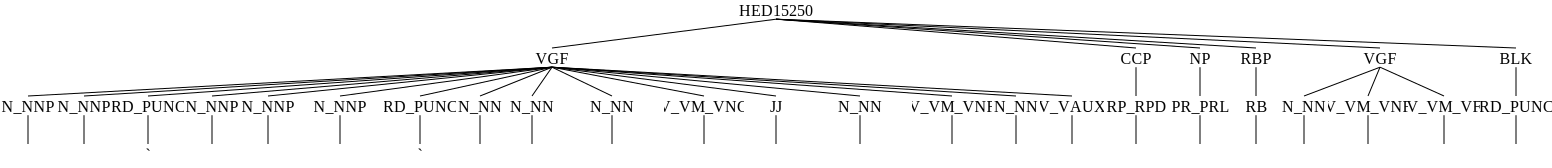

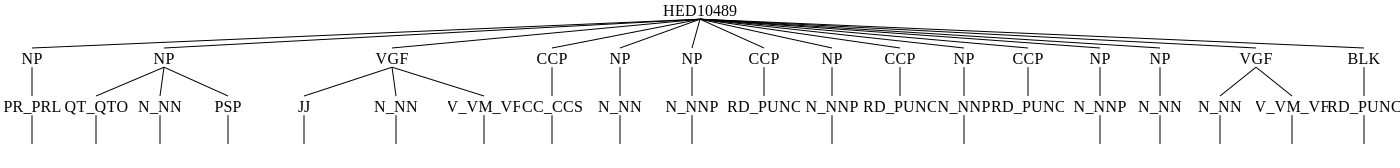

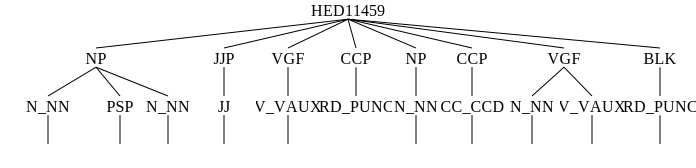

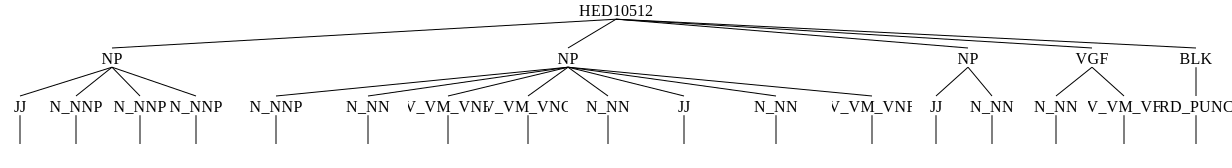

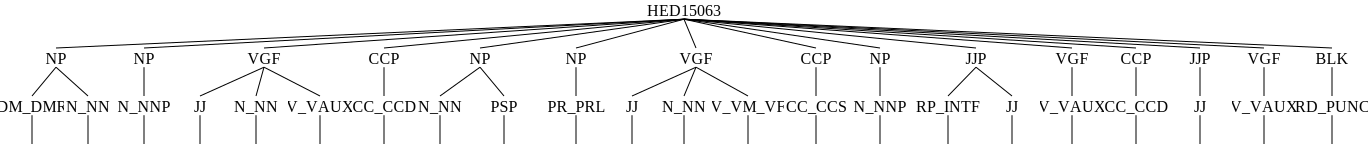

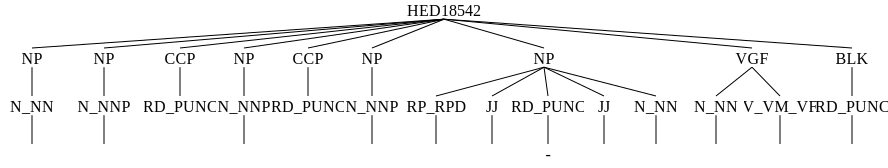

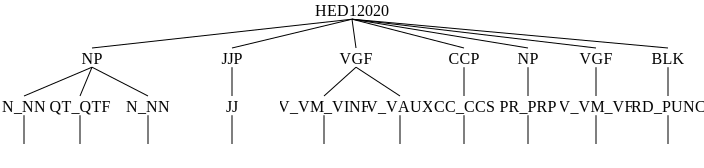

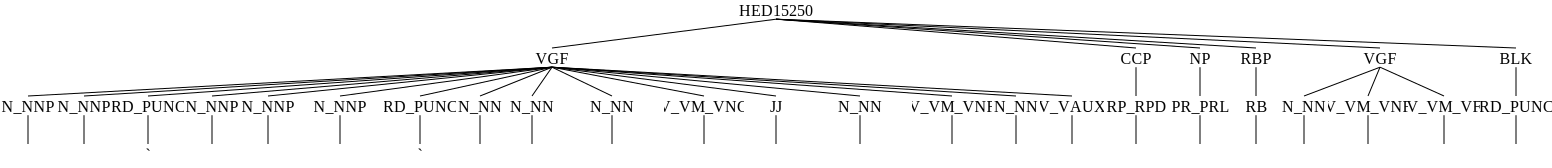

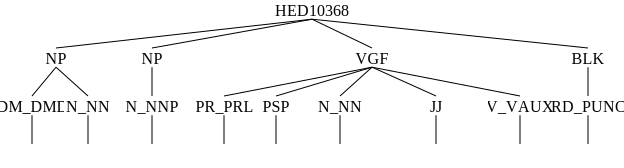

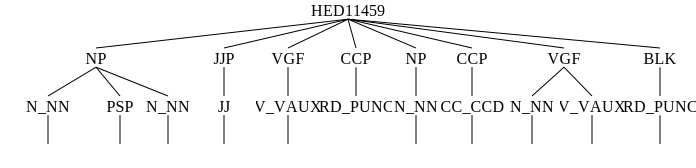

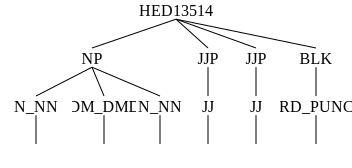

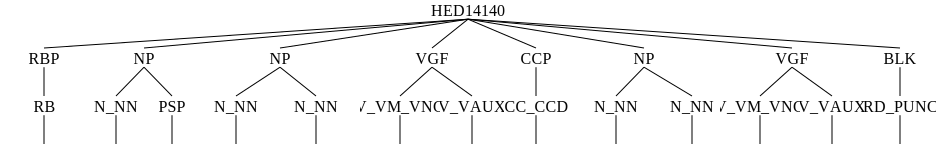

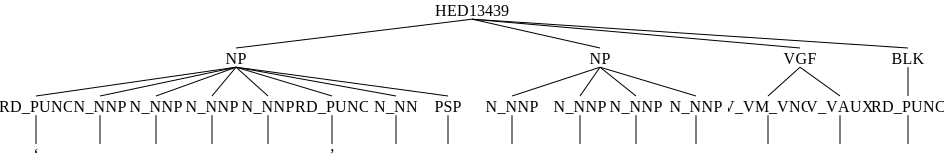

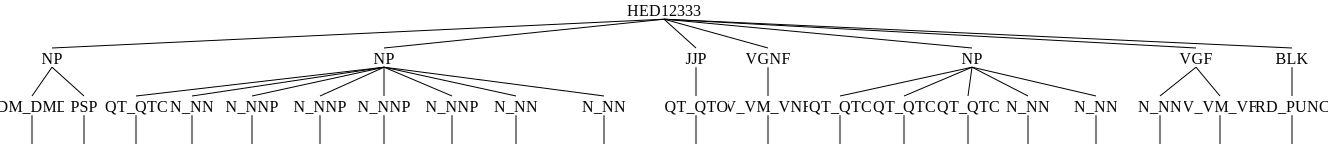

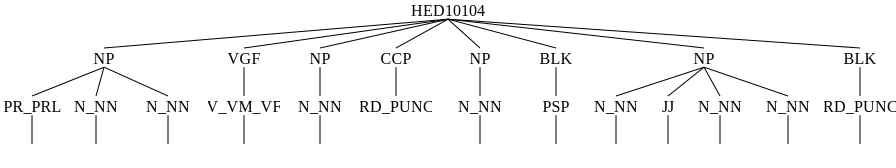

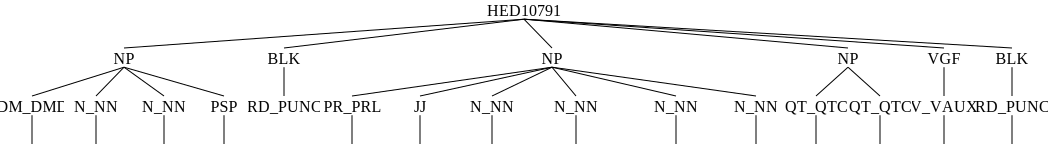

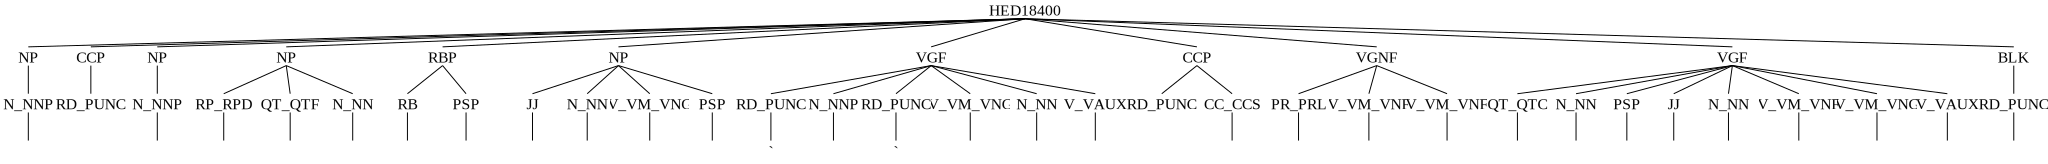

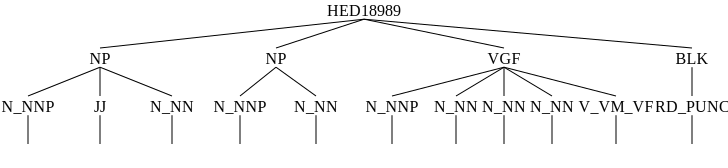

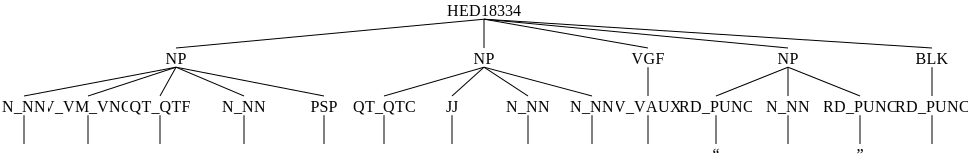

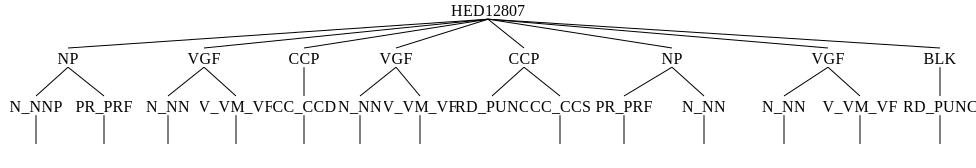

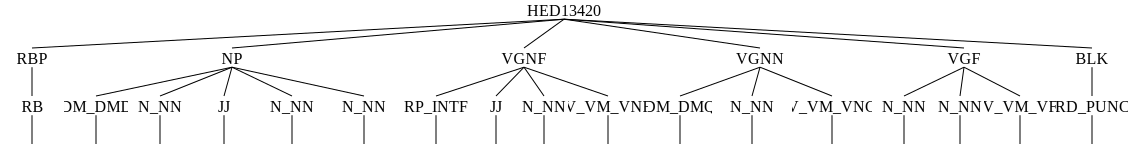

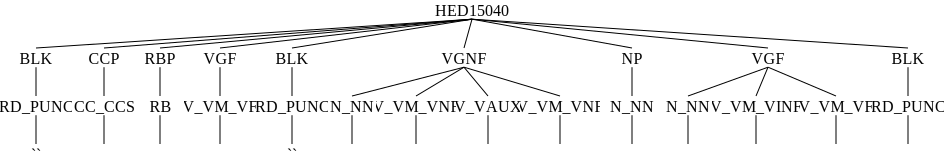

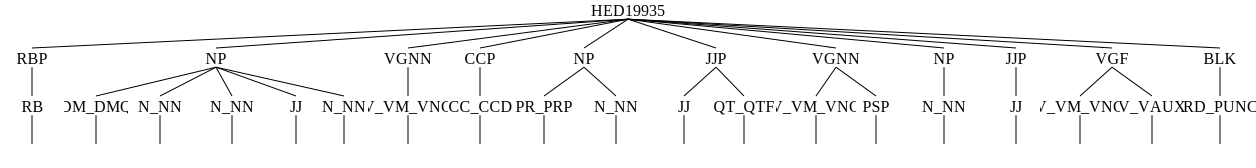

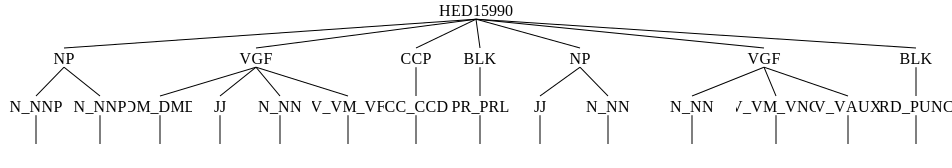

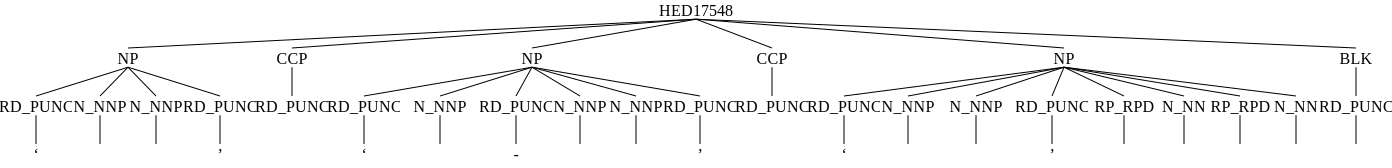

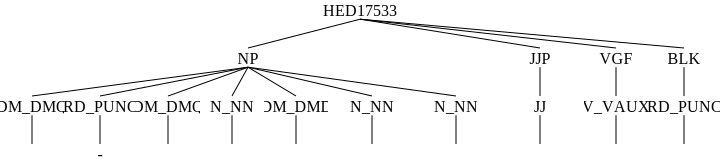

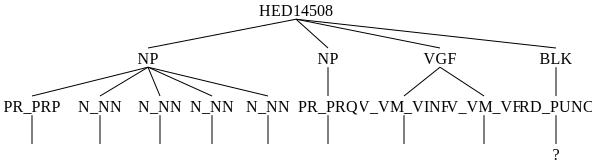

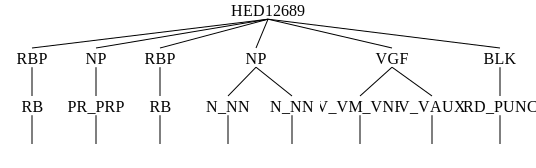

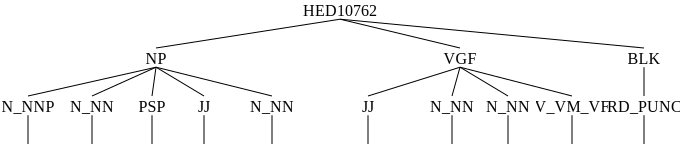

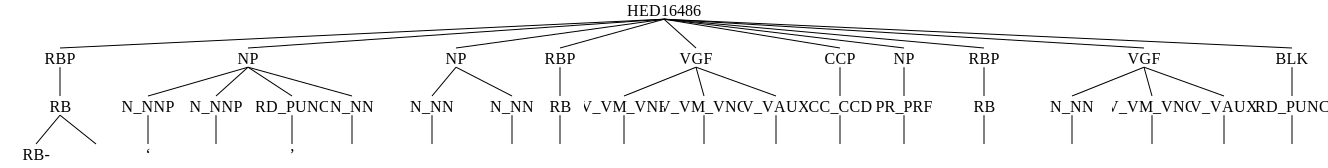

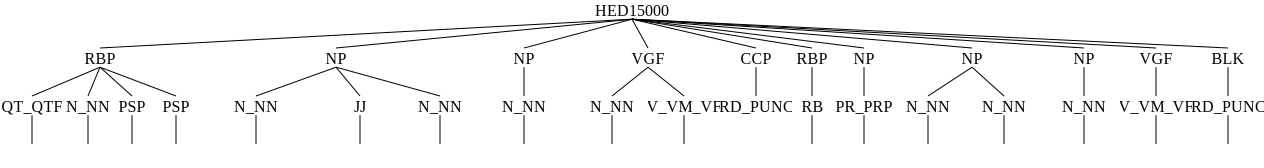

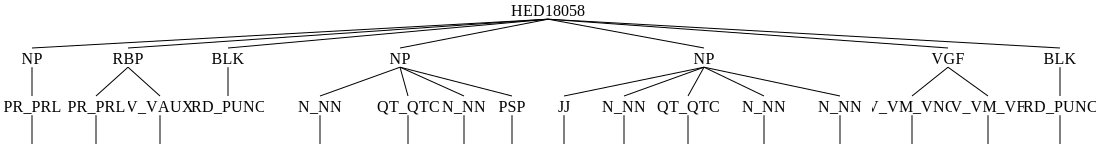

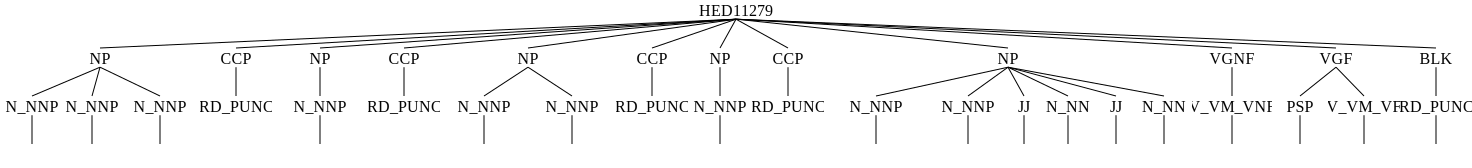

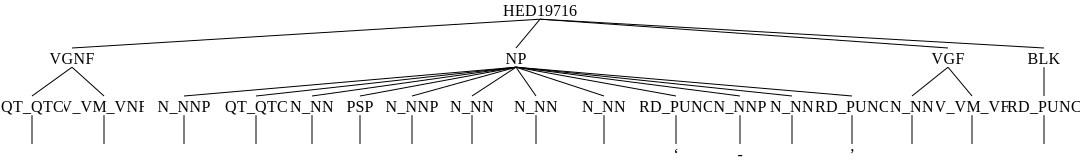

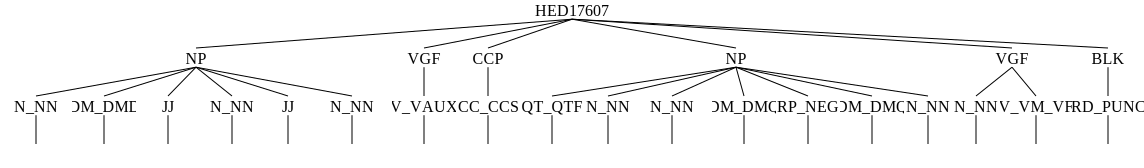

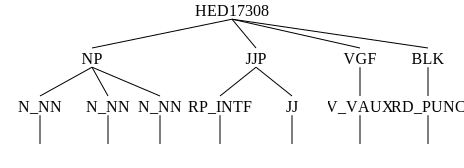

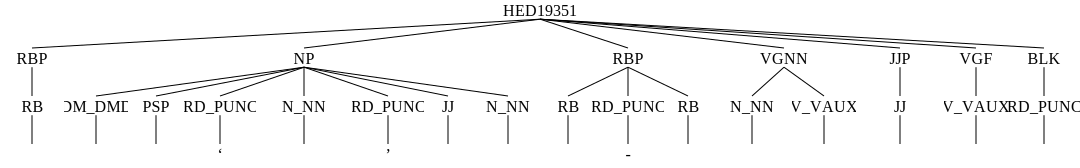

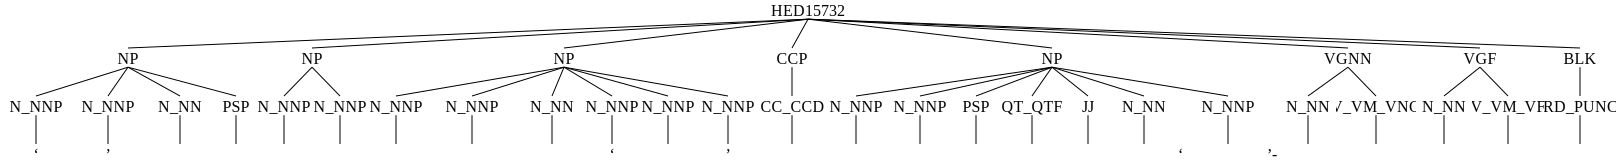

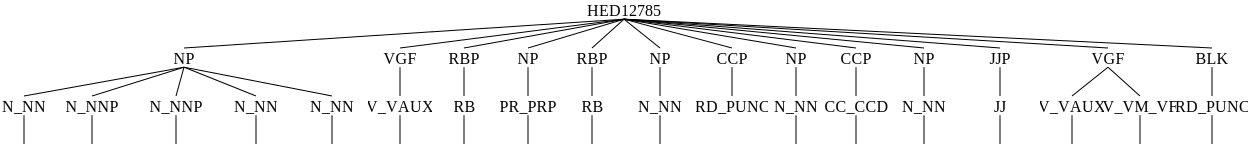

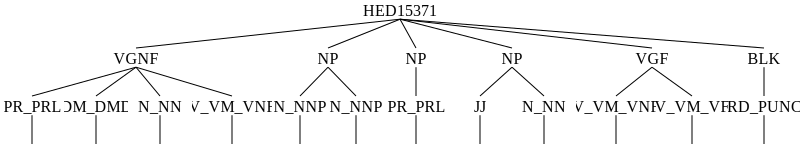

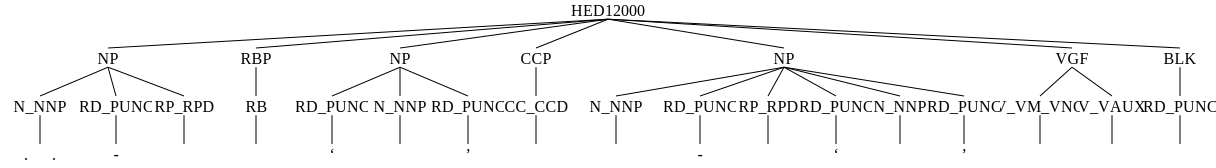

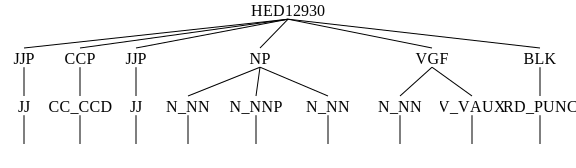

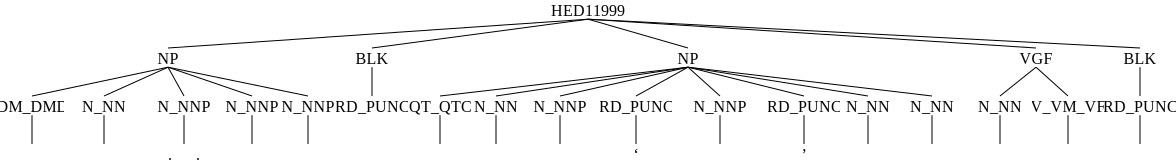

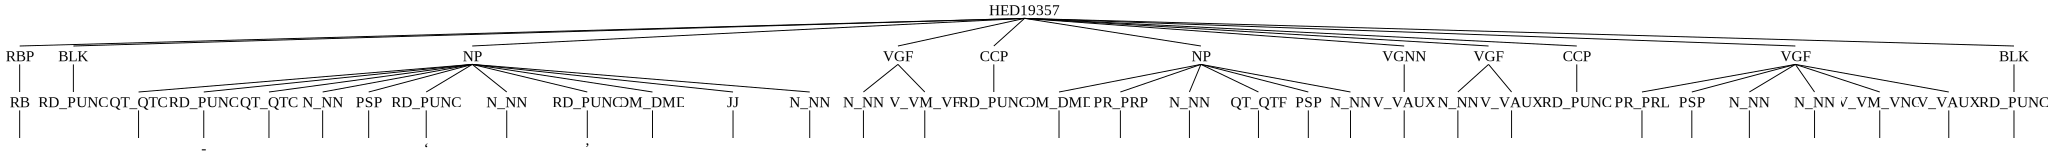

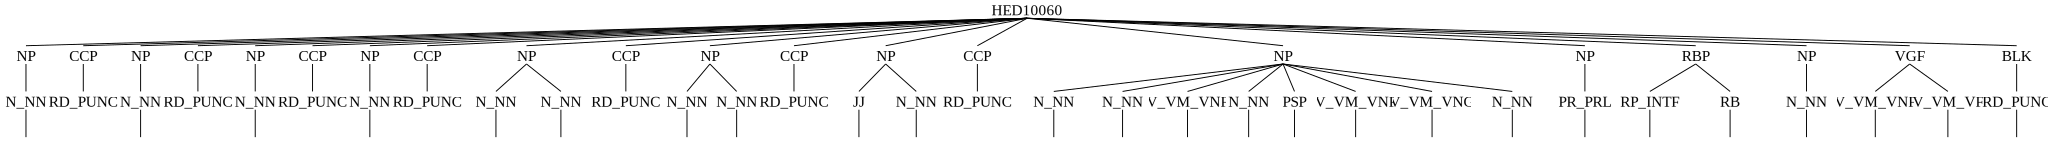

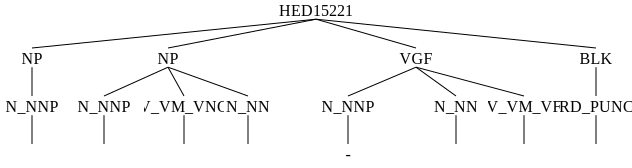

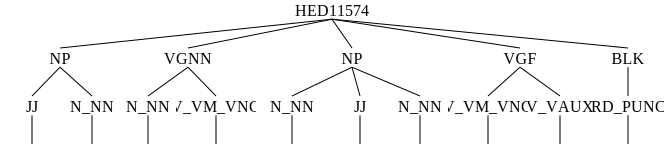

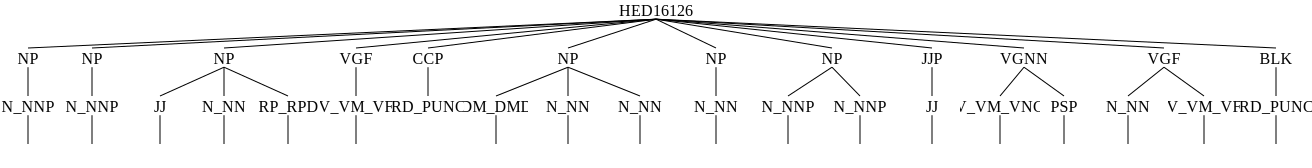

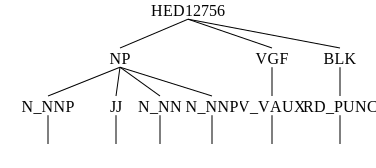

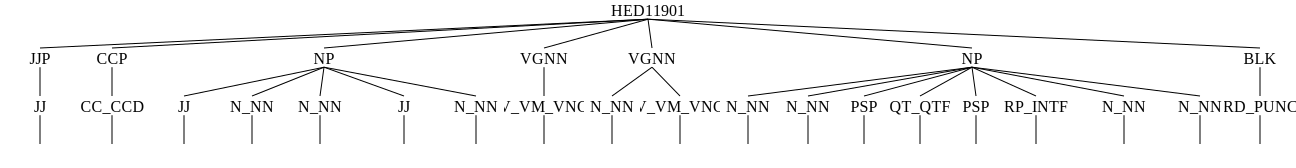

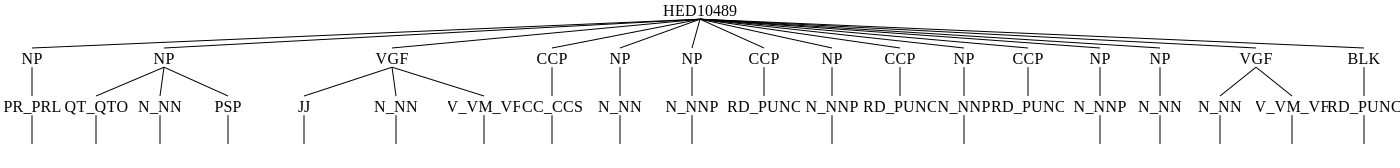

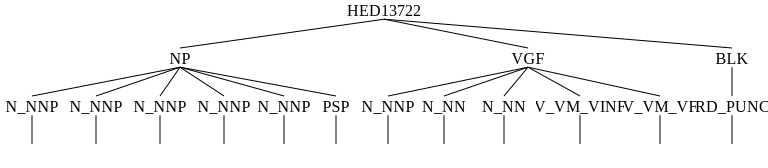

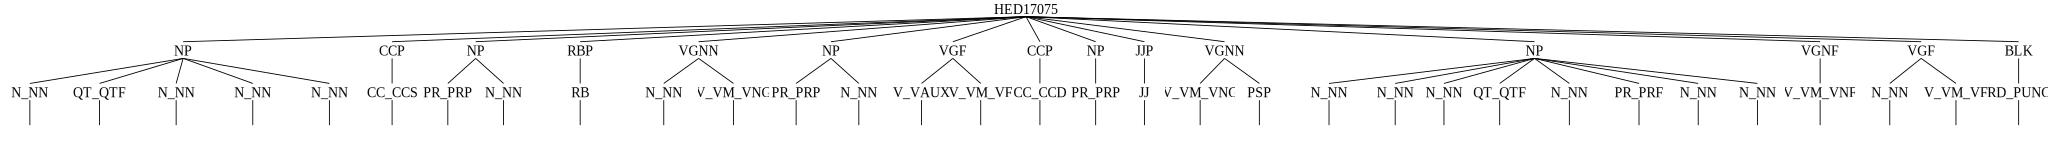

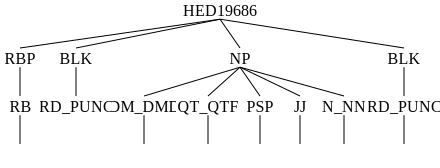

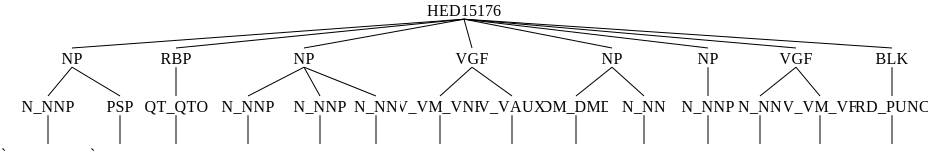

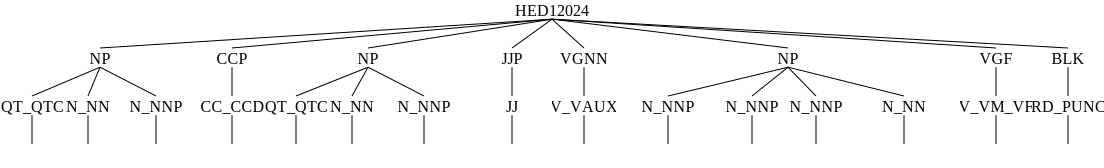

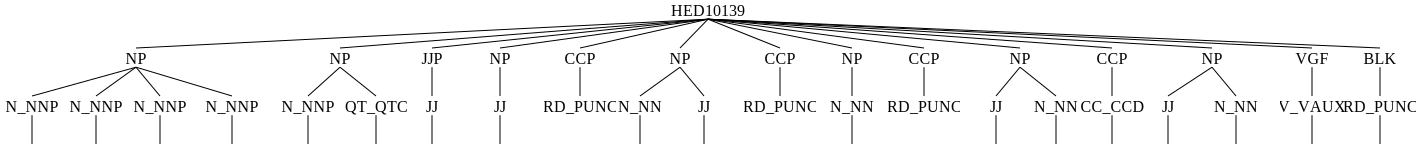

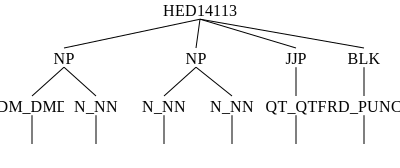

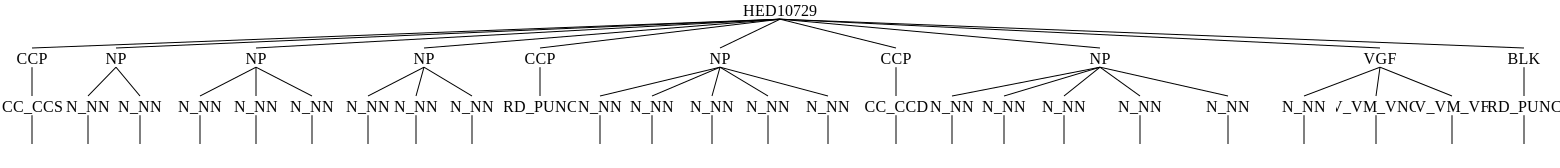

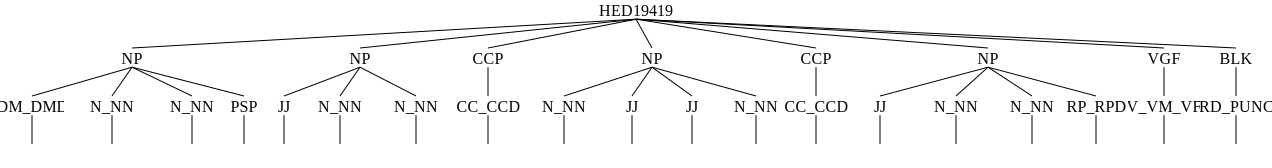

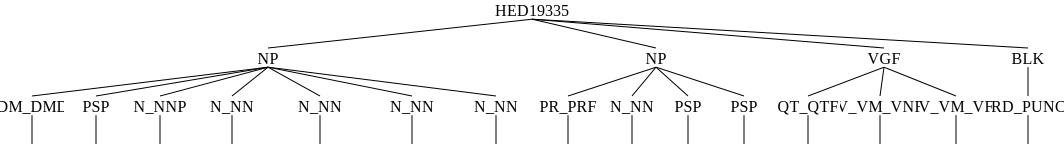

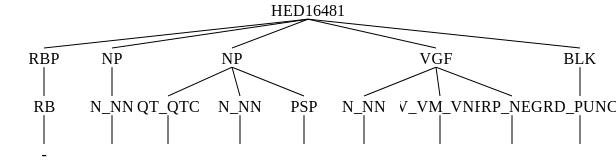

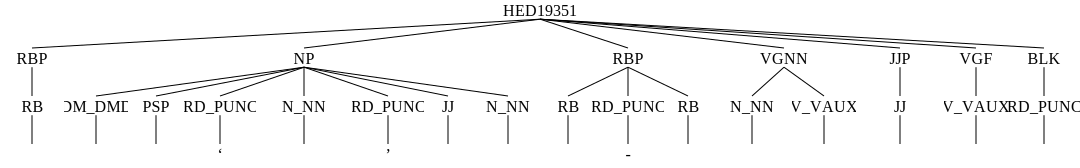

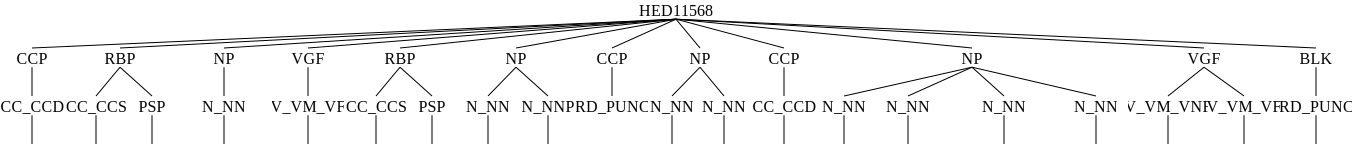

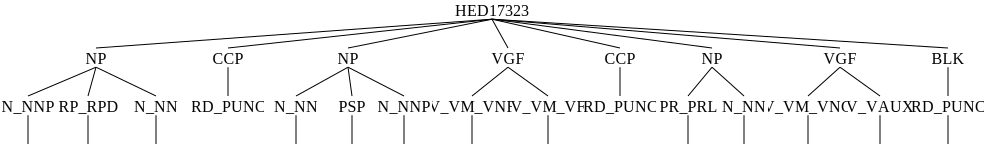

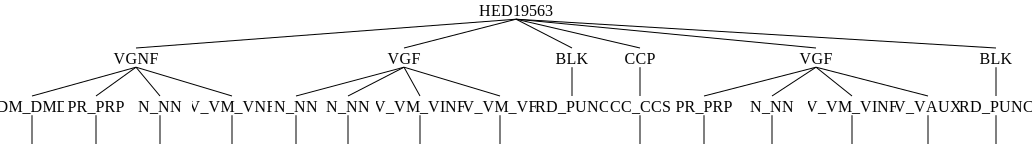

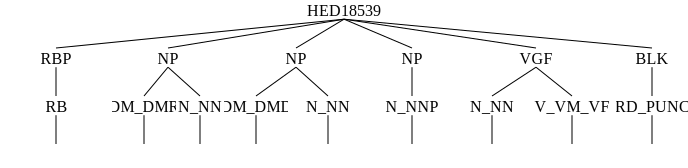

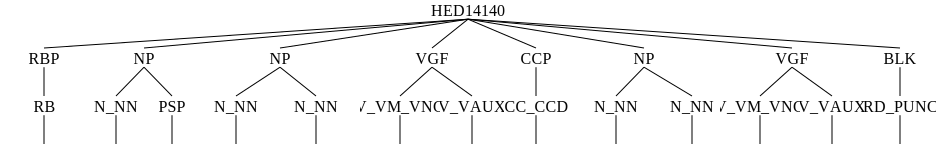

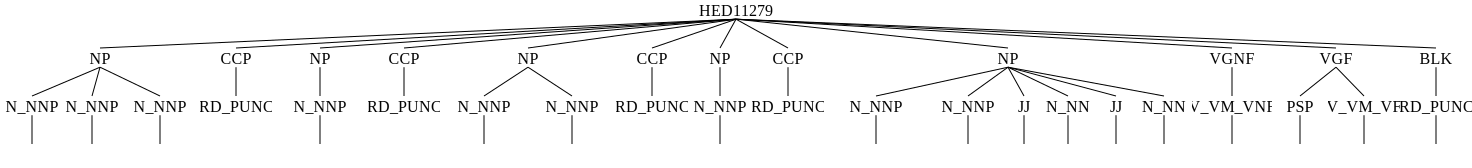

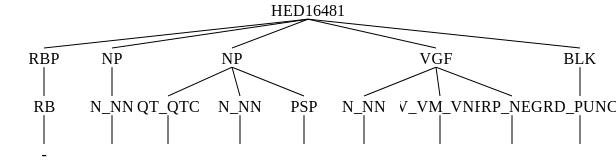

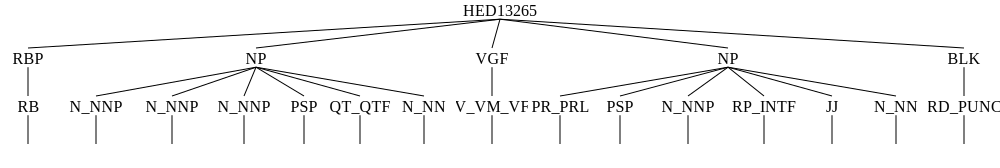

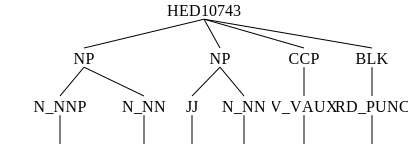

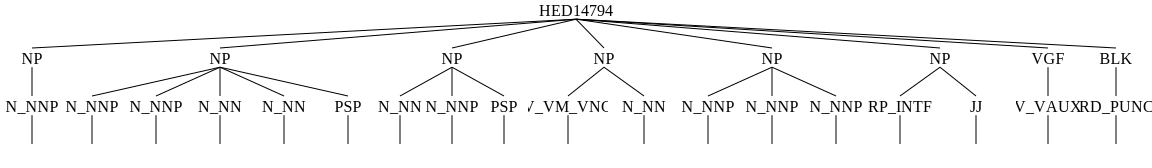

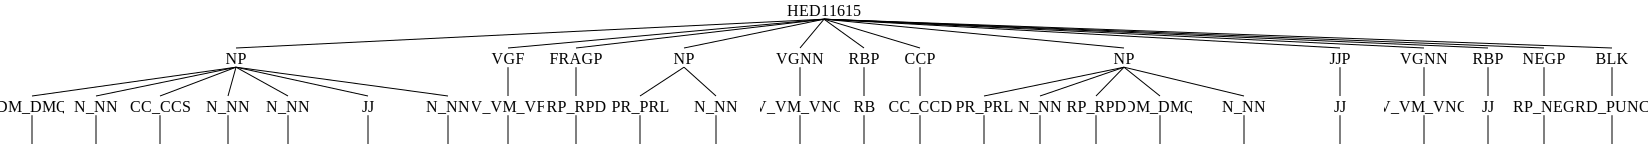

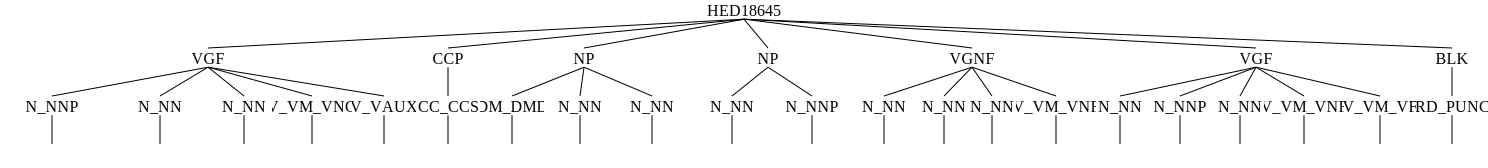

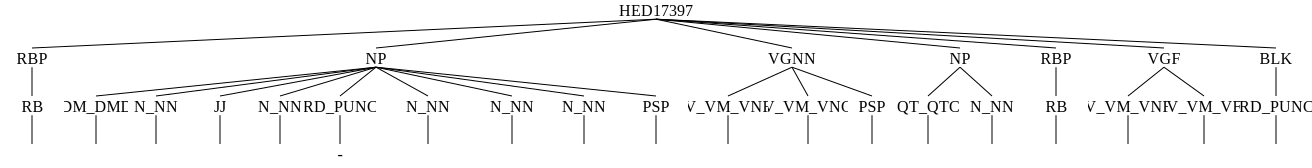

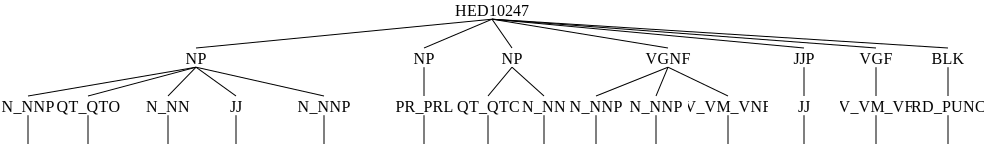

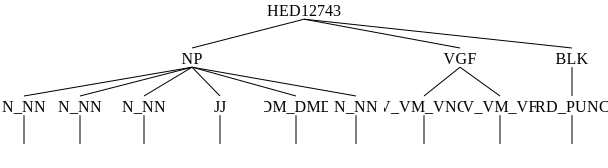

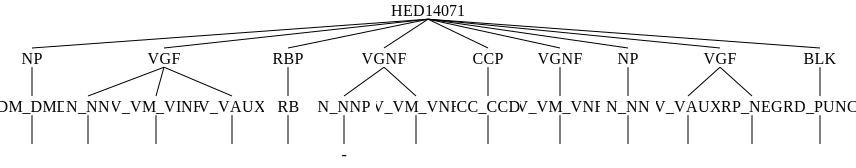

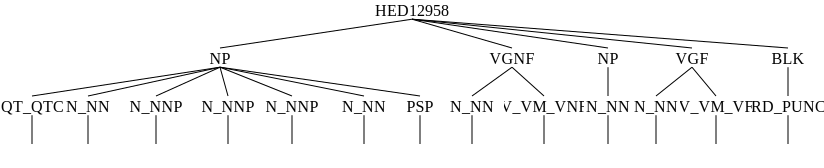

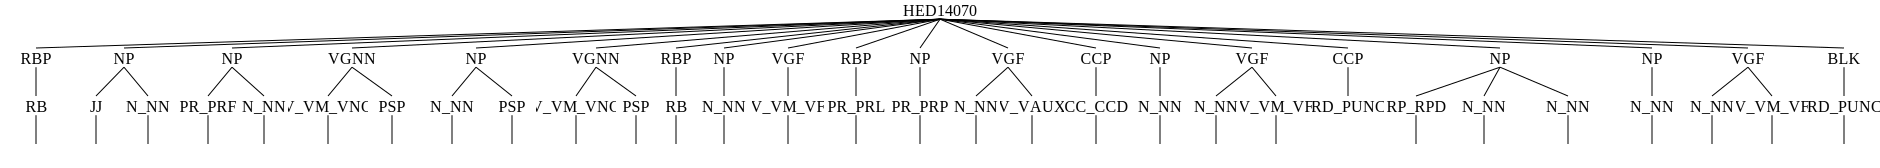

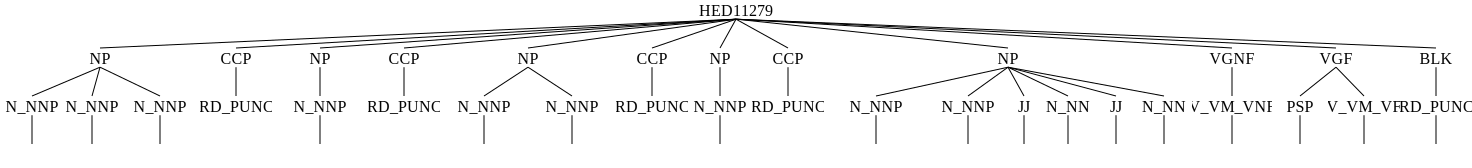

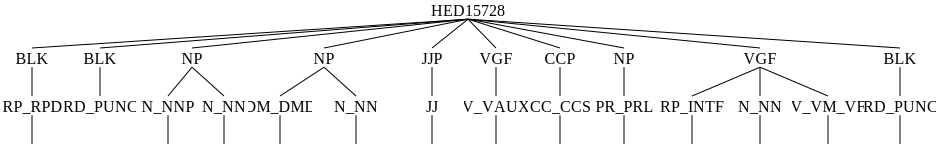

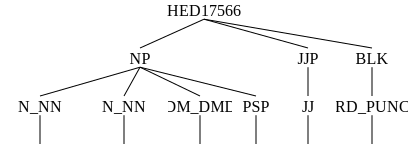

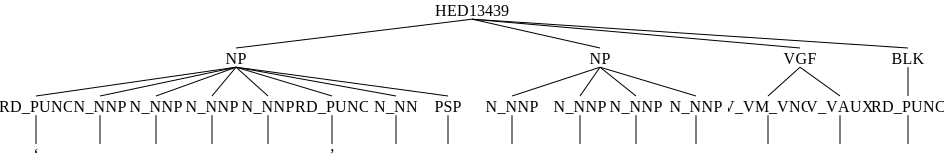

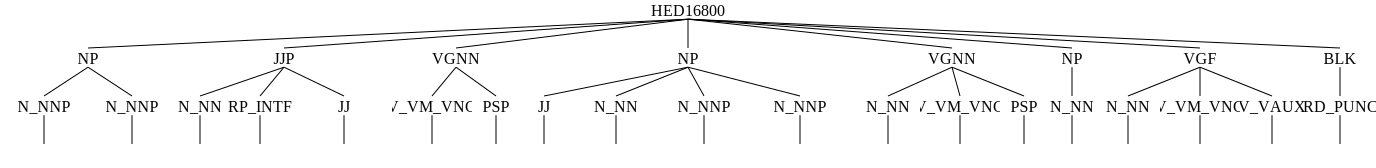

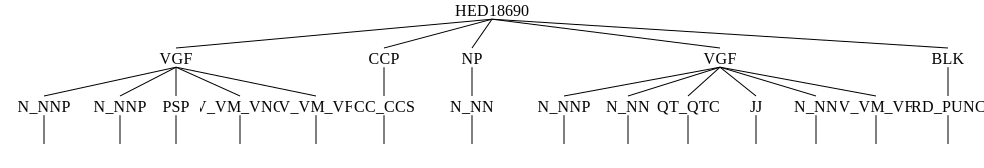

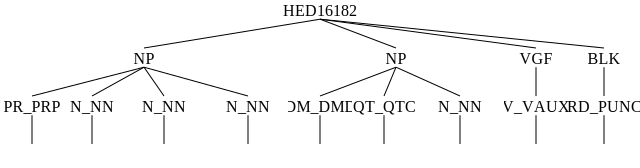

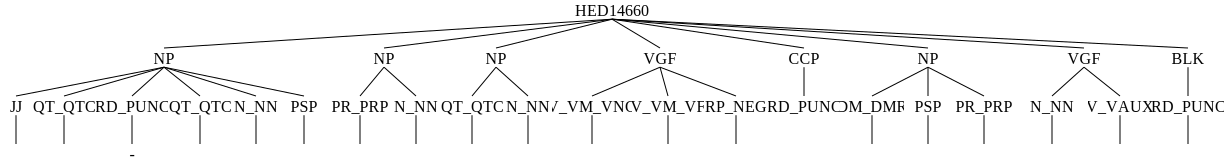

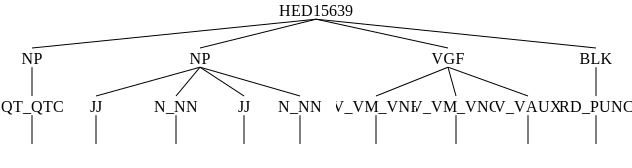

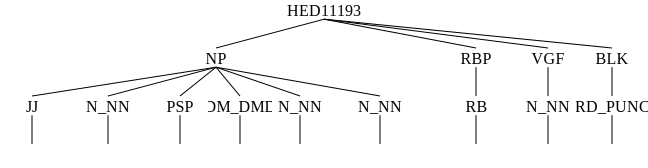

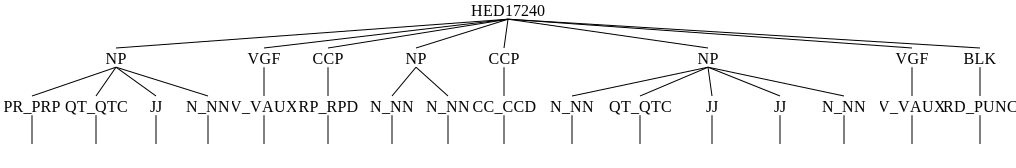

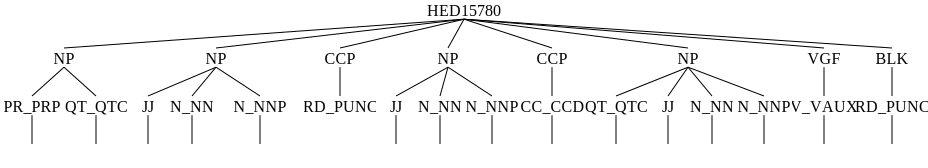

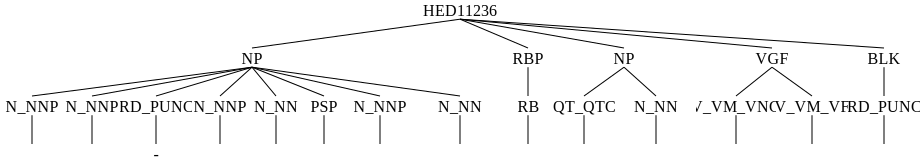

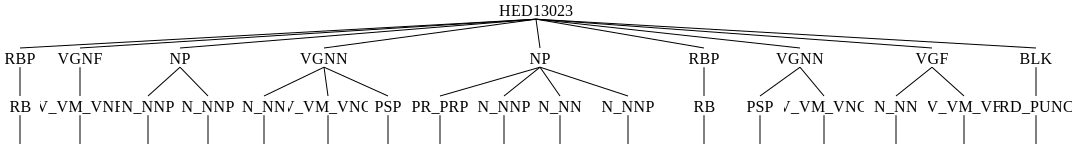

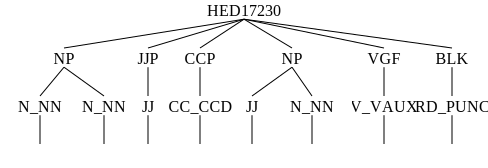

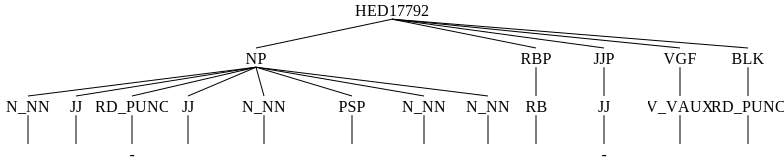

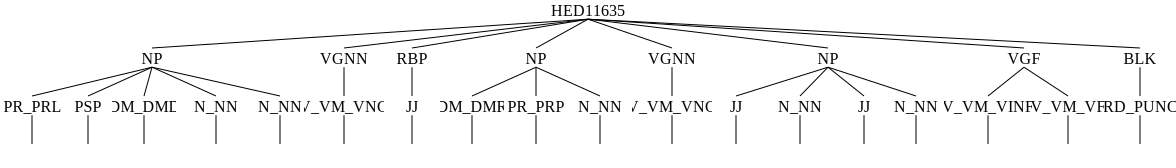

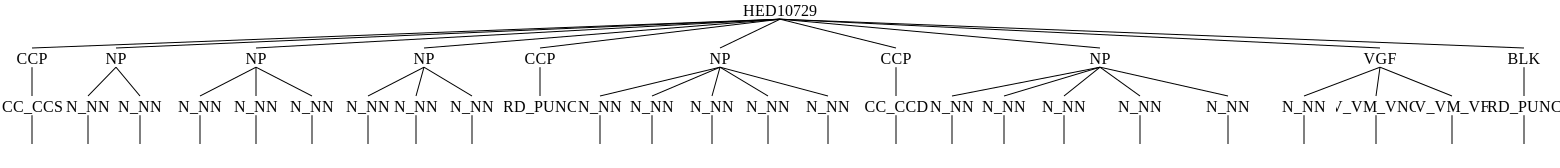

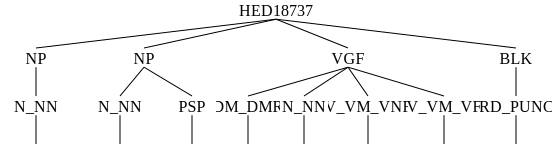

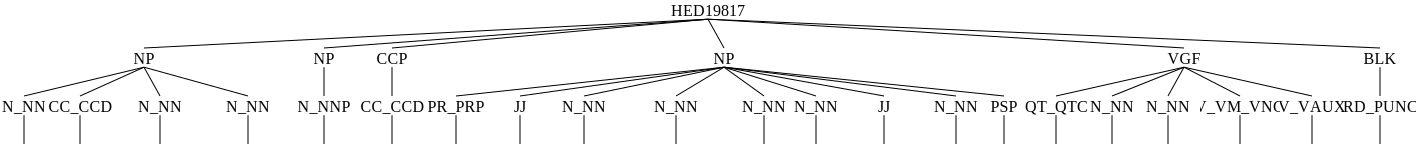

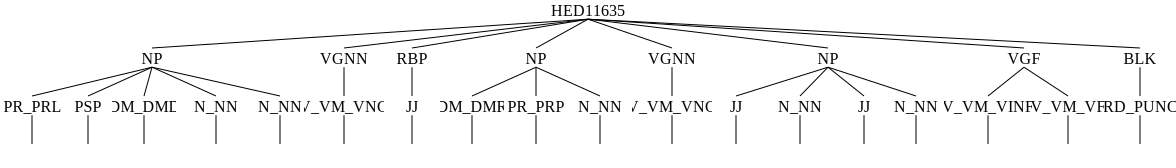

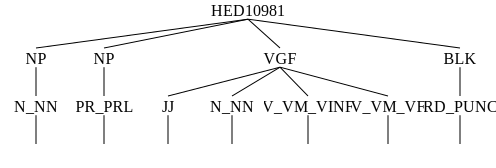

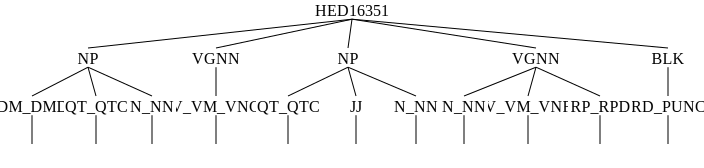

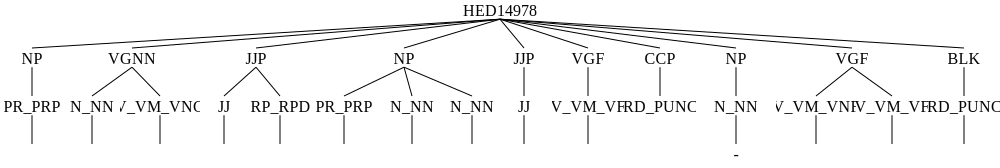

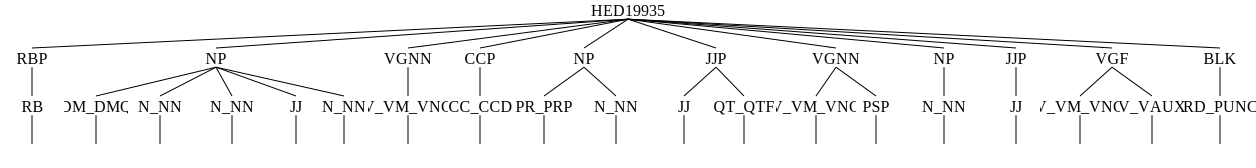

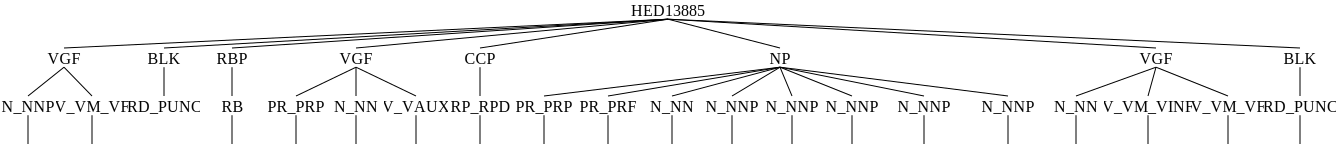

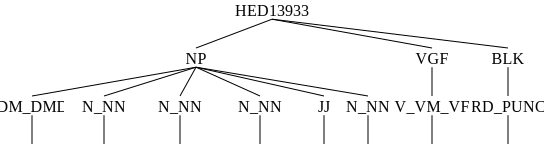

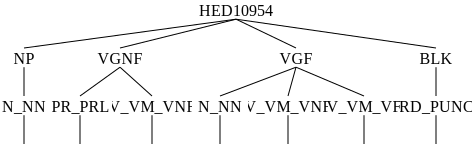

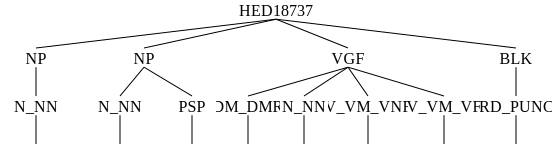

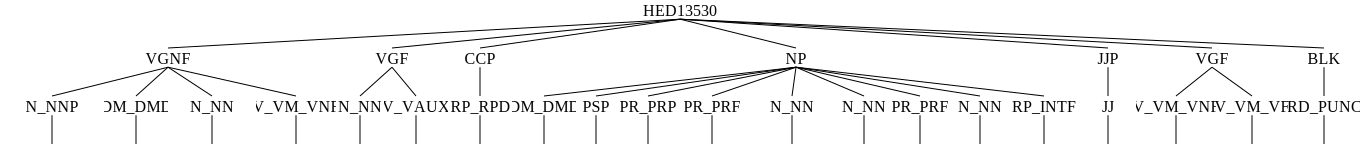

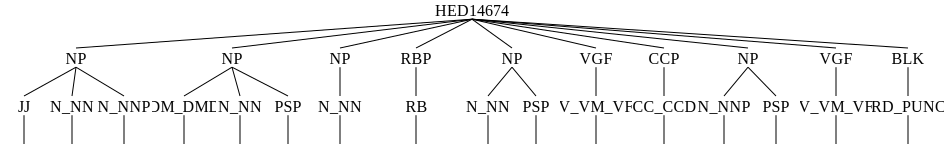

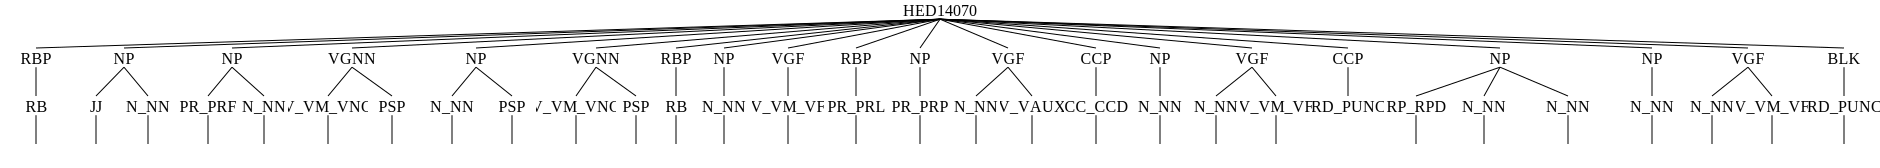

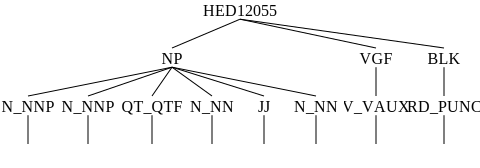

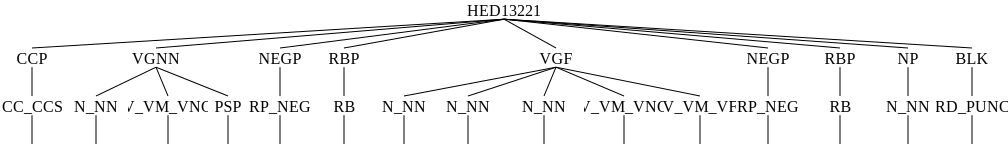

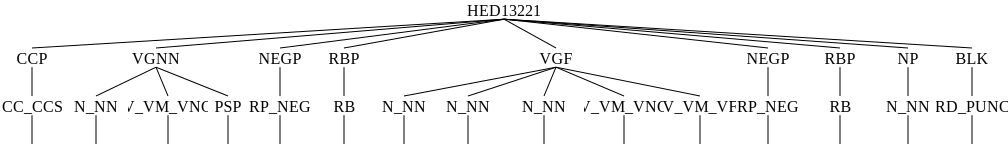

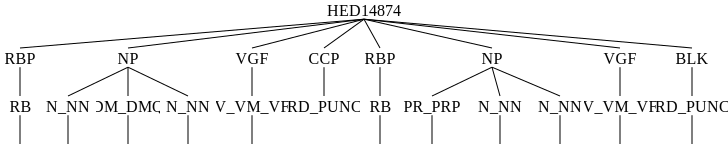

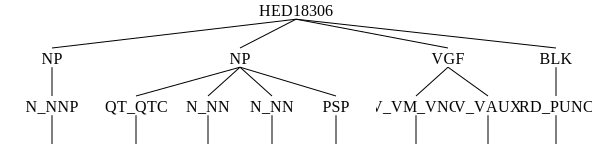

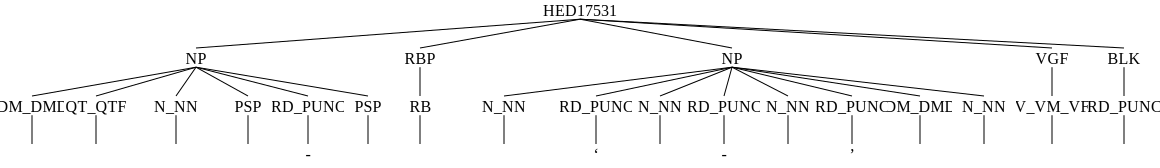

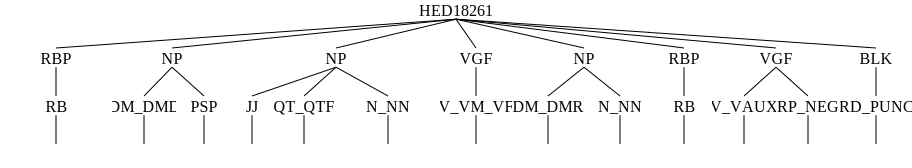

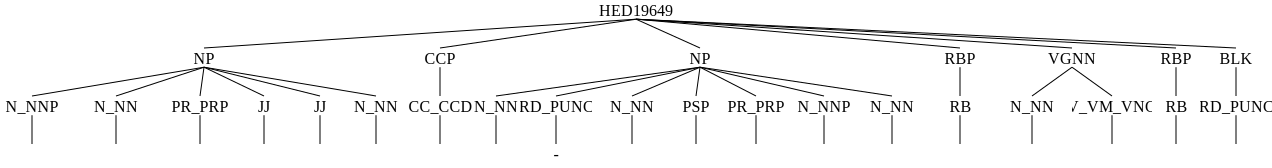

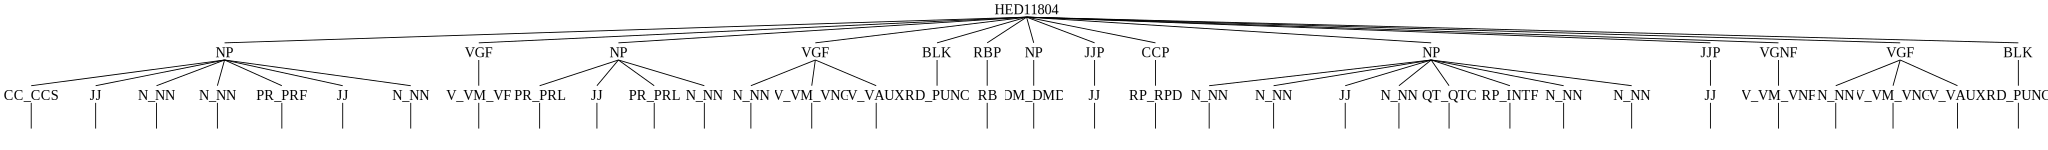

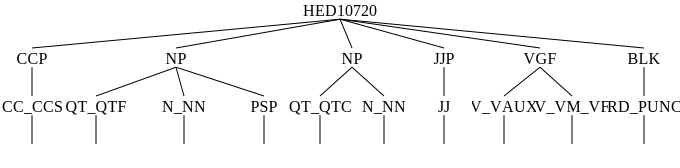

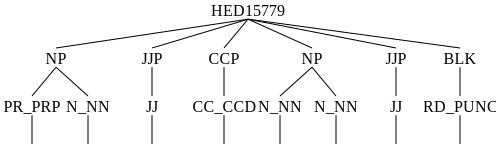

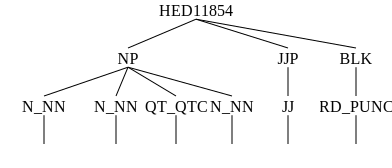

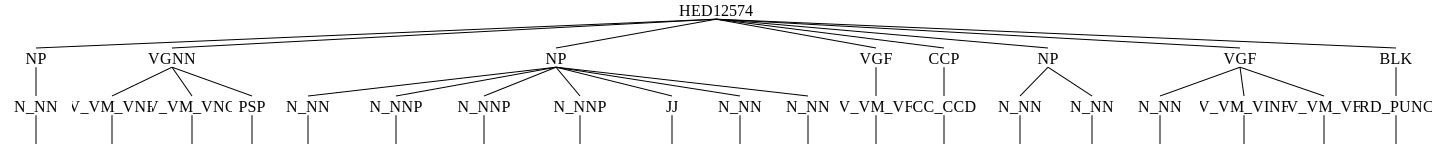

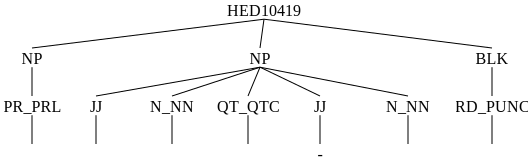

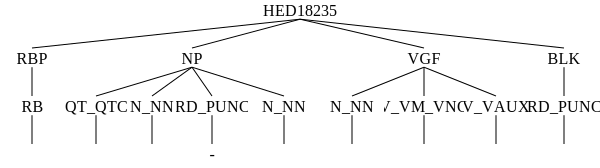

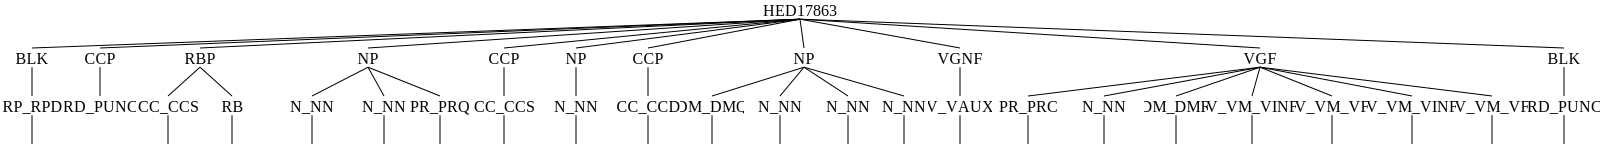

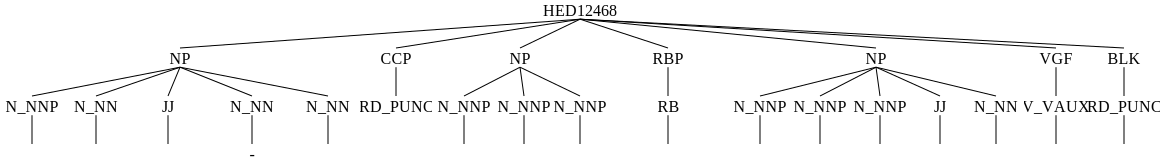

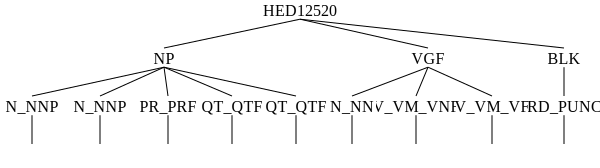

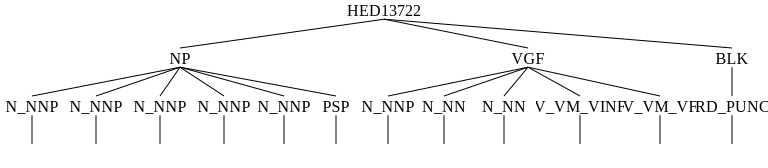

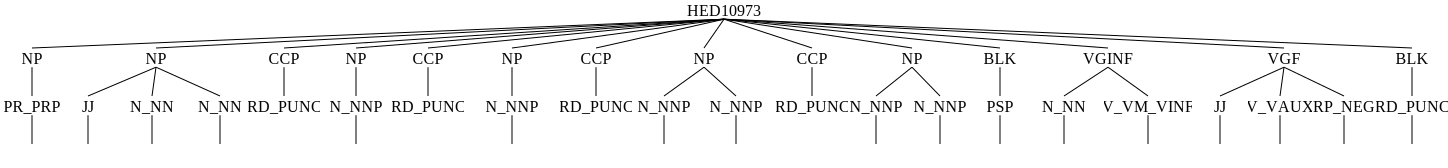

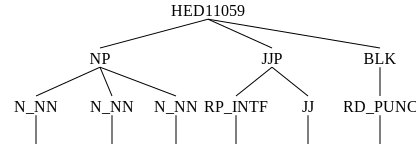

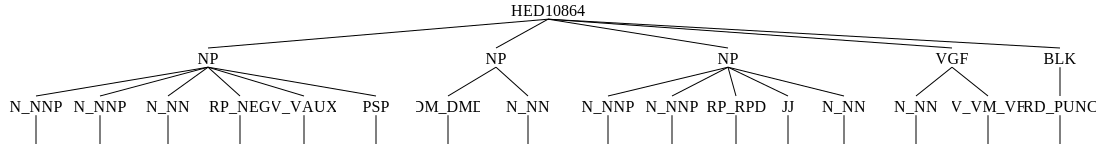

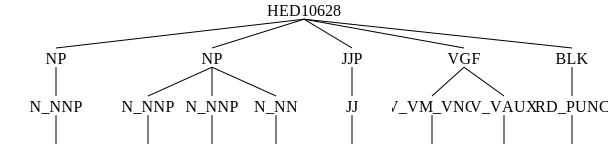

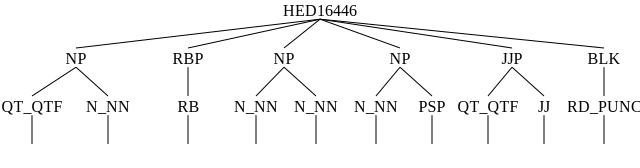

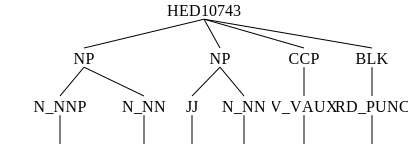

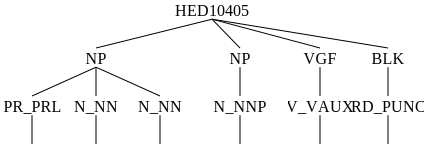

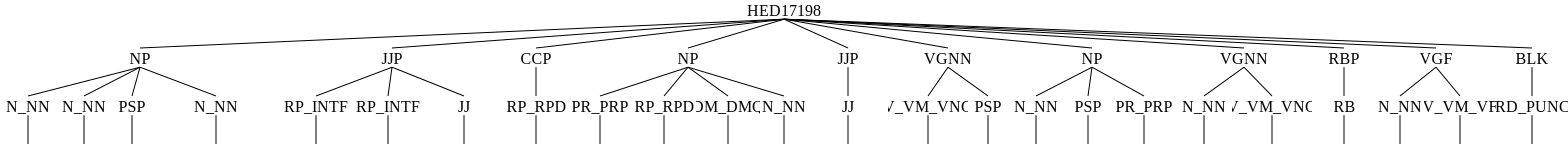

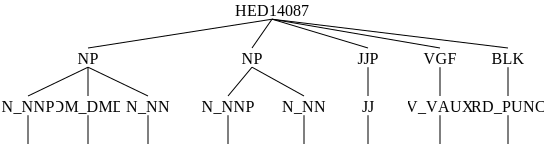

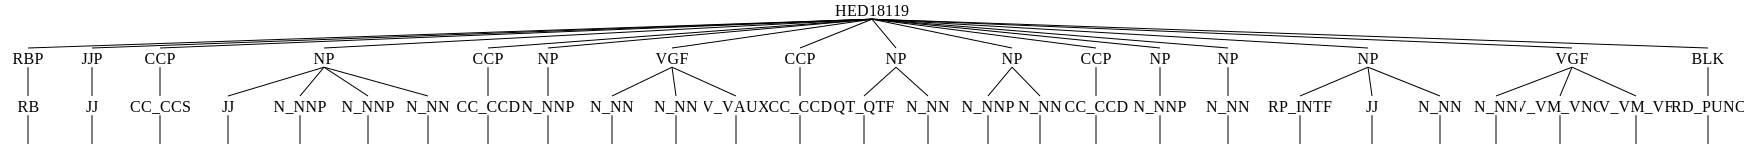

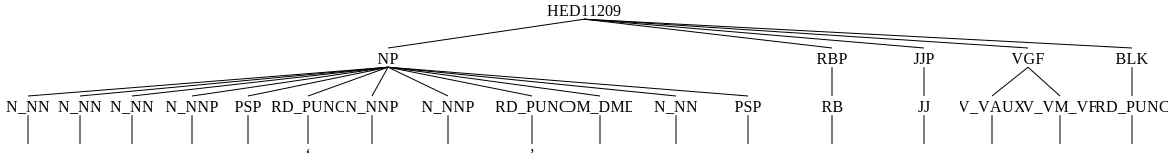

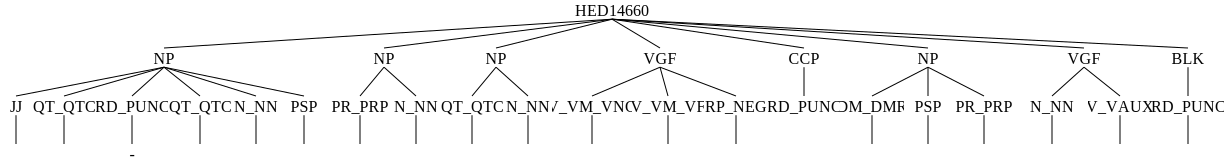

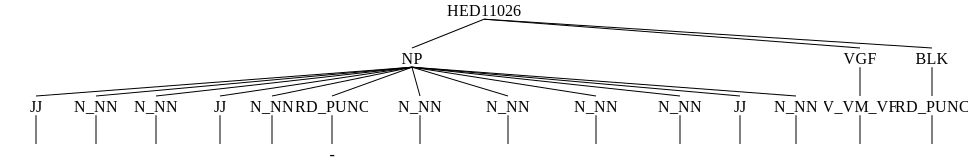

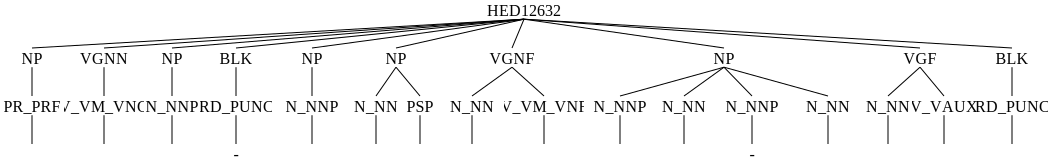

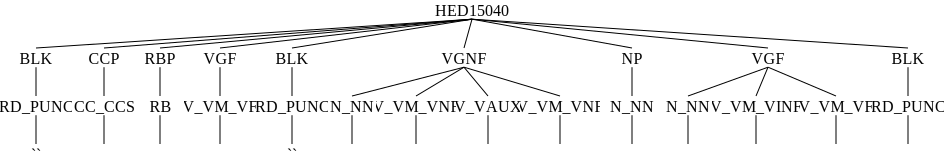

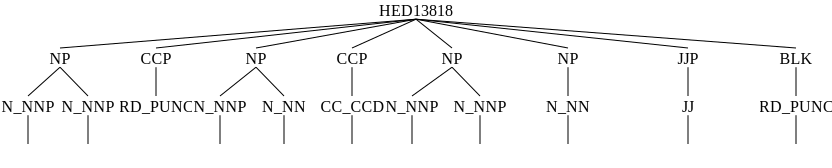

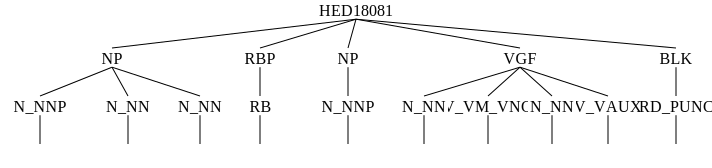

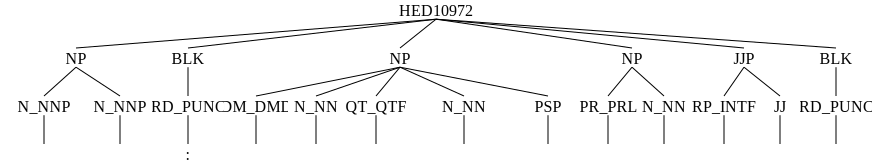

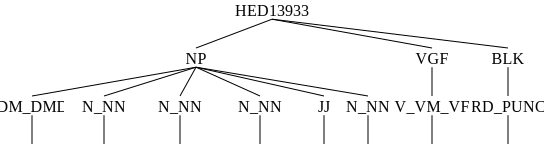

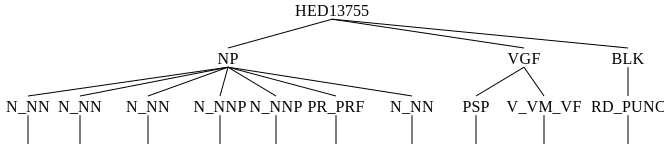

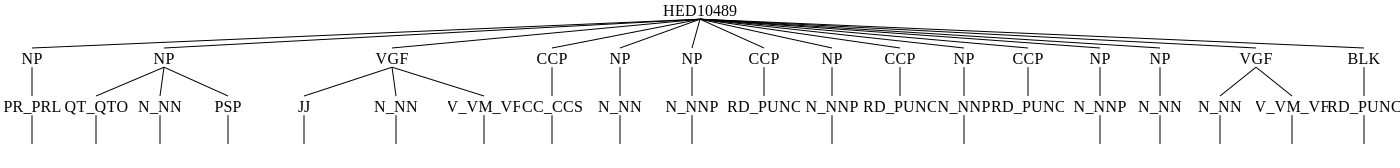

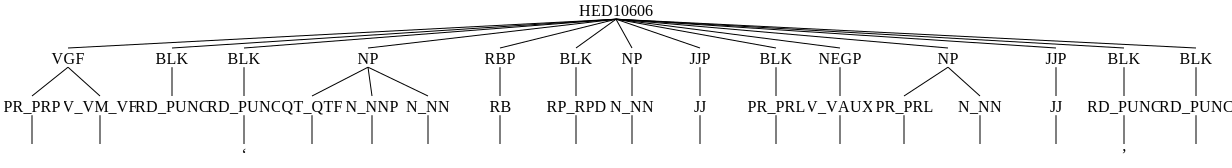

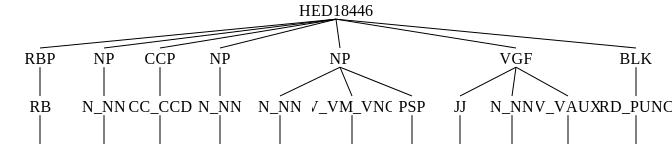

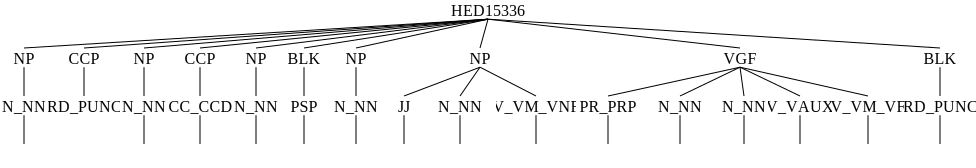

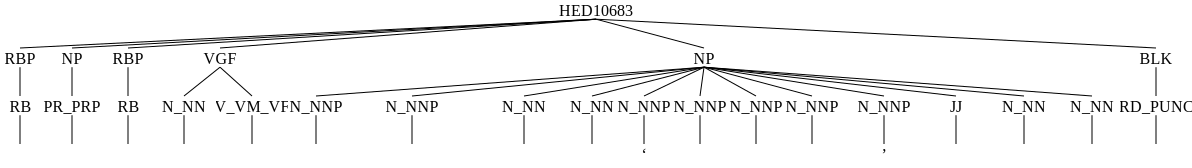

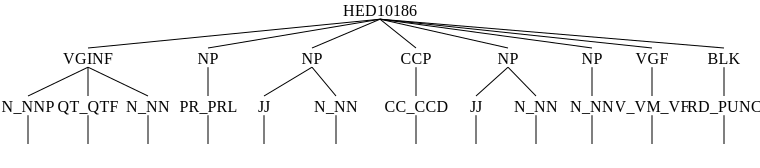

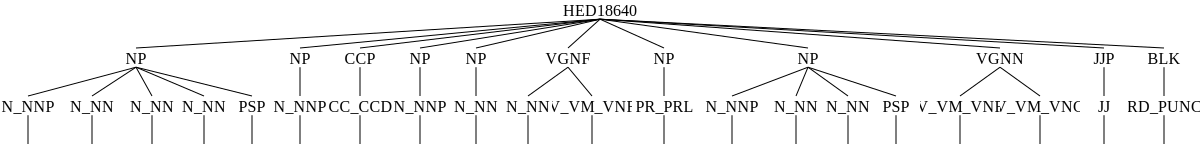

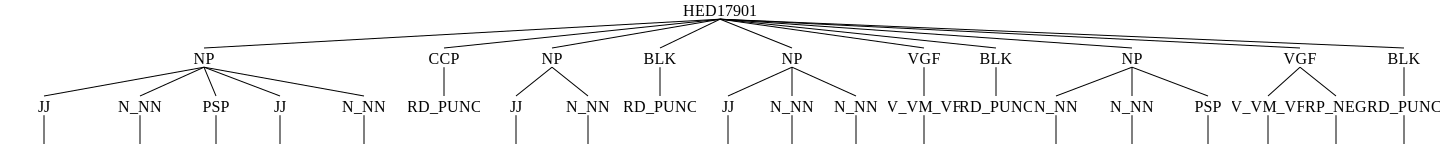

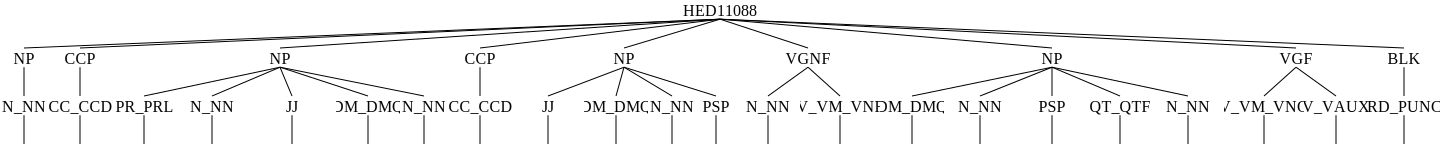

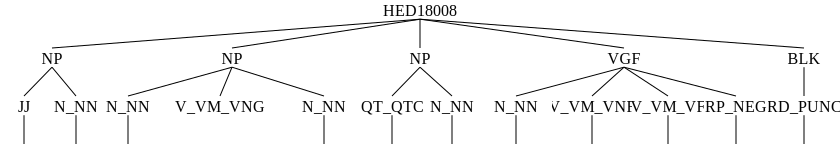

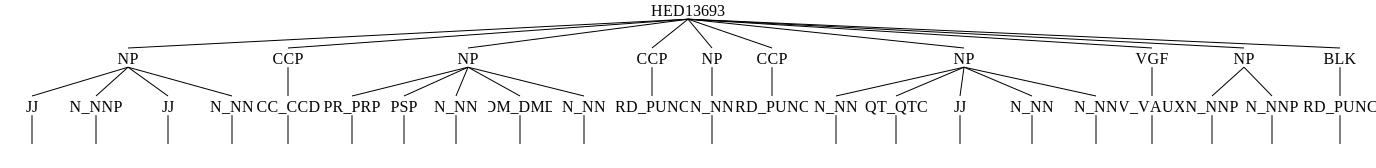

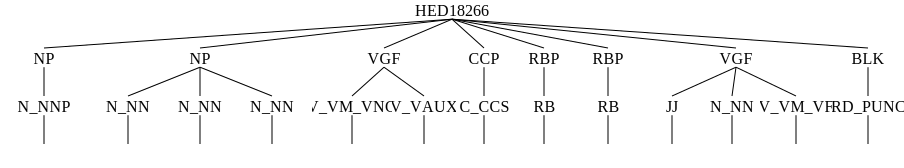

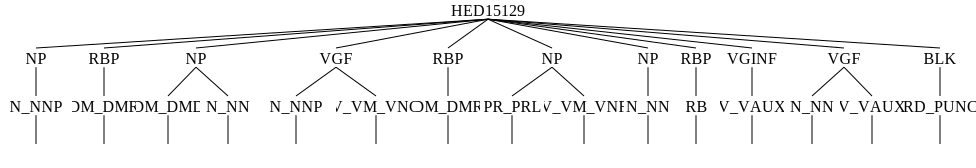

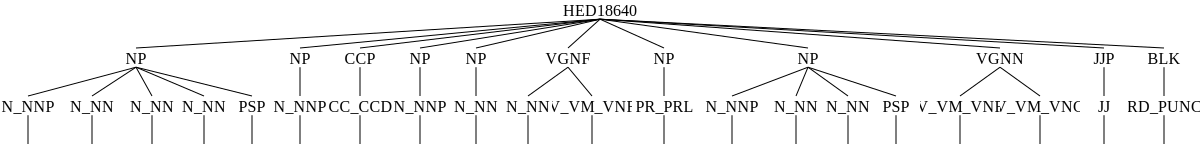

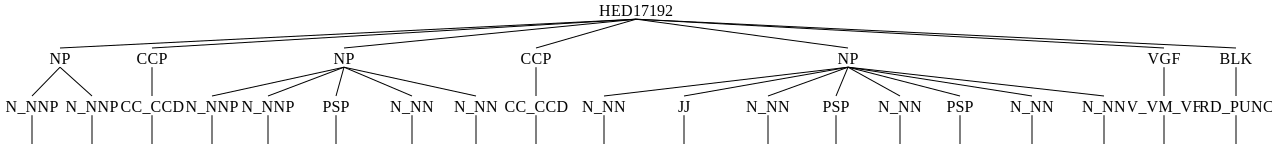

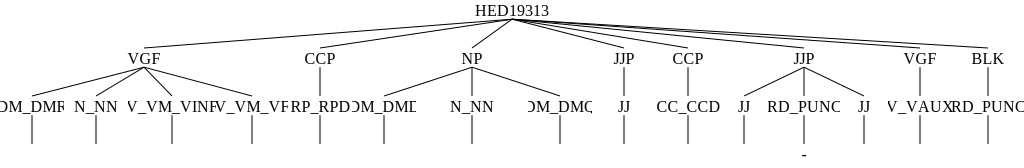

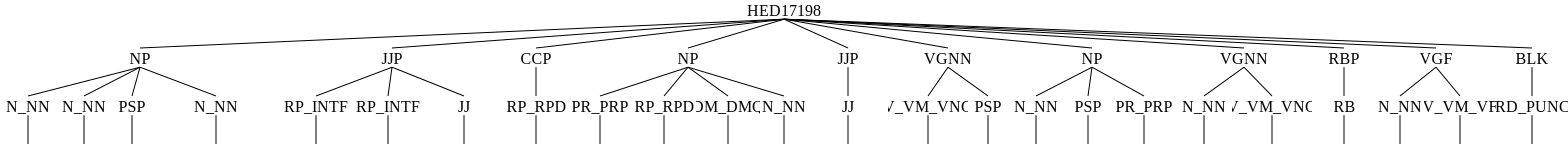

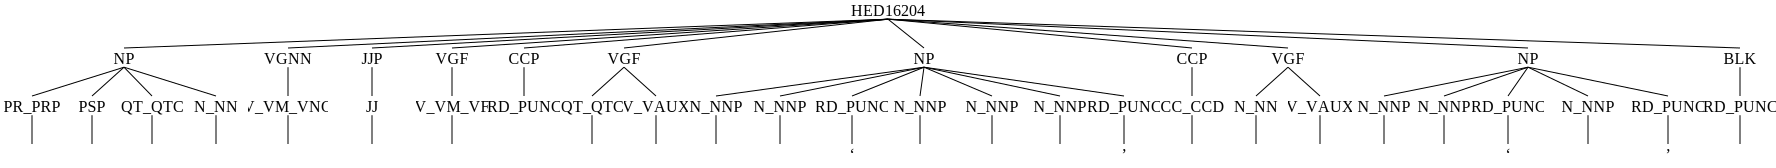

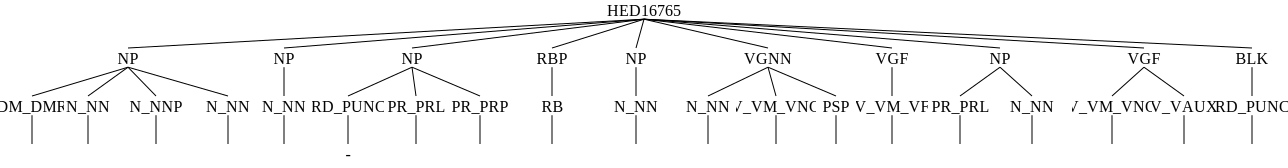

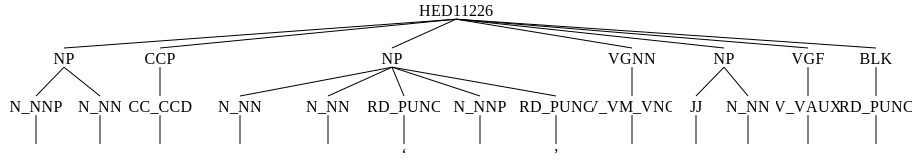

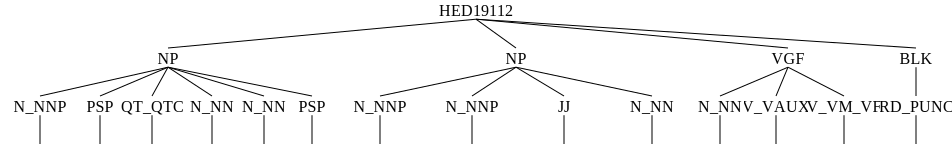

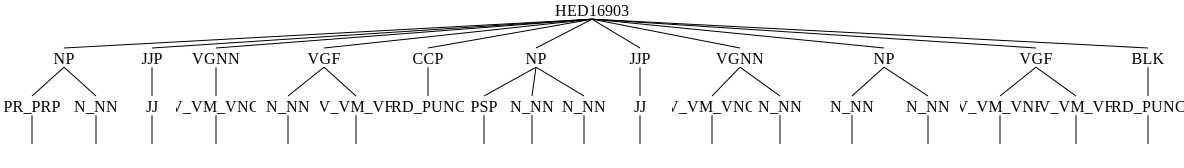

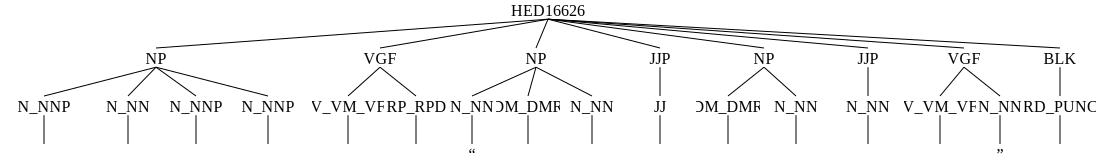

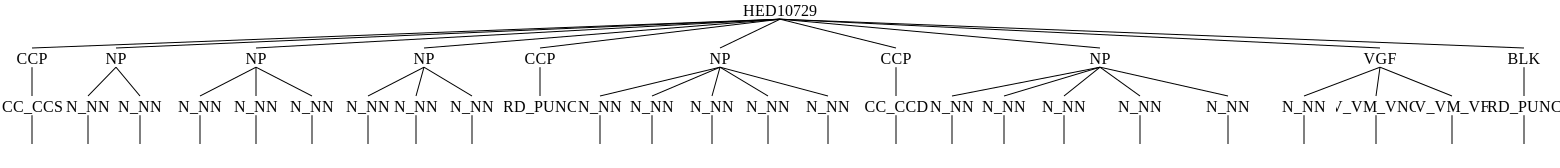

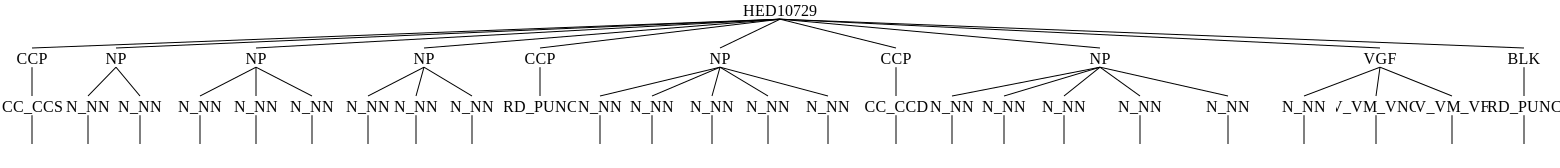

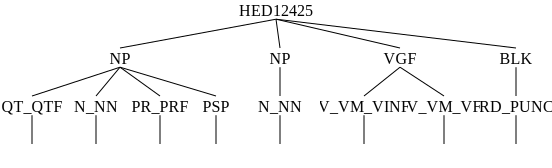

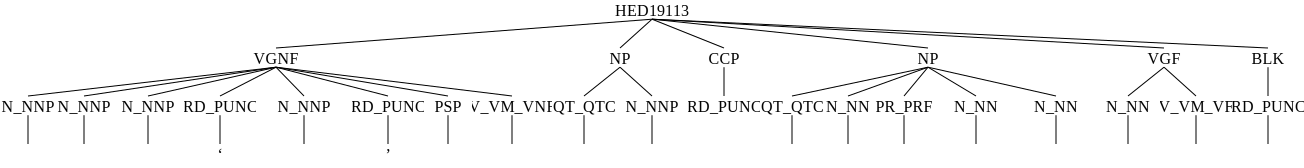

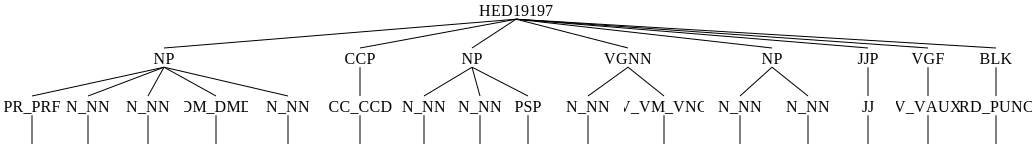

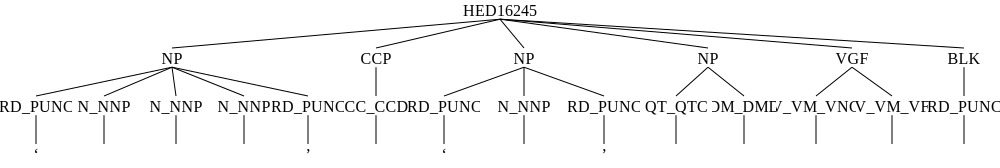

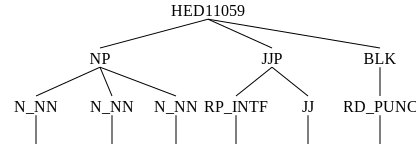

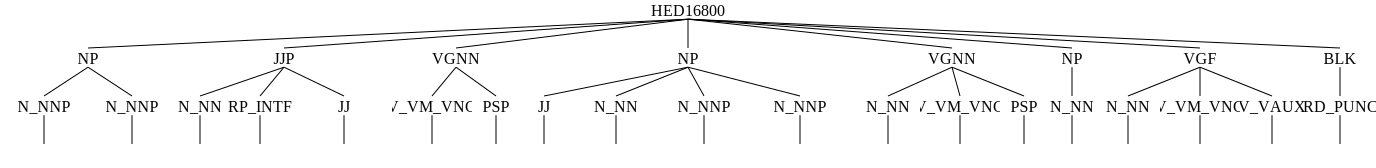

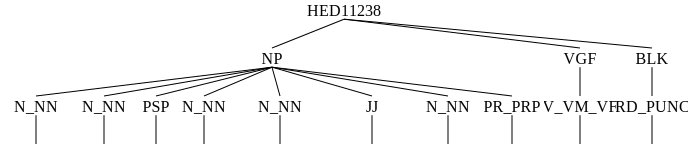

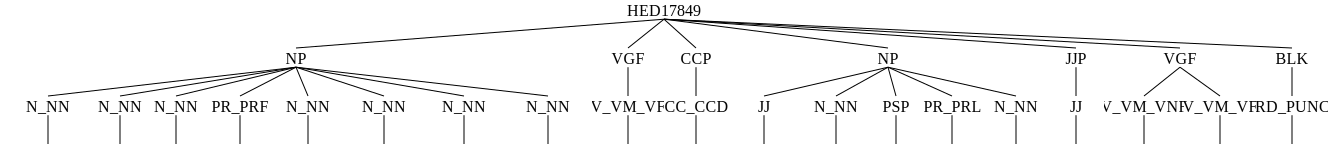

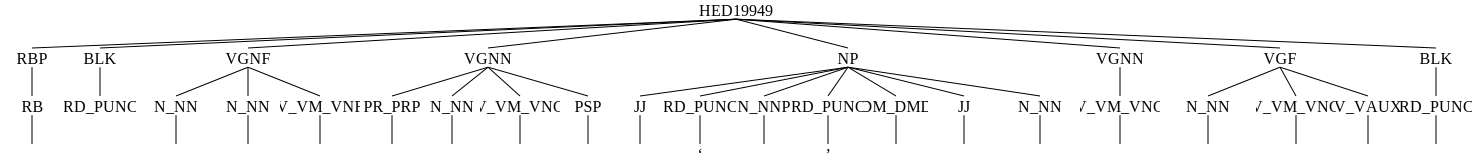

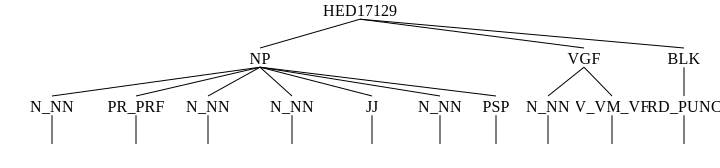

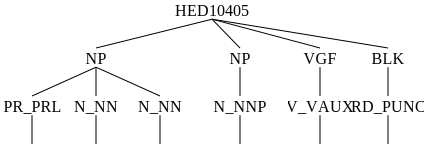

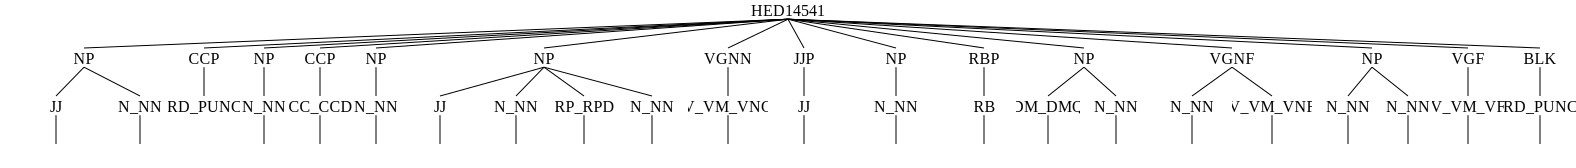

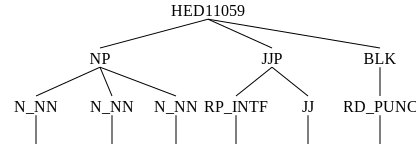

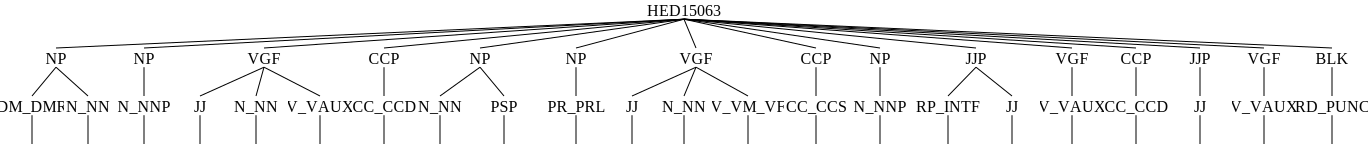

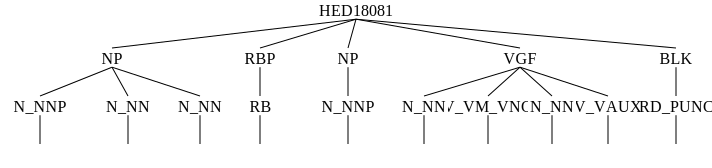

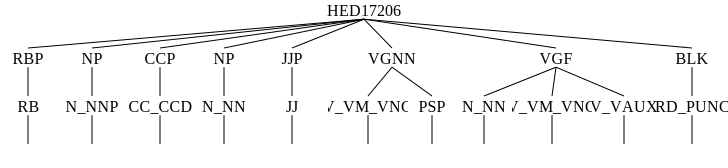

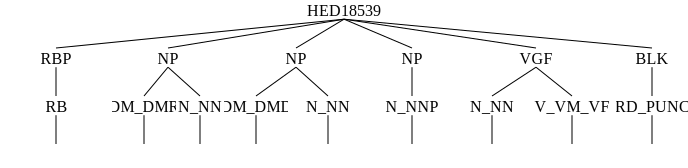

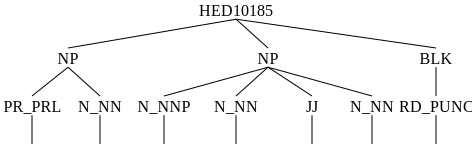

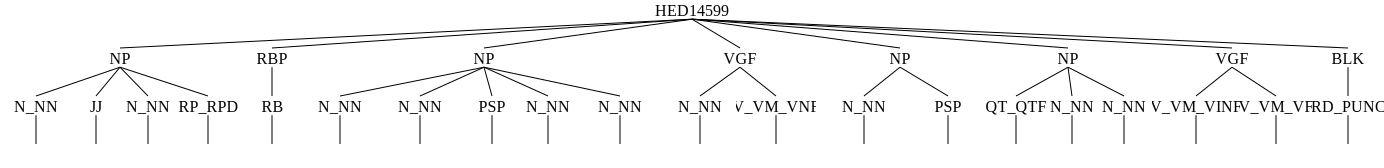

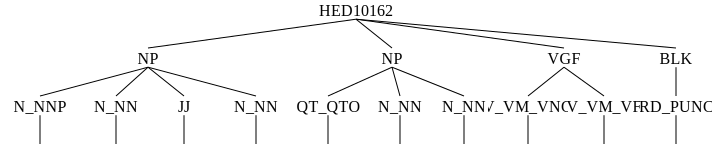

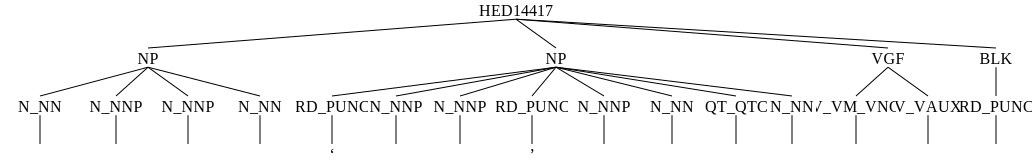

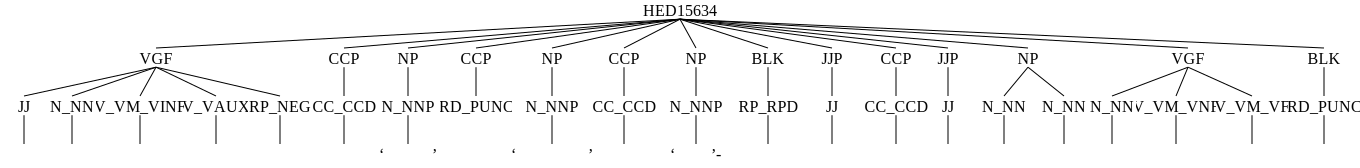

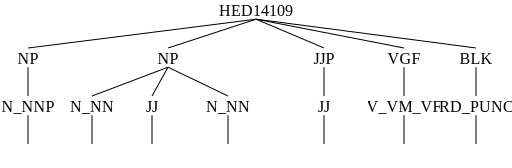

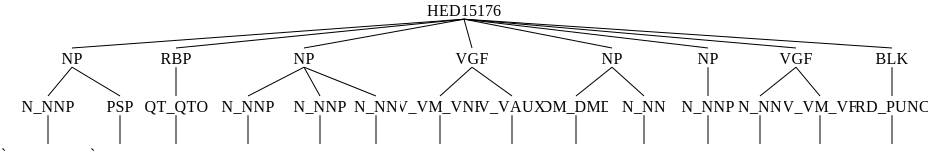

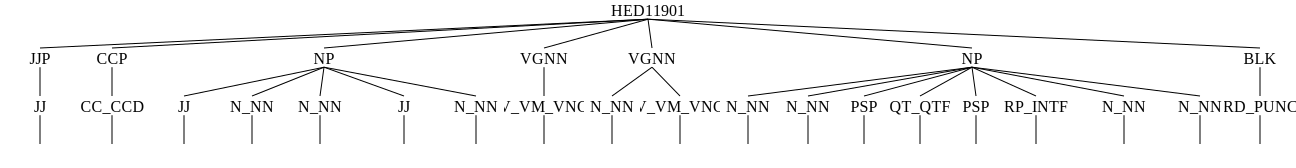

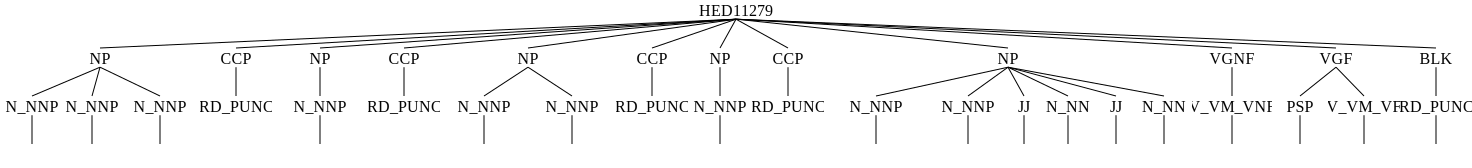

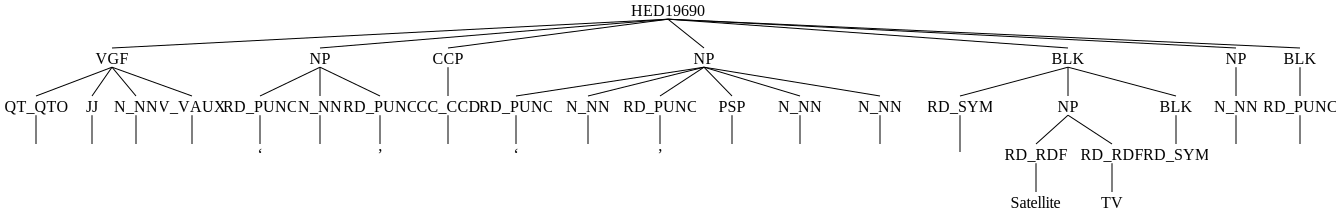

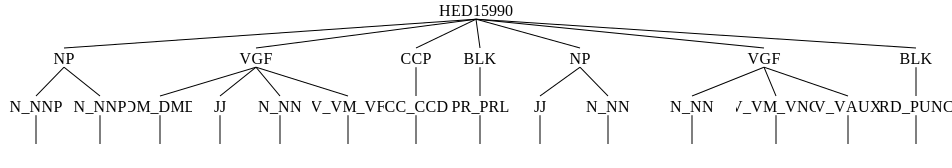

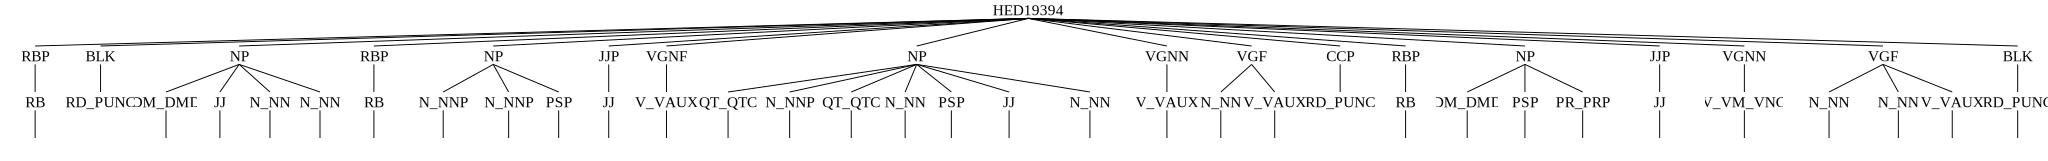

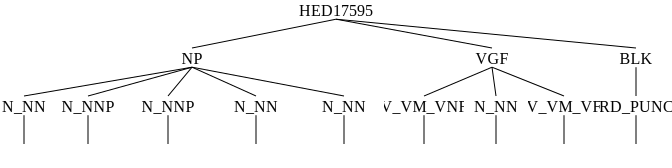

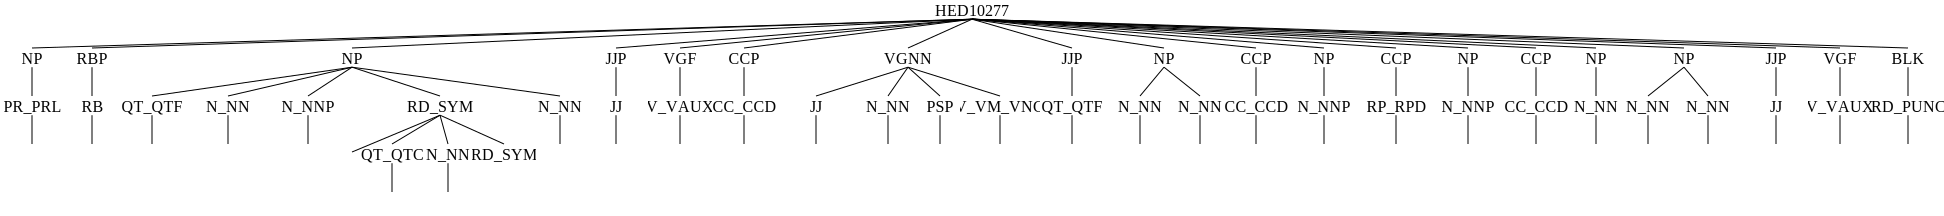

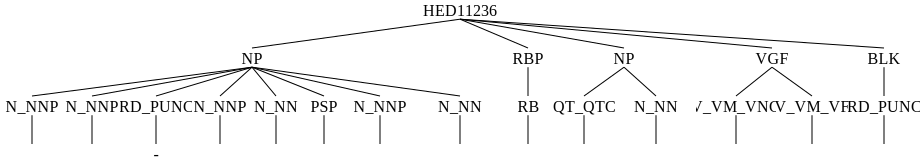

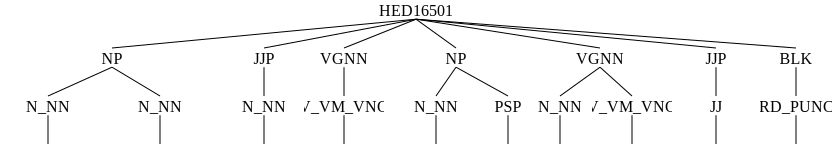

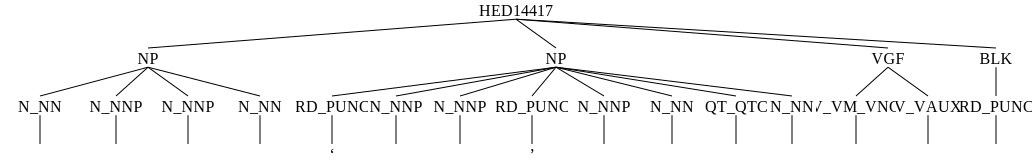

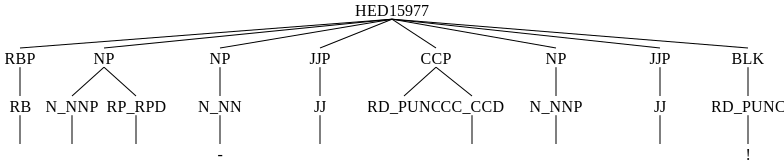

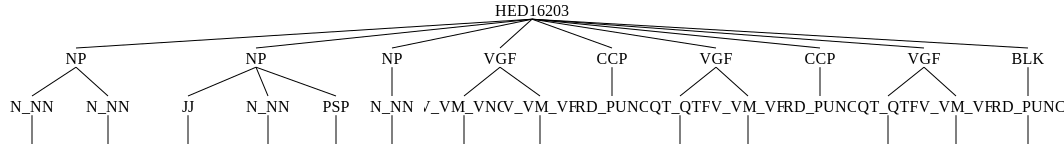

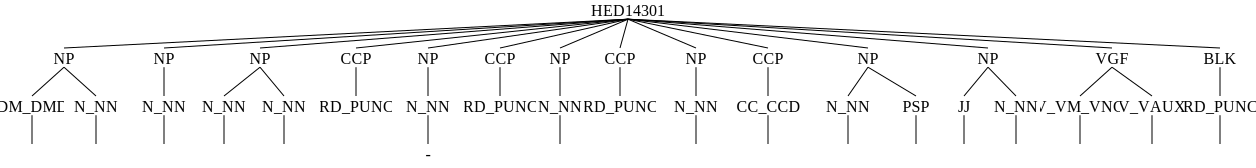

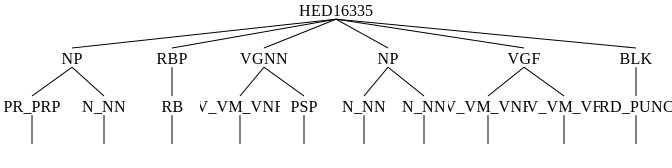

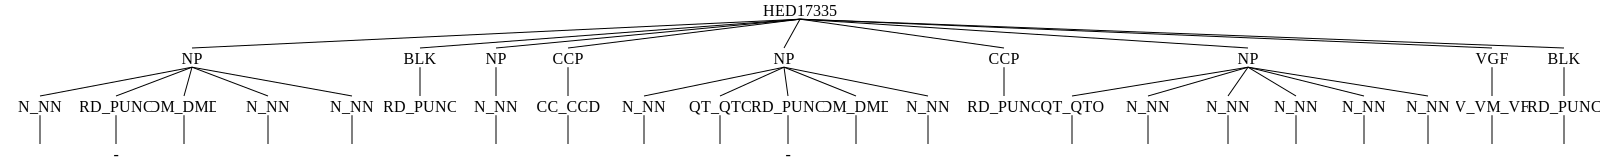

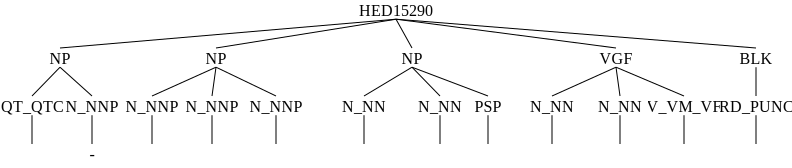

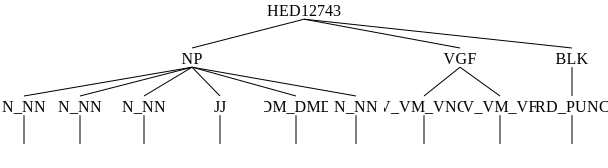

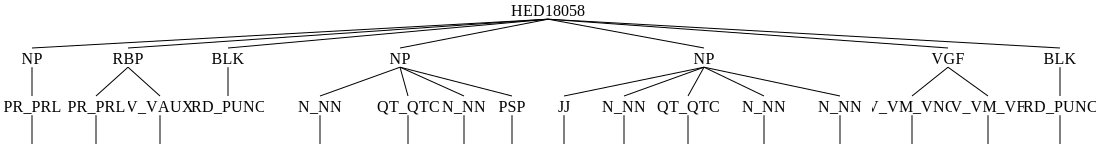

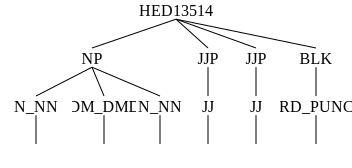

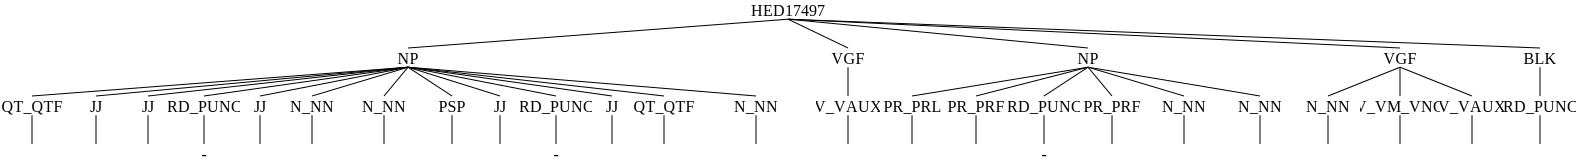

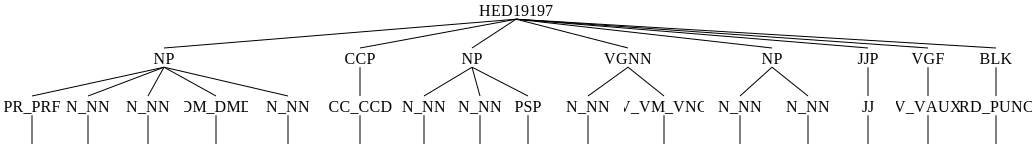

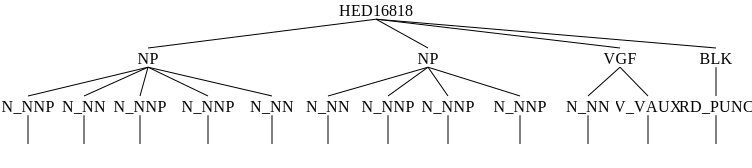

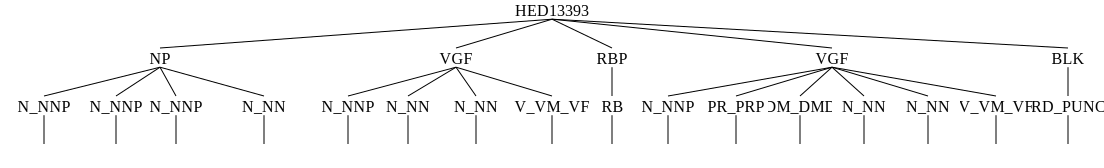

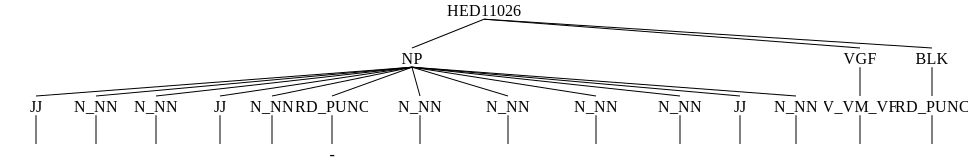

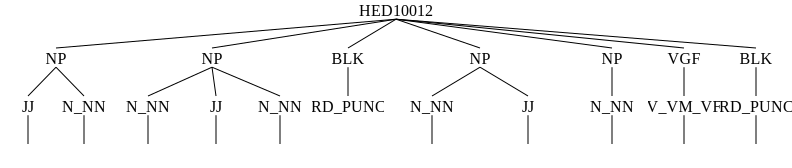

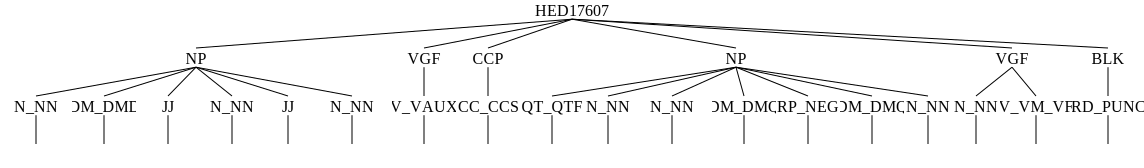

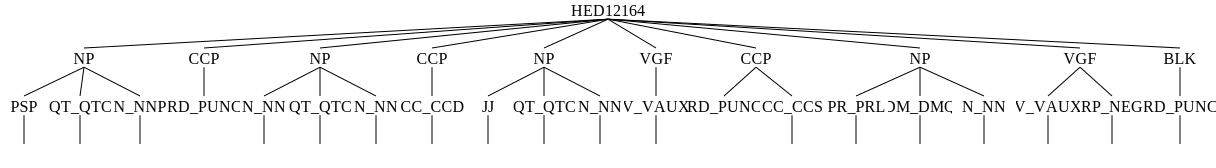

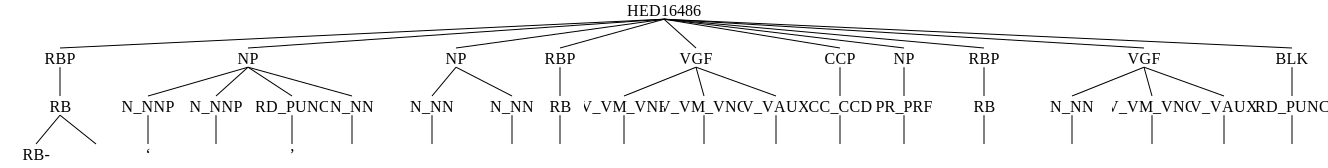

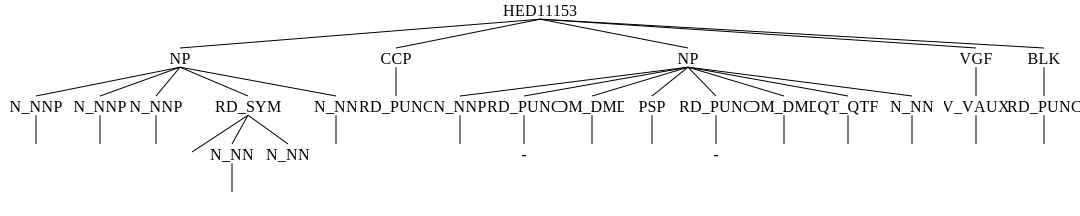

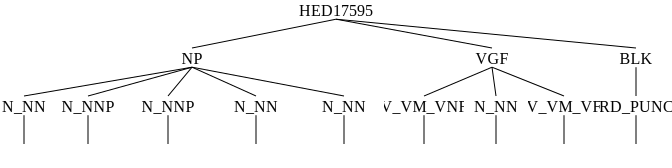

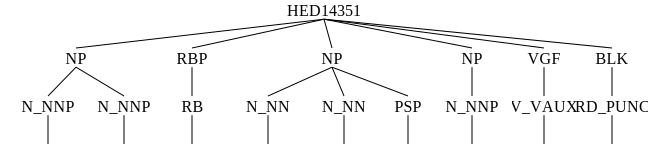

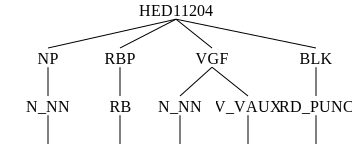

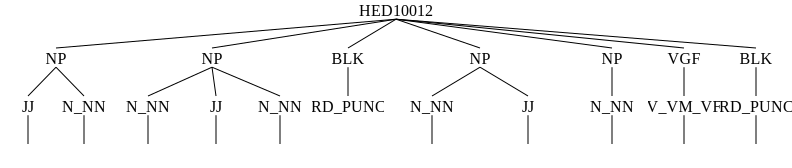

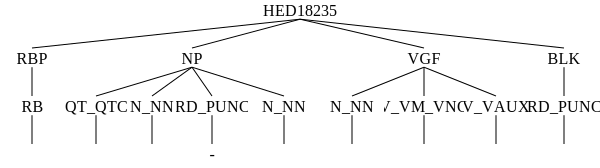

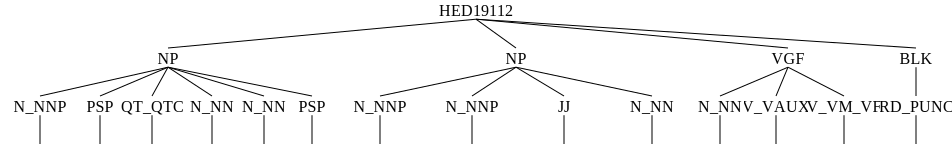

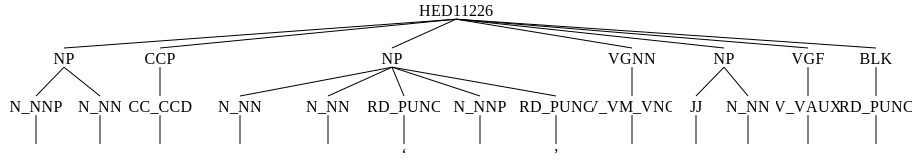

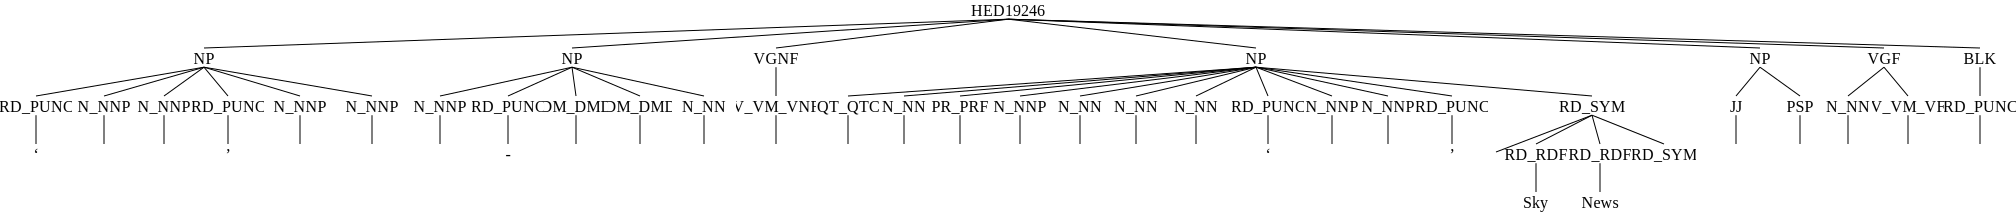

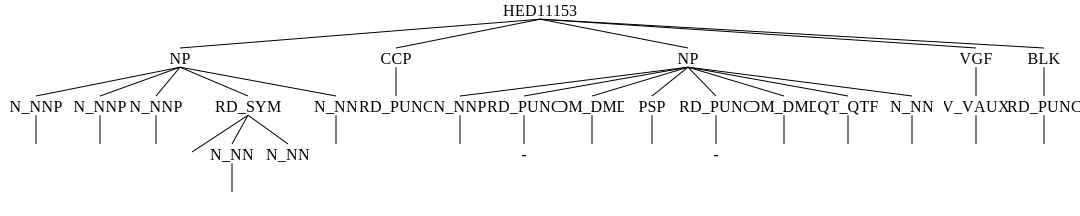

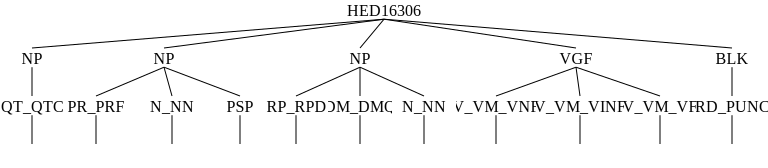

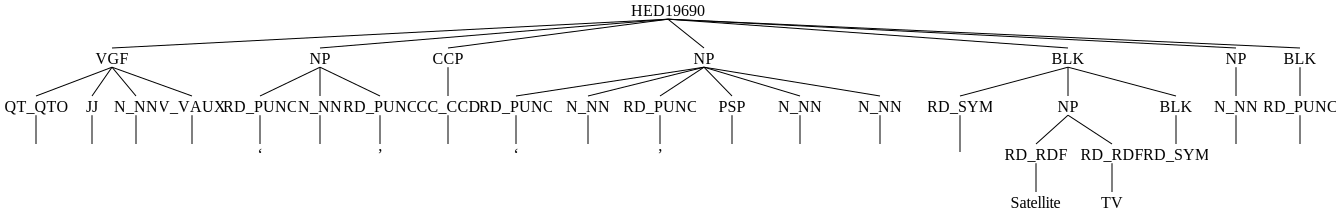

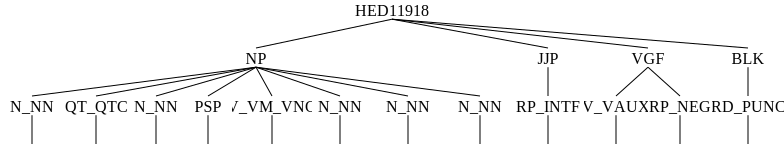

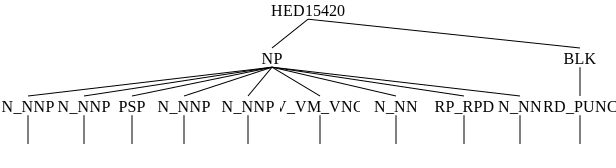

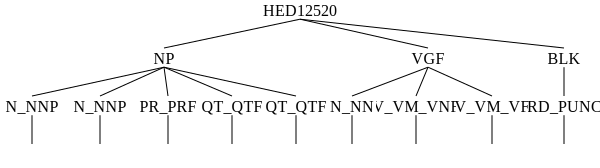

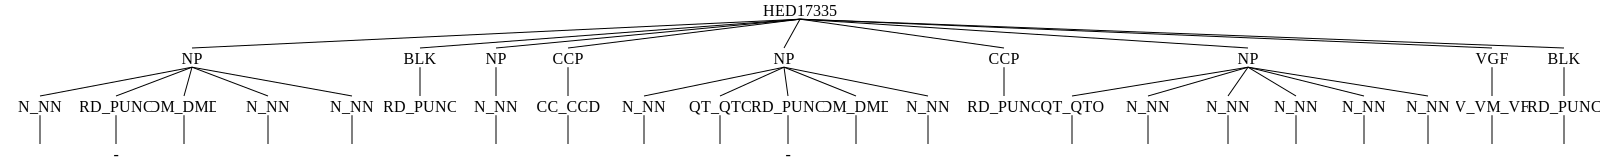

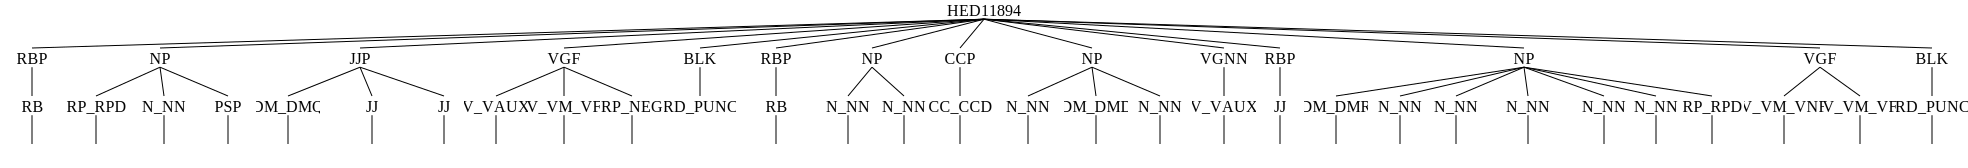

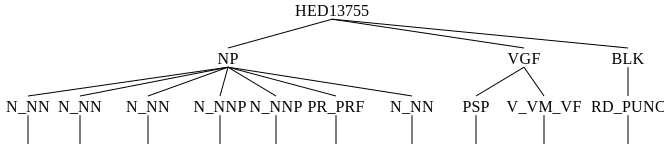

In [ ]:
Bangla_entertainment_chunk_file_converted = open(r"/content/drive/MyDrive/Bangla NLP/Dataset/HIN-BEN_Chunk_Sample/HIN-BEN_Chunk_Sample_Converted/Bangla entertainment chunk file converted.txt", encoding="utf8")
Bangla_entertainment_chunk_list_of_lines_converted = Bangla_entertainment_chunk_file_converted.readlines()

for line in Bangla_entertainment_chunk_list_of_lines_converted:
  svgling.disable_nltk_png()
  display(nltk.Tree.fromstring(line))